<a href="https://colab.research.google.com/github/Pramathesh1/Capstone4-CustomerSegmentation-Unsupervised/blob/main/Customer_Segmentation_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual

# **Project Summary -**

The unsupervised learning project of customer segmentation was done on transactional data of UK based Online Retail Store that involved various stages, including preliminary data exploration, data wrangling, exploratory data analysis, data visualization, RFM (Recency, Frequency, Monetary) analysis, data preprocessing, hypothesis testing, and the implementation of k-means and hierarchical clustering machine learning models. The project aimed to uncover meaningful patterns in customer data and segment customers based on their behaviors and characteristics.

The project began with a thorough exploration of the customer dataset. This involved examining the data structure, identifying missing values, and ensuring data integrity. Data wrangling techniques were employed to handle missing values, outliers, and inconsistencies. Removal of cancelled transactions was also performed. By cleaning and preparing the data, the foundation for subsequent analysis was established.

To gain insights into customer behavior, exploratory data analysis techniques were employed Furthermore, data visualization techniques, such as histograms, scatter plots, and box plots, were utilized to identify patterns and outliers within the data. Visualization was performed on numeric variables, products, time of transactions and customerIDs. 

RFM analysis, a valuable customer segmentation technique, was applied as part of feature engineering to assess customer value based on their Recency, Frequency, and Monetary metrics. By analyzing customers' recent purchases, their frequency of transactions, and the monetary value of their purchases, distinct customer segments were identified. This allowed for targeted marketing strategies tailored to each segment's specific characteristics and needs. This RFM data was selected as the data to which our model would fit.

Data preprocessing steps were carried out to prepare the RFM dataset for clustering algorithms. This involved scaling numerical features and handling any remaining outliers. Standard scaling was applied to ensure that all features were on a similar scale, avoiding bias in the clustering process.

Hypothesis testing was conducted to validate the significance of the identified customer segments. It was done to test difference in money spent by customers in UK and rest of countries, to test difference in daily sales in holiday and non-holiday period and to test the difference between 2 categories of customer with one purchase and more than on epurchase. Statistical tests of z-test was employed to determine if the differences between segments were statistically significant. This helped establish the reliability and validity of the EDA results.

Two popular clustering algorithms, k-means and hierarchical clustering, were implemented to perform customer segmentation. K-means clustering grouped customers into distinct clusters based on similarity, aiming to minimize the within-cluster sum of squares. Hierarchical clustering, on the other hand, created a hierarchical structure of clusters using distance-based linkage methods. Both models allowed for the identification of distinct customer segments based on their behaviors and characteristics. Silhoutte score was used as evaluation metric and hyperparameters were tuned for both the models. Finally we select the hierarchical clustering with average linkage and no. of clusters 3 as our final model.

In conclusion, this customer segmentation project encompassed various stages, including preliminary data exploration, data wrangling, exploratory data analysis, data visualization, RFM analysis, data preprocessing, hypothesis testing, and the implementation of k-means and hierarchical clustering models. Through these steps, meaningful customer segments were identified, enabling targeted marketing strategies and personalized customer engagement. The project demonstrated the importance of data exploration, preprocessing, and appropriate machine learning techniques in uncovering valuable insights and driving informed business decisions.




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

The business problem for customer segmentation in retail is to identify groups of customers who exhibit similar behaviors, characteristics, and needs. The goal is to create more targeted marketing strategies and to improve customer retention. In this project, our task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. Online retail customer segmentation can help online retailers improve their marketing strategies, optimize their product offerings, and enhance customer satisfaction and loyalty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.6 MB/s eta 0:00:00


In [ ]:
# importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import time
import re
import plotly.express as px
from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import silhouette_score
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor
# from sklearn.inspection import permutation_importance
from scipy import stats
from statsmodels.stats.weightstats import ztest
import shap
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data into pandas dataframe
file_location = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Unsupervised Capstone Project/Copy of Online Retail.xlsx'
df = pd.read_excel(file_location)

### Dataset First View

In [ ]:
# printing the dataset
pd.set_option('display.max_columns', None)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

### Dataset Rows & Columns count

In [ ]:
# dataset dimensions
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# getting info on datatypes of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# getting total no. duplicate rows
df.duplicated().sum()

5268

In [ ]:
# getting duplicated rows
df[df.duplicated(keep=False)==True]

InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
485    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
489    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
494    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
521    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[10147 rows x 8 columns]

#### Checking Null values

In [ ]:
# checking null values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# rows with null values in any colummn
df[df.isnull().any(axis=1)]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

### What did you know about your dataset?

The dataset contains the transactional information for online retail firm. It contains the columns InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country. These variables collectively provide important information about customer transactions, including what was purchased, when it was purchased, the quantity, price, and customer details. Analyzing these variables can help identify trends, customer segments, and inform targeted marketing strategies.

The dataset has 8 columns and 541909 rows. Each row depicts a transaction detail for a particular item/stock. There are 5268 number of duplicated rows and 136534 number of null values where 1454 null values in Description column and 135080 number of null values in CustomerID column. However, number of rows with null values is not 136534 but it's 135080 meaning rows with customerID as null also contains description as null. We'll deal with duplicate and null values in data wrangling section. 

## ***2. Understanding Your Variables***

In [ ]:
# getting statistical info on the columns
df.describe(include = 'all')

InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
first         NaN       NaN                                 NaN   
last          NaN       NaN                                 NaN   
mean          NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   

             Quantity          InvoiceDate      UnitPrice     CustomerID  \
count   541909.000000               541909  541909.000000  406829.000000   
unique            NaN                23260            NaN            NaN   
top               NaN  2011-10-31 14:41:00            NaN            NaN   
freq              NaN                 1114            NaN            NaN   
first             NaN  2010-12-01 08:26:00            NaN            NaN   
last              NaN  2011-12-09 12:50:00            NaN            NaN   
mean         9.552250                  NaN       4.611114   15287.690570   
std        218.081158                  NaN      96.759853    1713.600303   
min     -80995.000000                  NaN  -11062.060000   12346.000000   
25%          1.000000                  NaN       1.250000   13953.000000   
50%          3.000000                  NaN       2.080000   15152.000000   
75%         10.000000                  NaN       4.130000   16791.000000   
max      80995.000000                  NaN   38970.000000   18287.000000   

               Country  
count           541909  
unique              38  
top     United Kingdom  
freq            495478  
first              NaN  
last               NaN  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

We can see the statistical information on numeric variables like mean, standard deviation, quantiles and max values for Quantity and Unit price. 

### Variables Description 

* #### InvoiceNo - The unique identifier for each invoice or transaction made by a customer. It is typically alphanumeric and can be used to track and reference specific transactions.

* #### StockCode - The unique identifier for each product in the retailer's inventory. It is typically alphanumeric and helps identify the specific item purchased.

* #### Description - A brief description or name of the product purchased. It provides additional information about the item, such as its characteristics or features.

* #### Quantity - The number of units of a specific product purchased in a transaction. It indicates the quantity of items bought by the customer.

* #### InvoiceDate - The date and time when the transaction was made or the invoice was issued. It helps track the timing of customer purchases.

* #### UnitPrice - The price of a single unit of the product. It represents the cost per item in the transaction.

* #### CustomerID - The unique identifier assigned to each customer. It allows for tracking and analyzing customer-specific behaviors and preferences.

* #### Country - The country where the customer resides or where the transaction took place. It provides information about the geographic location of customers and helps identify regional patterns or preferences.


### Check Unique Values for each variable.

In [ ]:
# print all columns in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

### Removing duplicated rows

In [ ]:
# removing duplicated rows
df.drop_duplicates(inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[536641 rows x 8 columns]

In [ ]:
# checking duplicate rows
df.duplicated().sum()

0

After removing duplicate rows, we have 536641 rows in the dataset.

### Handling Null Values

There is always and option to remove the null values. However, removing 135080 rows out of 536641 which is around 25% of the data will cause too much loss in information and this would be the last option to use. So we try to impute the missing values.

We would give every unique invoice no. which has missing customerID, a unique customerID. Meaning a unique customer has made the purchase for a same invoice. We make the assumption here that the customer who makes the purchase and whose 
ID is missing has not made a purchase previously i.e. every customer ID that we will impute in place of missing values would have made the purchase only once.

Before that, we check if every invoice no. in the dataset has unique customer ID or not.

In [ ]:
# checking the no. of unique customer ID against each invoice no.
newdf = df.dropna()
tempdf = newdf[['InvoiceNo','CustomerID']].groupby('InvoiceNo').agg({"CustomerID": 'nunique'})
tempdf

CustomerID
InvoiceNo            
536365              1
536366              1
536367              1
536368              1
536369              1
...               ...
C581484             1
C581490             1
C581499             1
C581568             1
C581569             1

[22190 rows x 1 columns]

In [ ]:
# finding if no. of unique customer ID is not 1 against unique invoice no
tempdf['Flag'] = np.where(tempdf['CustomerID']!= 1, 1, 0)
tempdf['Flag'].sum()

0

The rest of the dataset has unique customer ID against a particular invoice no., meaning one invoice no. belongs to one customer only. So we also do the same for null rows where we would give unique customer ID to unique invoice nos.

In [ ]:
# null rows
nadf = df[df['CustomerID'].isna()]
nadf

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135037 rows x 8 columns]

In [ ]:
# not null rows
notnadf = df[df['CustomerID'].notna()]
notnadf

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[401604 rows x 8 columns]

In [ ]:
len(nadf['InvoiceNo'].unique()),len(notnadf['InvoiceNo'].unique())

(3710, 22190)

In [ ]:
len(nadf['CustomerID'].unique()),len(notnadf['CustomerID'].unique())

(1, 4372)

4372 is the no. of Customers where rows are not null. 22190 is the no. of invoices for those 4372 customers.

3710 is the no. of invoices for null CustomerID rows. And since we have made an assumption that those Customers whose ID is missing have made the purchase only once, the total no. of customers in the dataset after imputation will be 4372 + 3710 = 8082.

In [ ]:
# checking max value of CustomerID
np.sort(df['CustomerID'].unique()), df['CustomerID'].max()

(array([12346., 12347., 12348., ..., 18283., 18287.,    nan]), 18287.0)

The values of customerID goes from 12346 to 18287. So we would asign new values of Customer ID in such a way that all values are unique and more than 18287.

In [ ]:
# creating unique customerID for unique InvoiceNo from null dataset
tempdf = pd.DataFrame(nadf['InvoiceNo'].unique(), columns = ['InvoiceNo'])
tempdf['CustomerID'] = 18288 + tempdf.index
tempdf

InvoiceNo  CustomerID
0       536414       18288
1       536544       18289
2       536545       18290
3       536546       18291
4       536547       18292
...        ...         ...
3705    581435       21993
3706    581439       21994
3707    581492       21995
3708    581497       21996
3709    581498       21997

[3710 rows x 2 columns]

In [ ]:
# combining the newly formed customerID as separate column
df = pd.merge(df,tempdf,how='left',on='InvoiceNo')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID_x         Country  \
0      2010-12-01 08:26:00       2.55       17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39       17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75       17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39       17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39       17850.0  United Kingdom   
...                    ...        ...           ...             ...   
536636 2011-12-09 12:50:00       0.85       12680.0          France   
536637 2011-12-09 12:50:00       2.10       12680.0          France   
536638 2011-12-09 12:50:00       4.15       12680.0          France   
536639 2011-12-09 12:50:00       4.15       12680.0          France   
536640 2011-12-09 12:50:00       4.95       12680.0          France   

        CustomerID_y  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
536636           NaN  
536637           NaN  
536638           NaN  
536639           NaN  
536640           NaN  

[536641 rows x 9 columns]

In [ ]:
# merging the old and new CustomerID columns
df['CustomerID_x'] = np.where(df['CustomerID_x'].isna(), df['CustomerID_y'], df['CustomerID_x'])

In [ ]:
df.drop('CustomerID_y',axis=1,inplace=True)
df.rename(columns={'CustomerID_x':'CustomerID'}, inplace=True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
536636 2011-12-09 12:50:00       0.85     12680.0          France  
536637 2011-12-09 12:50:00       2.10     12680.0          France  
536638 2011-12-09 12:50:00       4.15     12680.0          France  
536639 2011-12-09 12:50:00       4.15     12680.0          France  
536640 2011-12-09 12:50:00       4.95     12680.0          France  

[536641 rows x 8 columns]

In [ ]:
# checking any null values CustomerID
df[df['CustomerID'].isna()]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [ ]:
# Total no. of customers now
len(df['CustomerID'].unique())

8082

### Manipulation on Country variable

In [ ]:
# checking no. of transactions from each country
df.groupby('Country').count()[['InvoiceNo']].sort_values(by='InvoiceNo', ascending = False).T

Country    United Kingdom  Germany  France  EIRE  Spain  Netherlands  Belgium  \
InvoiceNo          490300     9480    8541  8184   2528         2371     2069   

Country    Switzerland  Portugal  Australia  Norway  Italy  Channel Islands  \
InvoiceNo         1994      1510       1258    1086    803              757   

Country    Finland  Cyprus  Sweden  Unspecified  Austria  Denmark  Japan  \
InvoiceNo      695     611     461          442      401      389    358   

Country    Poland  Israel  USA  Hong Kong  Singapore  Iceland  Canada  Greece  \
InvoiceNo     341     294  291        284        229      182     151     146   

Country    Malta  United Arab Emirates  European Community  RSA  Lebanon  \
InvoiceNo    127                    68                  61   58       45   

Country    Lithuania  Brazil  Czech Republic  Bahrain  Saudi Arabia  
InvoiceNo         35      32              30       19            10

### Manipulation on Unit Price column

In [ ]:
# checking minimum, maximum, mean and median values of unit price
df['UnitPrice'].min(),df['UnitPrice'].max(),df['UnitPrice'].mean(),df['UnitPrice'].median()

(-11062.06, 38970.0, 4.632655674836623, 2.08)

In [ ]:
# rows where uniprice is negative
df[df['UnitPrice']<0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
297646   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
297647   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
297646  -11062.06     20786.0  United Kingdom  
297647  -11062.06     20787.0  United Kingdom

In [ ]:
# rows where uniprice is zero
df[df['UnitPrice']==0]

InvoiceNo StockCode                   Description  Quantity  \
605       536414     22139                           NaN        56   
1934      536545     21134                           NaN         1   
1935      536546     22145                           NaN         1   
1936      536547     37509                           NaN         1   
1951      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
531753    581234     72817                           NaN        27   
533259    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
533260    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
533309    581408     85175                           NaN        20   
533665    581422     23169                       smashed      -235   

               InvoiceDate  UnitPrice  CustomerID         Country  
605    2010-12-01 11:52:00        0.0     18288.0  United Kingdom  
1934   2010-12-01 14:32:00        0.0     18290.0  United Kingdom  
1935   2010-12-01 14:33:00        0.0     18291.0  United Kingdom  
1936   2010-12-01 14:33:00        0.0     18292.0  United Kingdom  
1951   2010-12-01 14:34:00        0.0     18293.0  United Kingdom  
...                    ...        ...         ...             ...  
531753 2011-12-08 10:33:00        0.0     21986.0  United Kingdom  
533259 2011-12-08 13:58:00        0.0     21989.0  United Kingdom  
533260 2011-12-08 13:58:00        0.0     21989.0  United Kingdom  
533309 2011-12-08 14:06:00        0.0     21990.0  United Kingdom  
533665 2011-12-08 15:24:00        0.0     21991.0  United Kingdom  

[2510 rows x 8 columns]

In [ ]:
# getting data for unit price more than 10
df[df['UnitPrice']>10]

InvoiceNo StockCode                      Description  Quantity  \
45        536370      POST                          POSTAGE         3   
65        536374     21258       VICTORIAN SEWING BOX LARGE        32   
141      C536379         D                         Discount        -1   
151       536382     22839  3 TIER CAKE TIN GREEN AND CREAM         2   
152       536382     22838    3 TIER CAKE TIN RED AND CREAM         2   
...          ...       ...                              ...       ...   
536494    581574     21258       VICTORIAN SEWING BOX LARGE         2   
536495    581574     23111            PARISIENNE SEWING BOX         2   
536499    581574      POST                          POSTAGE         2   
536500    581578      POST                          POSTAGE         3   
536518    581578     22622   BOX OF VINTAGE ALPHABET BLOCKS         6   

               InvoiceDate  UnitPrice  CustomerID         Country  
45     2010-12-01 08:45:00      18.00     12583.0          France  
65     2010-12-01 09:09:00      10.95     15100.0  United Kingdom  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
151    2010-12-01 09:45:00      14.95     16098.0  United Kingdom  
152    2010-12-01 09:45:00      14.95     16098.0  United Kingdom  
...                    ...        ...         ...             ...  
536494 2011-12-09 12:09:00      12.75     12526.0         Germany  
536495 2011-12-09 12:09:00      12.50     12526.0         Germany  
536499 2011-12-09 12:09:00      18.00     12526.0         Germany  
536500 2011-12-09 12:16:00      18.00     12713.0         Germany  
536518 2011-12-09 12:16:00      11.95     12713.0         Germany  

[24954 rows x 8 columns]

### Manipulation on Quantity variable

In [ ]:
# checking minimum, maximum, mean and median values of quantity
df['Quantity'].min(),df['Quantity'].mean(),df['Quantity'].max(),df['Quantity'].median()

(-80995, 9.620029032444409, 80995, 3.0)

In [ ]:
# row where quantity is minimum
df[df['Quantity']==-80995]

InvoiceNo StockCode                  Description  Quantity  \
535161   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
535161 2011-12-09 09:27:00       2.08     16446.0  United Kingdom

In [ ]:
# rows where quantity is negative
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
535188   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
536280   C581499         M                            Manual        -1   
536447   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
536448   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
536449   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
535188 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
536280 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
536447 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
536448 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
536449 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[10587 rows x 8 columns]

In [ ]:
df[df['Quantity']<0].groupby('CustomerID').count()[['Quantity']].sort_values(by = 'Quantity', ascending=False).head(10)

Quantity
CustomerID          
14911.0          226
17841.0          136
17511.0          113
15311.0          112
12607.0          101
14410.0           92
13798.0           89
14606.0           82
13113.0           79
12471.0           71

In [ ]:
df[df['Quantity']<0].groupby('Description').count()[['Quantity']].sort_values(by = 'Quantity', ascending=False).head(10)

Quantity
Description                                
Manual                                  244
REGENCY CAKESTAND 3 TIER                180
POSTAGE                                 126
check                                   120
JAM MAKING SET WITH JARS                 87
Discount                                 77
SET OF 3 CAKE TINS PANTRY DESIGN         73
SAMPLES                                  60
STRAWBERRY CERAMIC TRINKET BOX           54
ROSES REGENCY TEACUP AND SAUCER          54

### Manipulation on Stock Code

In [ ]:
tempdf = df.groupby('StockCode', as_index=False).first()[['StockCode','Description']]
tempdf[tempdf['StockCode'].apply(lambda x: bool(re.search('^[a-zA-Z]', str(x))))]
# tempdf[tempdf['StockCode'].apply(lambda x: str(x).isalpha())]

StockCode                         Description
4037     AMAZONFEE                          AMAZON FEE
4038             B                     Adjust bad debt
4039  BANK CHARGES                        Bank Charges
4040            C2                            CARRIAGE
4041          CRUK                     CRUK Commission
4042             D                            Discount
4043      DCGS0003                 BOXED GLASS ASHTRAY
4044      DCGS0004          HAYNES CAMPER SHOULDER BAG
4045      DCGS0055                                None
4046      DCGS0057                                None
4047     DCGS0066P                                None
4048      DCGS0067                                ebay
4049      DCGS0068                                ebay
4050      DCGS0069               OOH LA LA DOGS COLLAR
4051      DCGS0070               CAMOUFLAGE DOG COLLAR
4052      DCGS0071                                None
4053      DCGS0072                                None
4054      DCGS0073                                ebay
4055      DCGS0074                                None
4056      DCGS0076        SUNJAR LED NIGHT NIGHT LIGHT
4057      DCGSSBOY                      BOYS PARTY BAG
4058     DCGSSGIRL                     GIRLS PARTY BAG
4059           DOT                      DOTCOM POSTAGE
4060             M                              Manual
4061          PADS          PADS TO MATCH ALL CUSHIONS
4062          POST                             POSTAGE
4063             S                             SAMPLES
4064  gift_0001_10  Dotcomgiftshop Gift Voucher £10.00
4065  gift_0001_20  Dotcomgiftshop Gift Voucher £20.00
4066  gift_0001_30  Dotcomgiftshop Gift Voucher £30.00
4067  gift_0001_40  Dotcomgiftshop Gift Voucher £40.00
4068  gift_0001_50  Dotcomgiftshop Gift Voucher £50.00
4069             m                              Manual

In [ ]:
# getting data for CRUK
df[df['StockCode']=='CRUK']

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
315033   C564763      CRUK  CRUK Commission        -1 2011-08-30 10:49:00   
321525   C565382      CRUK  CRUK Commission        -1 2011-09-02 15:45:00   
331207   C566216      CRUK  CRUK Commission        -1 2011-09-09 15:17:00   
336196   C566565      CRUK  CRUK Commission        -1 2011-09-13 12:32:00   
348282   C567655      CRUK  CRUK Commission        -1 2011-09-21 14:40:00   
358797   C568345      CRUK  CRUK Commission        -1 2011-09-26 15:28:00   
369907   C569245      CRUK  CRUK Commission        -1 2011-10-03 09:57:00   
386875   C570487      CRUK  CRUK Commission        -1 2011-10-10 17:12:00   
398522   C571440      CRUK  CRUK Commission        -1 2011-10-17 13:31:00   
413019   C572551      CRUK  CRUK Commission        -1 2011-10-24 17:07:00   
426375   C573575      CRUK  CRUK Commission        -1 2011-10-31 14:09:00   
451291   C575606      CRUK  CRUK Commission        -1 2011-11-10 12:37:00   
463273   C576338      CRUK  CRUK Commission        -1 2011-11-14 15:27:00   
490139   C578269      CRUK  CRUK Commission        -1 2011-11-23 13:39:00   
503664   C579195      CRUK  CRUK Commission        -1 2011-11-28 15:54:00   
522945   C580726      CRUK  CRUK Commission        -1 2011-12-05 17:17:00   

        UnitPrice  CustomerID         Country  
315033       1.60     14096.0  United Kingdom  
321525      13.01     14096.0  United Kingdom  
331207      15.96     14096.0  United Kingdom  
336196      52.24     14096.0  United Kingdom  
348282     608.66     14096.0  United Kingdom  
358797     447.56     14096.0  United Kingdom  
369907     361.59     14096.0  United Kingdom  
386875     411.92     14096.0  United Kingdom  
398522     495.98     14096.0  United Kingdom  
413019     425.14     14096.0  United Kingdom  
426375     606.00     14096.0  United Kingdom  
451291     517.51     14096.0  United Kingdom  
463273    1038.75     14096.0  United Kingdom  
490139     849.93     14096.0  United Kingdom  
503664     987.14     14096.0  United Kingdom  
522945    1100.44     14096.0  United Kingdom

In [ ]:
# getting bad debt data
df[df['StockCode']=='B']

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
297645   A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
297646   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
297647   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
297645   11062.06     20785.0  United Kingdom  
297646  -11062.06     20786.0  United Kingdom  
297647  -11062.06     20787.0  United Kingdom

In [ ]:
# getting data for samples
df[df['StockCode']=='S']

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
14179    C537581         S     SAMPLES        -1 2010-12-07 12:03:00   
14180    C537581         S     SAMPLES        -1 2010-12-07 12:03:00   
95771    C544580         S     SAMPLES        -1 2011-02-21 14:25:00   
95772    C544580         S     SAMPLES        -1 2011-02-21 14:25:00   
95773    C544580         S     SAMPLES        -1 2011-02-21 14:25:00   
...          ...       ...         ...       ...                 ...   
410720   C572347         S     SAMPLES        -1 2011-10-24 11:03:00   
416193    572849         S     SAMPLES         1 2011-10-26 12:20:00   
476598   C577330         S     SAMPLES        -1 2011-11-18 14:16:00   
476599   C577330         S     SAMPLES        -1 2011-11-18 14:16:00   
476600   C577330         S     SAMPLES        -1 2011-11-18 14:16:00   

        UnitPrice  CustomerID         Country  
14179       12.95     18388.0  United Kingdom  
14180       52.00     18388.0  United Kingdom  
95771        5.74     18995.0  United Kingdom  
95772       11.08     18995.0  United Kingdom  
95773        5.79     18995.0  United Kingdom  
...           ...         ...             ...  
410720      33.05     21378.0  United Kingdom  
416193      33.05     21447.0  United Kingdom  
476598       2.89     21757.0  United Kingdom  
476599      75.00     21757.0  United Kingdom  
476600       5.99     21757.0  United Kingdom  

[62 rows x 8 columns]

In [ ]:
# converting 'm' to 'M' as both mean Manual
df['StockCode'] = np.where(df['StockCode']== 'm', 'M', df['StockCode'])

In [ ]:
# checking unique single alphabet stockcode
for i in df['StockCode'].unique():
  if len(str(i)) ==1:
    print(i)

D
M
S
B


### Creating Amount column

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
...                    ...        ...         ...             ...     ...  
536636 2011-12-09 12:50:00       0.85     12680.0          France   10.20  
536637 2011-12-09 12:50:00       2.10     12680.0          France   12.60  
536638 2011-12-09 12:50:00       4.15     12680.0          France   16.60  
536639 2011-12-09 12:50:00       4.15     12680.0          France   16.60  
536640 2011-12-09 12:50:00       4.95     12680.0          France   14.85  

[536641 rows x 9 columns]

### Extracting month, day and time from Date column

In [ ]:
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day of Week'] = df['InvoiceDate'].apply(lambda x: x.day_name())
df['Time'] = df['InvoiceDate'].apply(lambda x: x.time())
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
...                    ...        ...         ...             ...     ...   
536636 2011-12-09 12:50:00       0.85     12680.0          France   10.20   
536637 2011-12-09 12:50:00       2.10     12680.0          France   12.60   
536638 2011-12-09 12:50:00       4.15     12680.0          France   16.60   
536639 2011-12-09 12:50:00       4.15     12680.0          France   16.60   
536640 2011-12-09 12:50:00       4.95     12680.0          France   14.85   

           Month Day of Week      Time  
0       December   Wednesday  08:26:00  
1       December   Wednesday  08:26:00  
2       December   Wednesday  08:26:00  
3       December   Wednesday  08:26:00  
4       December   Wednesday  08:26:00  
...          ...         ...       ...  
536636  December      Friday  12:50:00  
536637  December      Friday  12:50:00  
536638  December      Friday  12:50:00  
536639  December      Friday  12:50:00  
536640  December      Friday  12:50:00  

[536641 rows x 12 columns]

### Manipulation on Invoice No.

In [ ]:
pd.DataFrame(df['InvoiceNo'].unique()).T

0       1       2       3       4       5       6       7       8      \
0  536365  536366  536367  536368  536369  536370  536371  536372  536373   

    9       10      11      12      13      14      15       16      17     \
0  536374  536375  536376  536377  536378  536380  536381  C536379  536382   

     18      19      20      21      22      23      24      25       26     \
0  C536383  536384  536385  536386  536387  536388  536389  536390  C536391   

    27      28      29      30      31      32      33      34      35     \
0  536392  536393  536394  536395  536396  536397  536398  536399  536400   

    36      37      38      39      40      41      42      43      44     \
0  536401  536402  536403  536404  536405  536406  536407  536408  536409   

    45      46      47      48      49      50      51      52      53     \
0  536412  536414  536415  536416  536420  536423  536425  536437  536446   

    54      55      56      57      58      59      60      61      62     \
0  536460  536463  536464  536466  536477  536488  536500  536502  536508   

     63      64      65      66      67      68      69      70      71     \
0  C536506  536514  536520  536521  536522  536523  536524  536525  536526   

    72      73      74      75      76      77      78      79      80     \
0  536527  536528  536529  536530  536531  536532  536533  536534  536535   

    81      82      83      84      85      86      87       88      89     \
0  536536  536537  536538  536539  536540  536541  536542  C536543  536544   

    90      91      92       93      94      95      96      97      98     \
0  536545  536546  536547  C536548  536549  536550  536551  536552  536553   

    99      100     101     102     103     104     105     106     107    \
0  536554  536555  536556  536557  536558  536559  536560  536561  536562   

    108     109     110     111     112     113     114     115     116    \
0  536563  536564  536565  536566  536567  536568  536569  536570  536571   

    117     118     119     120     121     122     123     124     125    \
0  536572  536573  536574  536575  536576  536577  536578  536579  536580   

    126     127     128     129     130     131     132     133     134    \
0  536581  536582  536583  536584  536585  536586  536587  536588  536589   

    135     136     137     138     139     140     141     142     143    \
0  536590  536591  536592  536593  536594  536595  536596  536597  536598   

    144     145     146     147     148     149     150      151     152    \
0  536599  536600  536601  536602  536603  536604  536605  C536606  536607   

    153     154     155     156     157     158     159     160     161    \
0  536608  536609  536610  536611  536612  536613  536614  536615  536616   

    162     163     164     165     166      167     168     169     170    \
0  536617  536618  536619  536620  536621  C536622  536623  536624  536626   

     171     172     173     174     175     176     177     178     179    \
0  C536625  536627  536628  536629  536630  536631  536632  536633  536634   

    180     181     182     183     184     185     186      187     188    \
0  536635  536636  536637  536638  536639  536640  536641  C536642  536643   

    189     190     191     192     193     194     195     196     197    \
0  536663  536667  536670  536671  536672  536673  536674  536676  536681   

    198     199     200     201     202     203     204     205      206    \
0  536685  536688  536690  536693  536698  536707  536732  536733  C536734   

    207     208      209     210     211     212     213     214     215    \
0  536735  536736  C536737  536738  536739  536740  536741  536742  536743   

    216     217     218     219     220     221     222     223     224    \
0  536744  536745  536746  536747  536748  536749  536750  536751  536752   

    225     226     227     228      229      230     231      232     233    \
0  536753  536754  536755

In [ ]:
cancel_df = df[df['InvoiceNo'].apply(lambda x: bool(re.search('^[C]', str(x))))]
cancel_df

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
535188   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
536280   C581499         M                            Manual        -1   
536447   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
536448   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
536449   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  -27.50   
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom   -4.65   
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  -19.80   
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   -6.96   
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   -6.96   
...                    ...        ...         ...             ...     ...   
535188 2011-12-09 09:57:00       0.83     14397.0  United Kingdom   -9.13   
536280 2011-12-09 10:28:00     224.69     15498.0  United Kingdom -224.69   
536447 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  -54.75   
536448 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   -1.25   
536449 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   -6.25   

           Month Day of Week      Time  
141     December   Wednesday  09:41:00  
154     December   Wednesday  09:49:00  
235     December   Wednesday  10:24:00  
236     December   Wednesday  10:24:00  
237     December   Wednesday  10:24:00  
...          ...         ...       ...  
535188  December      Friday  09:57:00  
536280  December      Friday  10:28:00  
536447  December      Friday  11:57:00  
536448  December      Friday  11:58:00  
536449  December      Friday  11:58:00  

[9251 rows x 12 columns]

In [ ]:
df[df['InvoiceNo'].apply(lambda x: bool(re.search('^[ABD-Z]', str(x))))]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
297645   A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
297646   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
297647   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country    Amount   Month Day of Week  \
297645   11062.06     20785.0  United Kingdom  11062.06  August      Friday   
297646  -11062.06     20786.0  United Kingdom -11062.06  August      Friday   
297647  -11062.06     20787.0  United Kingdom -11062.06  August      Friday   

            Time  
297645  14:50:00  
297646  14:51:00  
297647  14:52:00

In [ ]:
delivered_df = df.drop(cancel_df.index, axis=0)
delivered_df = delivered_df.drop(df[df['InvoiceNo'].apply(lambda x: bool(re.search('^[ABD-Z]', str(x))))].index, axis=0)
delivered_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
...                    ...        ...         ...             ...     ...   
536636 2011-12-09 12:50:00       0.85     12680.0          France   10.20   
536637 2011-12-09 12:50:00       2.10     12680.0          France   12.60   
536638 2011-12-09 12:50:00       4.15     12680.0          France   16.60   
536639 2011-12-09 12:50:00       4.15     12680.0          France   16.60   
536640 2011-12-09 12:50:00       4.95     12680.0          France   14.85   

           Month Day of Week      Time  
0       December   Wednesday  08:26:00  
1       December   Wednesday  08:26:00  
2       December   Wednesday  08:26:00  
3       December   Wednesday  08:26:00  
4       December   Wednesday  08:26:00  
...          ...         ...       ...  
536636  December      Friday  12:50:00  
536637  December      Friday  12:50:00  
536638  December      Friday  12:50:00  
536639  December      Friday  12:50:00  
536640  December      Friday  12:50:00  

[527387 rows x 12 columns]

### What all manipulations have you done and insights you found?

1.   The duplicated rows were removed at the first place and so resulting number of rows became 536641.

2.   No. of transactions from each country was observed where United Kingdom led with most transactions (more than 90%) which is obvious as the store is based in United Kingdom itself. Nearby countries like Germany, France and EIRE(Ireland) come next. There are few rows with country unspecified, but we would keep them.

3.    Since unit price is numeric variable, we see the min, max, mean and median value. It was strange to see minimum unit price as a negative value so we check rows where unit price is negative and found that those were transactions for adjusting bad debt. There are some stocks with Zero unit price as well. Mean is around 5 and median is around 2, so we see rows with unit price greater than 10 and found that only 24954 rows (which is less than 5% of total no. of transactions) meaning the store mostly does not deal with expensive items.

4.    Just like unit price, we check min, max, mean and median for numeric variable quantity. The negative quantity values indicate cancellations and the data has 10587 rows with cancellations. We then see which customer has most cancellations to his name where customer with CustomerID 14911 has cancelled most no. of times (226) and also which product is cancelled the most where product 'REGENCY CAKESTAND 3 TIER' is cancelled most no. of times.

5.    After noticing that the stock code variable has few alphabetical values unlike most of the numeric values, we check the stock code having only alphabetical values along with the description. The store pays commission to CRUK (Cancer Research UK) which has customerID 14096 which is inferred from the -1 quantity value with different unit price on different dates. The store has adjusted bad debts which amounted to £11062.06. The store has sent 63 samples to different customers for which the cost is borne by the store. Finally we convert 'm' to 'M' as both mean 'Manual' according to description.

6.    We extract month, day and time as separate columns so that we can use those columns for data visualization. We also create a new variable 'Amount' which is the amount involved in the transaction.

7.    Invoice no. column has few values with starting letter as 'C' which means the order was cancelled. So we create a separate dataframe for cancelled orders and completed (delivered) orders. Dataset has 9251 cancelled orders, and after removing those rows from dataset along with debt adjustment transactions, we get 536638 rows for delivered orders.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
pd.DataFrame(df['StockCode'].unique()).T

0      1       2       3       4      5      6      7      8      9     \
0  85123A  71053  84406B  84029G  84029E  22752  21730  22633  22632  84879   

    10     11     12     13     14     15     16     17     18     19    \
0  22745  22748  22749  22310  84969  22623  22622  21754  21755  21777   

    20     21     22     23     24     25     26     27     28     29    \
0  48187  22960  22913  22912  22914  21756  22728  22727  22726  21724   

    30     31     32     33     34     35     36     37     38     39    \
0  21883  10002  21791  21035  22326  22629  22659  22631  22661  21731   

    40     41     42     43     44    45     46     47     48     49     50    \
0  22900  21913  22540  22544  22492  POST  22086  20679  37370  21871  21071   

    51     52     53     54      55     56     57     58     59      60    \
0  21068  82483  82486  82482  82494L  21258  22114  21733  22386  85099C   

    61     62      63      64     65     66     67     68     69     70    \
0  21033  20723  84997B  84997C  21094  20725  21559  22352  21212  21975   

    71     72      73      74      75     76     77     78     79     80    \
0  21977  84991  84519A  85183B  85071B  21931  21929  22961  22139  84854   

    81     82     83     84     85     86     87     88     89     90    \
0  22411  82567  21672  22774  22771  71270  22262  22637  21934  21169   

    91     92      93      94     95      96     97     98     99     100   \
0  21166  21175  37444A  37444C  22083  84971S  47580  22261  84832  22644   

    101    102      103     104    105    106    107    108    109    110   \
0  21533  21557  15056BL  15056N  22646  22176  22438  22778  22719  21523   

  111    112    113    114    115    116    117    118    119    120     121   \
0    D  21912  21832  22379  22381  22798  22926  22839  22838  22783  35004C   

    122    123    124    125    126    127    128    129    130    131   \
0  82484  84755  22464  21324  22457  22469  22470  22224  21340  22189   

    132    133    134    135     136    137    138    139     140    141   \
0  22427  22428  22424  22663  85049A  22168  22662  84880  85099B  79321   

    142    143    144    145    146    147    148    149    150    151   \
0  22780  22779  22466  21363  21411  22318  22915  22922  22969  22923   

    152    153    154    155     156     157     158    159    160    161   \
0  21115  22242  22941  21622  35004G  85014B  85014A  22193  22192  22191   

    162    163    164    165    166     167    168    169    170    171   \
0  22195  22196  22962  22963  22968  84970S  22910  20668  22197  22198   

    172    173    174    175    176     177    178    179    180    181   \
0  21080  21086  21786  22654  21485  84030E  22174  22556  21984  21983   

    182    183    184    185    186    187    188    189    190    191   \
0  21980  21484  22557  22553  22150  22619  21891  21889  22827  22127   

    192    193    194    195    196    197    198    199    200    201   \
0  22128  22502  22338  22180  21506  22866  22865  22349  22558  85152   

    202    203    204    205    206    207    208     209    210    211   \
0  22652  22188  21314  22730  22729  22867  22803  35004B  21844  22468   

    212    213    214    215    216    217    218    219    220    221   \
0  48185  21232  22064  22449  22835  22112  21479  22111  22110  22098   

    222    223    224    225    226     227    228     229    230     231   \
0  22100  22766  22451  22549  84744  85049E  21328  17091A  22473  84509A   

     232    233    234    235    236    237    238    239    240    241   \
0  84510A  22767  22768  21463  21464  20820  85150  22117  48129  82580   

    242    243    244    245    246    247    248    249    250    251   \
0  82578  82581  22413  21907  22441  21122  22851  22810  22809  22435   

    252    253    254    255    256    257     258    259    260    261   \
0  20966  20963  20961  22068  21743  21744  84709B  21592  21587  20992

#### Chart 1 - Top 10 Countries with most no.of orders

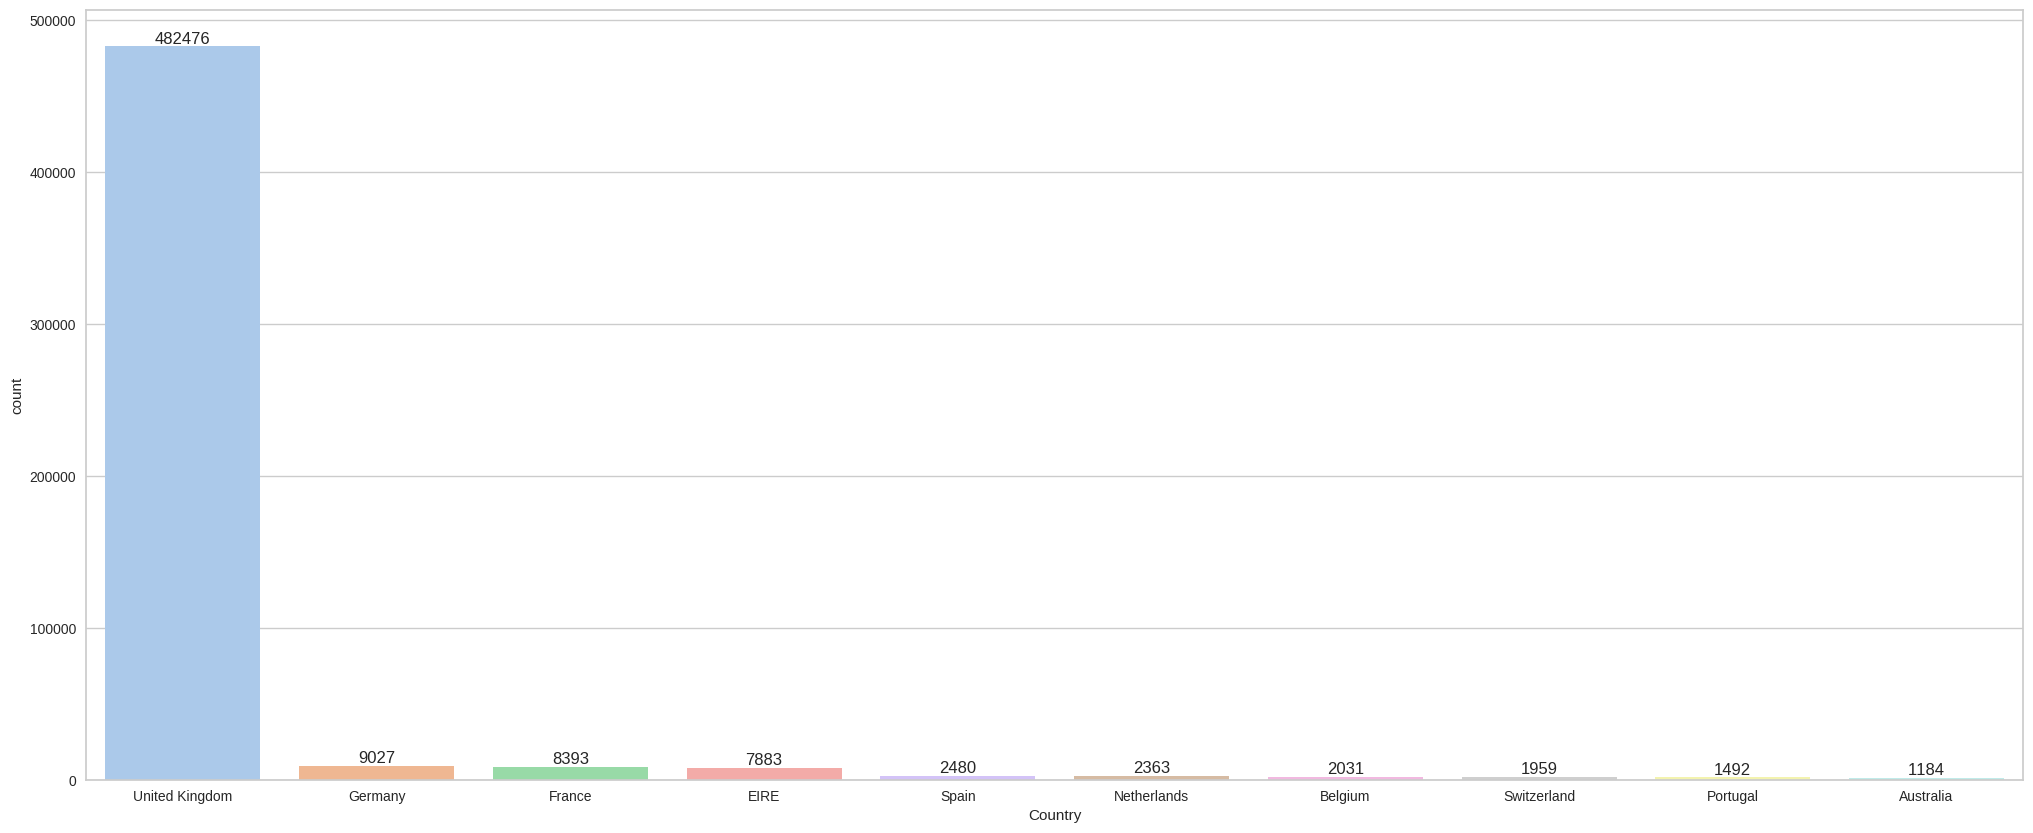

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.countplot(data=delivered_df, x='Country', order=pd.value_counts(delivered_df['Country']).iloc[:10].index, palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is a type of graphical representation used to visualize the distribution of categorical data. It is a bar plot where the x-axis represents the categories and the y-axis represents the count or frequency of occurrences of each category. Countplots are particularly useful when dealing with categorical variables and exploring the frequency or distribution of each category in a dataset.

Here, we visualize the count of orders from top 10 countries using countplot.

##### 2. What is/are the insight(s) found from the chart?

Most of the orders (around 90%) are from the United Kingdom, where the store itself is based in. Neighbouring Germany, France and Ireland follow next. Australia is the top non-European country in the list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can know from which country most of the purchases are ordered. So it can plan to improve its delivery services in those countries and also improve its marketing and advertisements in those areas.

#### Chart 2 - Top 10 countries with most orders being cancelled

In [ ]:
country_count = df.groupby('Country').count()[['InvoiceNo']]
country_count = country_count.merge(cancel_df.groupby('Country').count()[['StockCode']], on = 'Country')
country_count.rename(columns={'InvoiceNo': 'Order count','StockCode':'Cancelled count'}, inplace=True)
country_count['% cancelled'] = country_count['Cancelled count']/country_count['Order count']*100
country_count.sort_values(by='% cancelled', ascending=False,inplace=True)
country_count

Order count  Cancelled count  % cancelled
Country                                                      
USA                         291              112    38.487973
Czech Republic               30                5    16.666667
Malta                       127               15    11.811024
Japan                       358               37    10.335196
Saudi Arabia                 10                1    10.000000
Australia                  1258               74     5.882353
Italy                       803               45     5.603985
Bahrain                      19                1     5.263158
Germany                    9480              453     4.778481
EIRE                       8184              301     3.677908
Poland                      341               11     3.225806
Singapore                   229                7     3.056769
Sweden                      461               11     2.386117
Denmark                     389                9     2.313625
Spain                      2528               48     1.898734
Belgium                    2069               38     1.836636
Switzerland                1994               35     1.755266
France                     8541              148     1.732818
European Community           61                1     1.639344
United Kingdom           490300             7821     1.595146
Finland                     695               10     1.438849
Hong Kong                   284                4     1.408451
Channel Islands             757               10     1.321004
Cyprus                      611                8     1.309329
Norway                     1086               14     1.289134
Portugal                   1510               18     1.192053
Austria                     401                3     0.748130
Greece                      146                1     0.684932
Israel                      294                2     0.680272
Netherlands                2371                8     0.337410

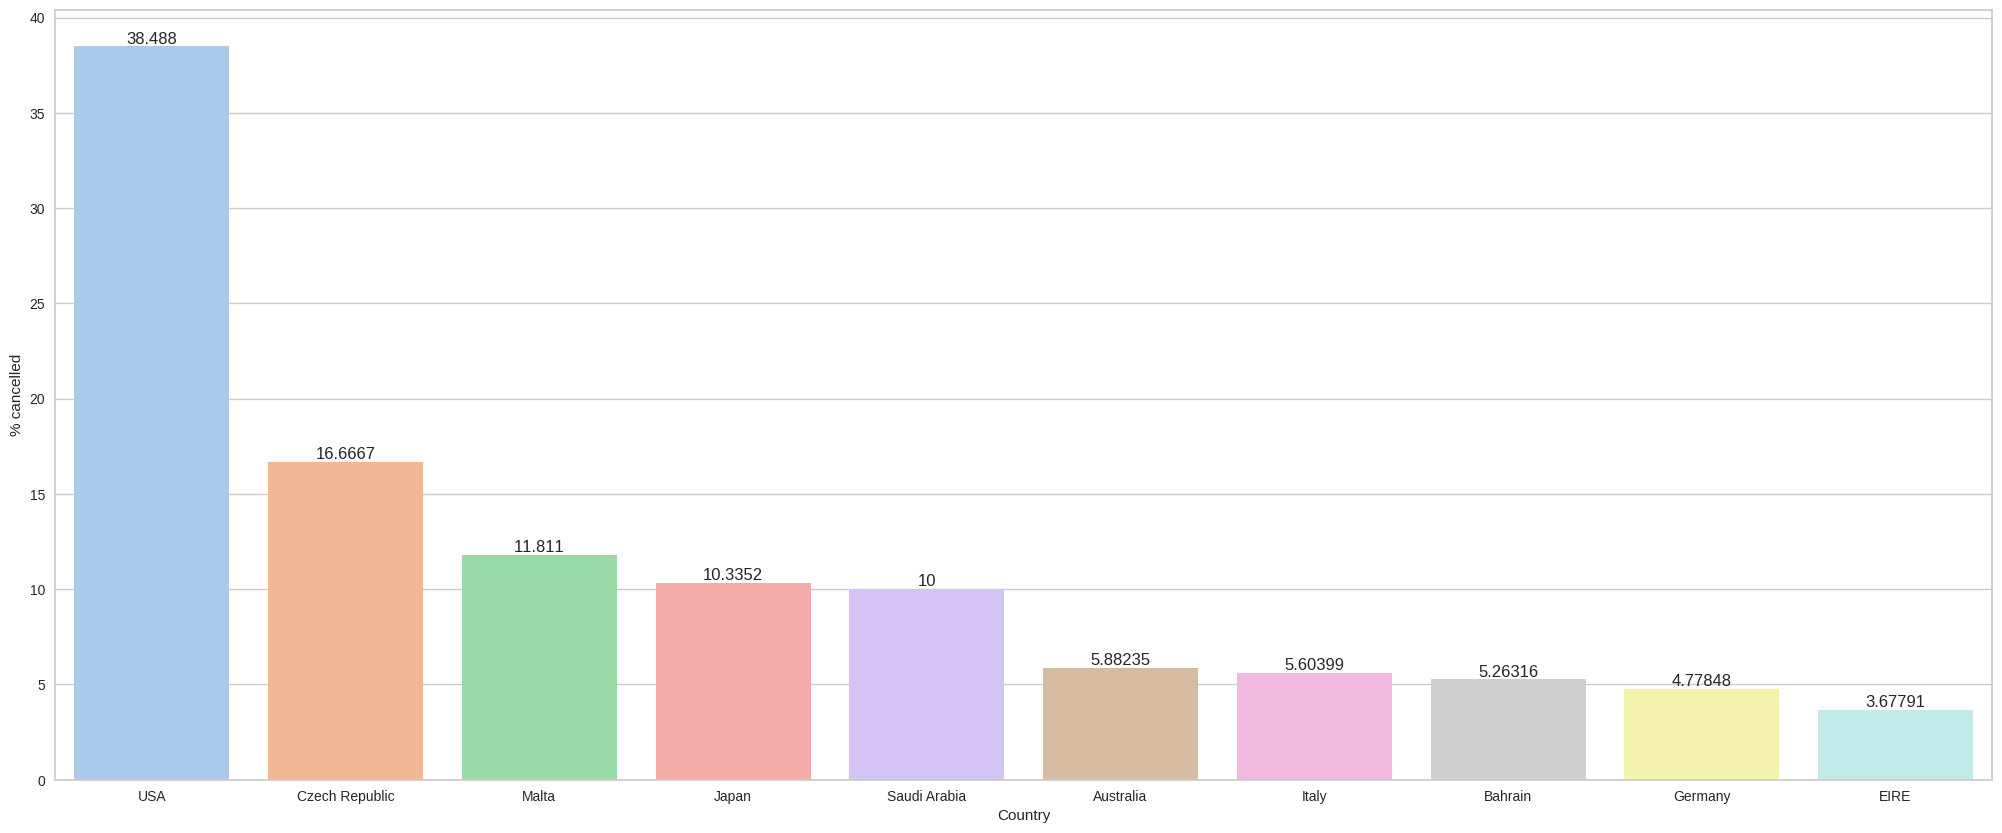

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=country_count.head(10), x=country_count.head(10).index, y='% cancelled', palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

We use the countplot to check the percentage of orders cancelled for a particular country.

##### 2. What is/are the insight(s) found from the chart?

USA has the highest percentage of orders cancelled with 38.49% followed by Czech Republic (16.67%) and Malta(11.8%). UK where most of the orders are has less than 4% of orders cancelled as it is not in the top 10 list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can plan its strategy for the countries with many orders being cancelled. They can either focus their attention to these countries to reduce the cancellations or they can ignore these countries if they feel they cannot generate much revenue from these countries. They also need to find the reasons behind the cancellations, where a probable reason could be inefficient delivery services, so that these cancellations do not happen in other countries.

#### Chart 3 - Distribution of Quantities ordered per transaction

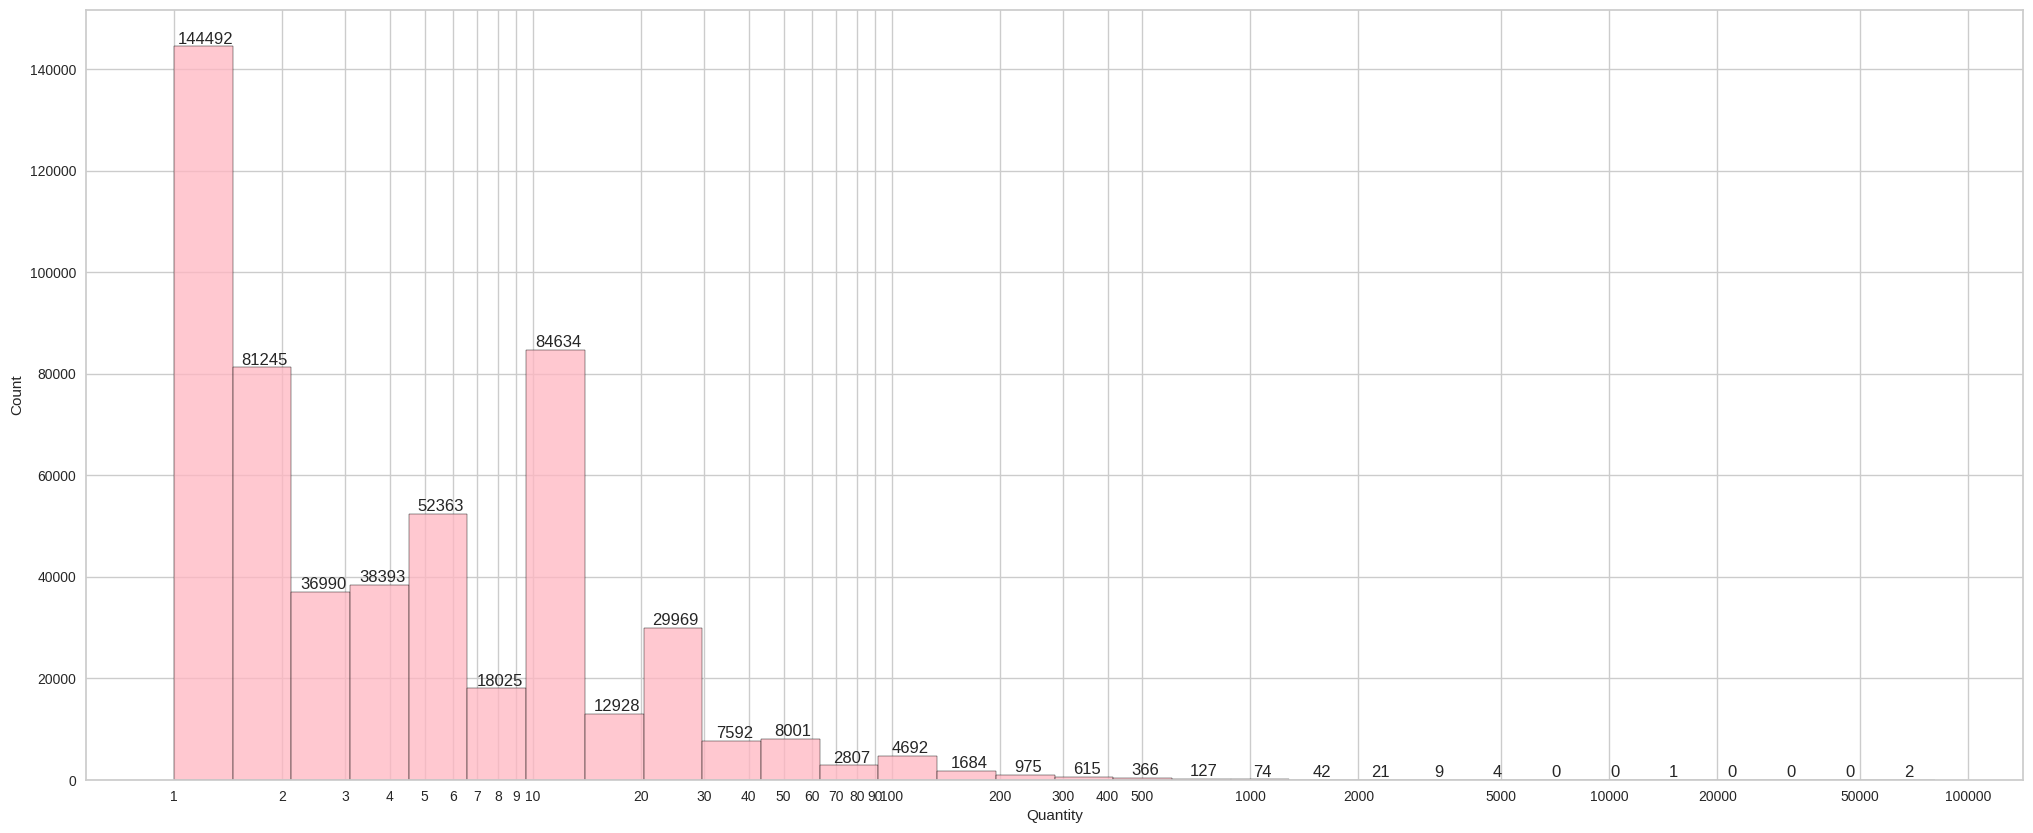

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.histplot(data = delivered_df, x = 'Quantity',log_scale=True,bins=30,color='lightpink')
ax.bar_label(ax.containers[0])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,1000,2000,5000,10000,20000,50000,100000])
ax.set_xticklabels( [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,1000,2000,5000,10000,20000,50000,100000] )
plt.show()


##### 1. Why did you pick the specific chart?

A histplot, short for histogram plot, is a type of visualization used to represent the distribution of a continuous numerical variable. It provides a graphical representation of the frequency or count of observations falling into different intervals or bins along a numeric axis. In a histplot, the x-axis represents the range of values of the variable being analyzed, divided into several equally sized intervals or bins. The y-axis represents the frequency or count of observations falling within each bin.

We use the log scale on x-axis which is useful when dealing with exponential growth or highly skewed data, since our data is mostly concentrated in low values (1 to 10) yet it goes upto 80000.

We use the histplot to plot the distribution of quantity ordered per transaction whose value ranges from 1 to 80000 and is a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Most of the transactions have quantity less than 10. The number decreases gradually. The data has only 3 transactions where the quantity ordered is more than 10000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company gets to know that most of the orders that it gets has less quantity per order and very few are bulk orders. The company so can reduce its investment on bulk order handling process if any and so can focus on orders with less quantity and retail purchase.

#### Chart 4 - Distribution of Unit Price of items per transaction

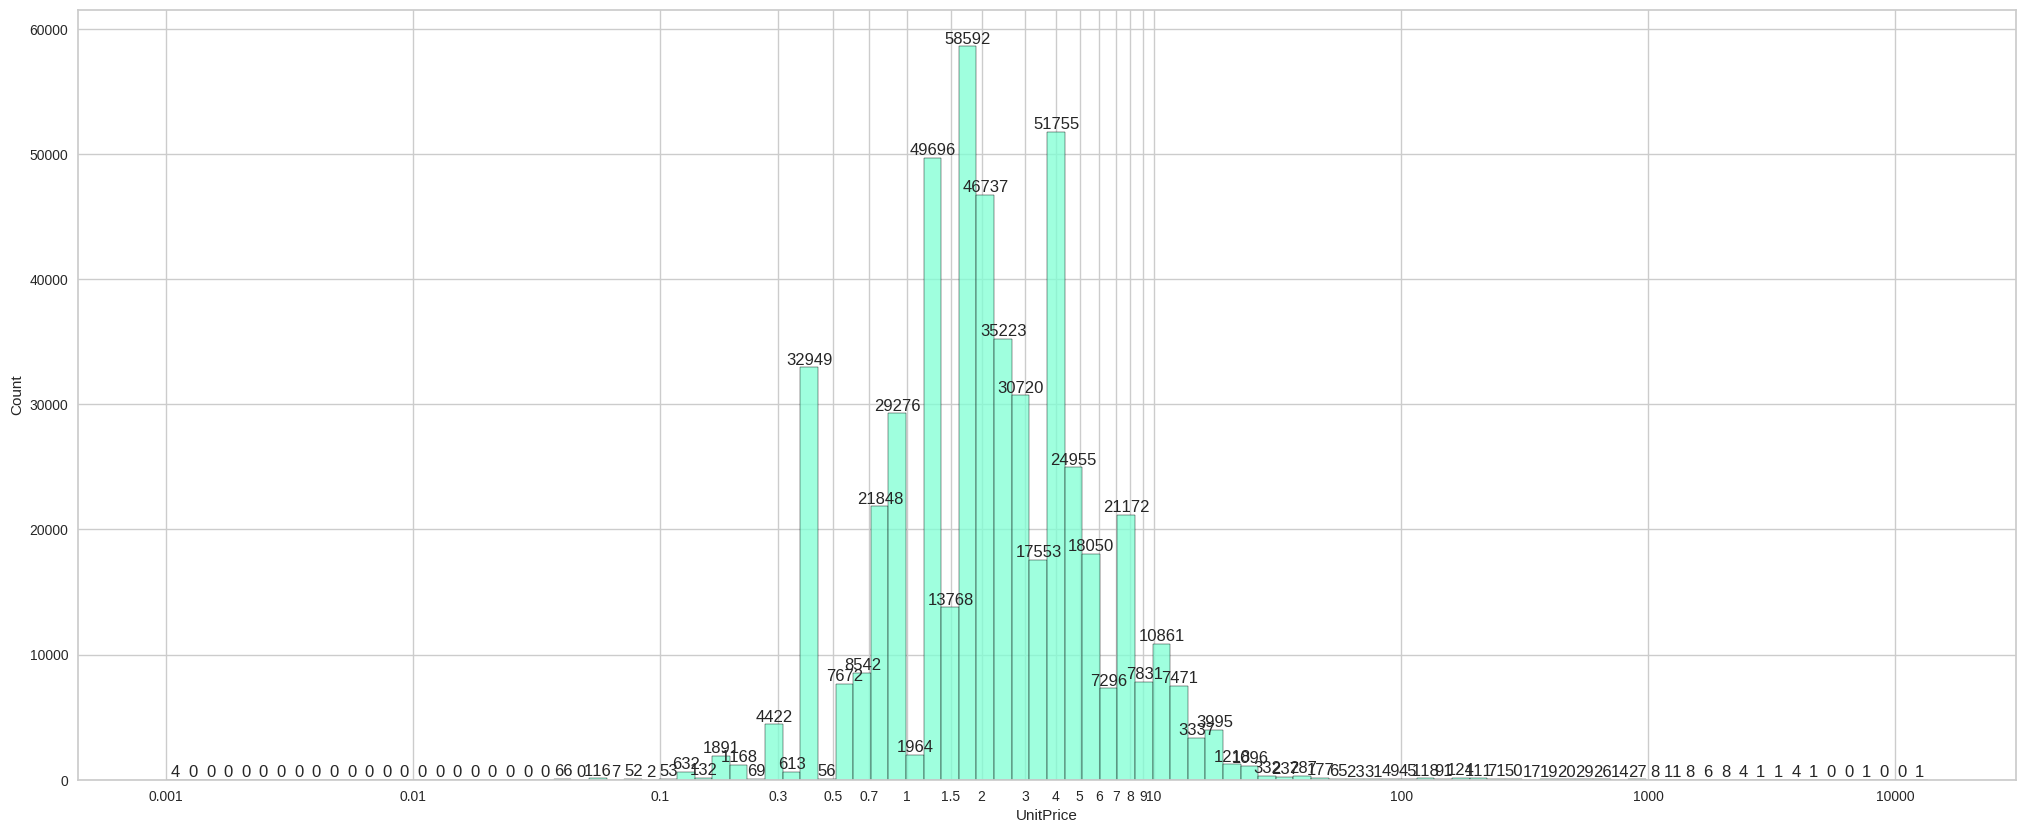

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.histplot(data = delivered_df[delivered_df['UnitPrice']!=0], x = 'UnitPrice',log_scale=True,bins=100,color='aquamarine')
ax.bar_label(ax.containers[0])
ax.set_xticks([.001,.01,.1,0.3,0.5,0.7,1,1.5,2,3,4,5,6,7,8,9,10,100,1000,10000])
ax.set_xticklabels( [.001,.01,.1,0.3,0.5,0.7,1,1.5,2,3,4,5,6,7,8,9,10,100,1000,10000] )
plt.show()

##### 1. Why did you pick the specific chart?

We use the histplot along with log scale to plot the distribution of unit price as unit price has a large range varying from £0.001 to £10000 and again the data is concentrated closely around low range.

##### 2. What is/are the insight(s) found from the chart?

The Unit price is concentrated around £1 to £4 meaning most of the items in the transaction has unit price of item around £1 to £4. There are only 4 items with unit price less than £0.01 and only 1 item with price more than £10000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can know that most of the transactions involve unit price in the range £1 to £4 so it can focus its marketing for items in those range to bring in revenue as those items are already preferred in the market.

#### Chart 5 - Distribution of Amount/Revenue per transaction

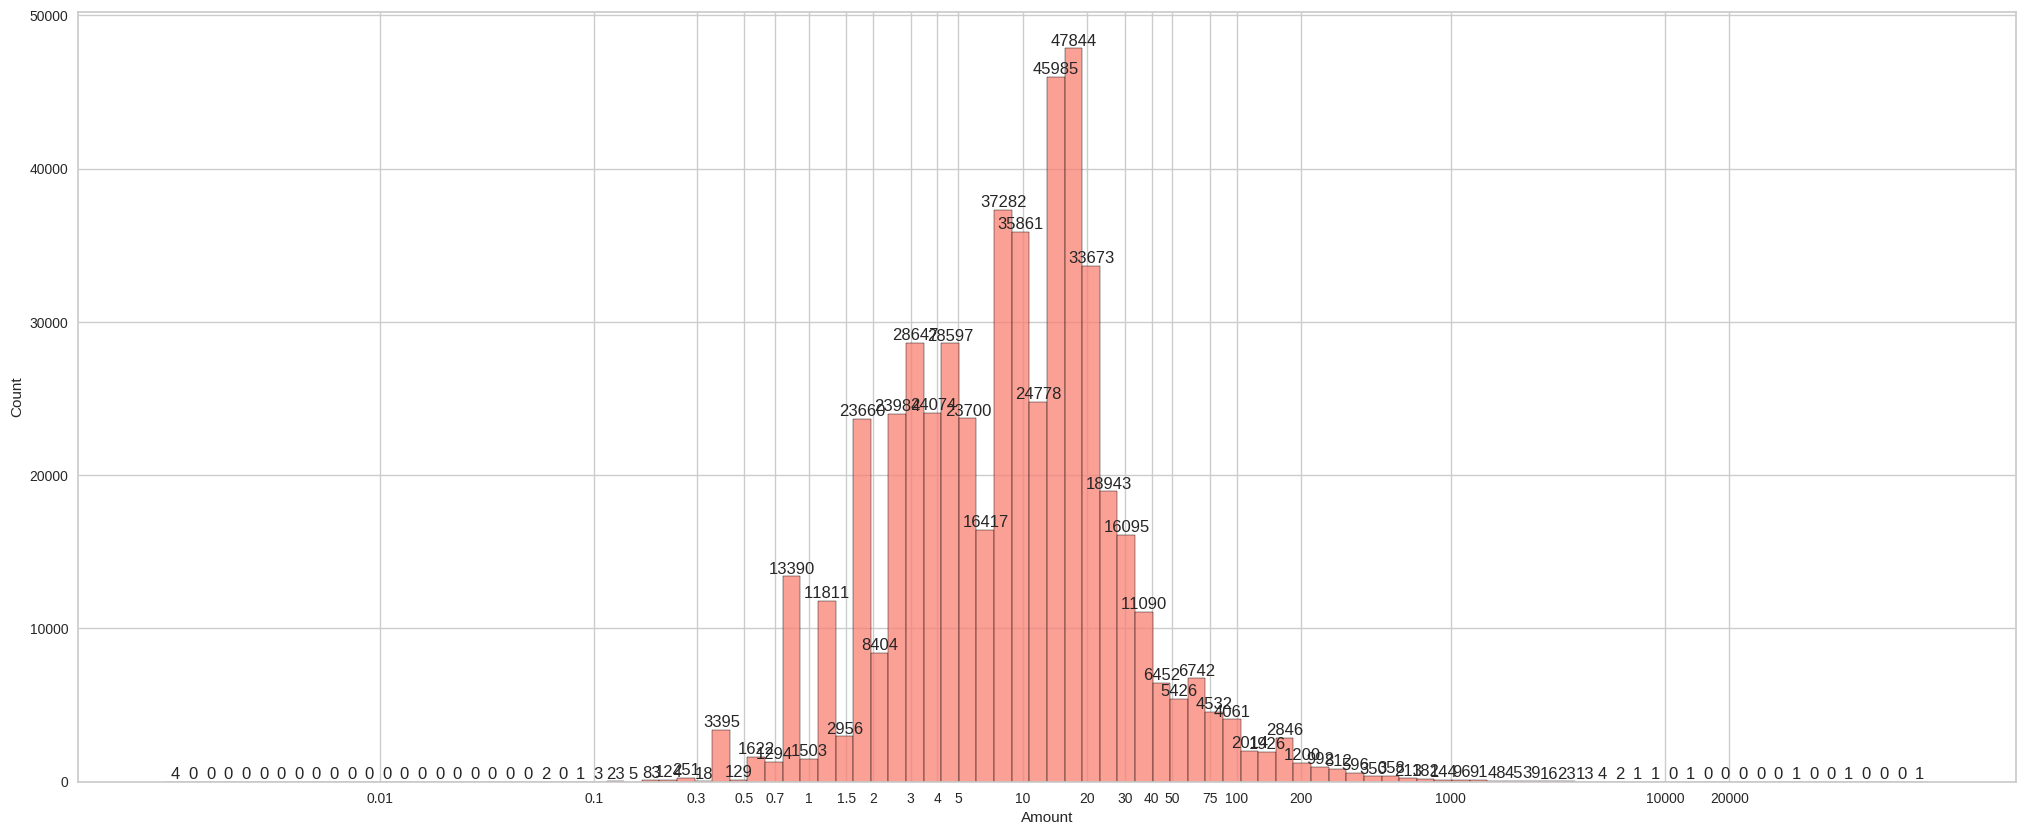

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.histplot(data = delivered_df[delivered_df['Amount']!=0], x = 'Amount',log_scale=True,bins=100,color='salmon')
ax.bar_label(ax.containers[0])
ax.set_xticks([.01,.1,0.3,0.5,0.7,1,1.5,2,3,4,5,10,20,30,40,50,75,100,200,1000,10000,20000])
ax.set_xticklabels( [.01,.1,0.3,0.5,0.7,1,1.5,2,3,4,5,10,20,30,40,50,75,100,200,1000,10000,20000] )
plt.show()

##### 1. Why did you pick the specific chart?

We use the histplot along with log scale to plot the distribution of amount as amount has a large range varying from £0.001 to more than £20000 and again the data is concentrated closely around low range.

##### 2. What is/are the insight(s) found from the chart?

The amount generated per transactions mostly ranges between £2 to £30. Only 3 transactions have generated more than £20000. £18 generated in a transactions has occurred most no. of times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By examining the distribution of transactional amounts, company can gain insight into their revenue streams. Based on transactional cost, they can identify the average transaction value, the distribution of high-value and low-value transactions, and any trends or fluctuations in transaction amounts over time and so can optimize their pricing strategies.

#### Chart 6 - Distribution of no. of transactions based on month of the year

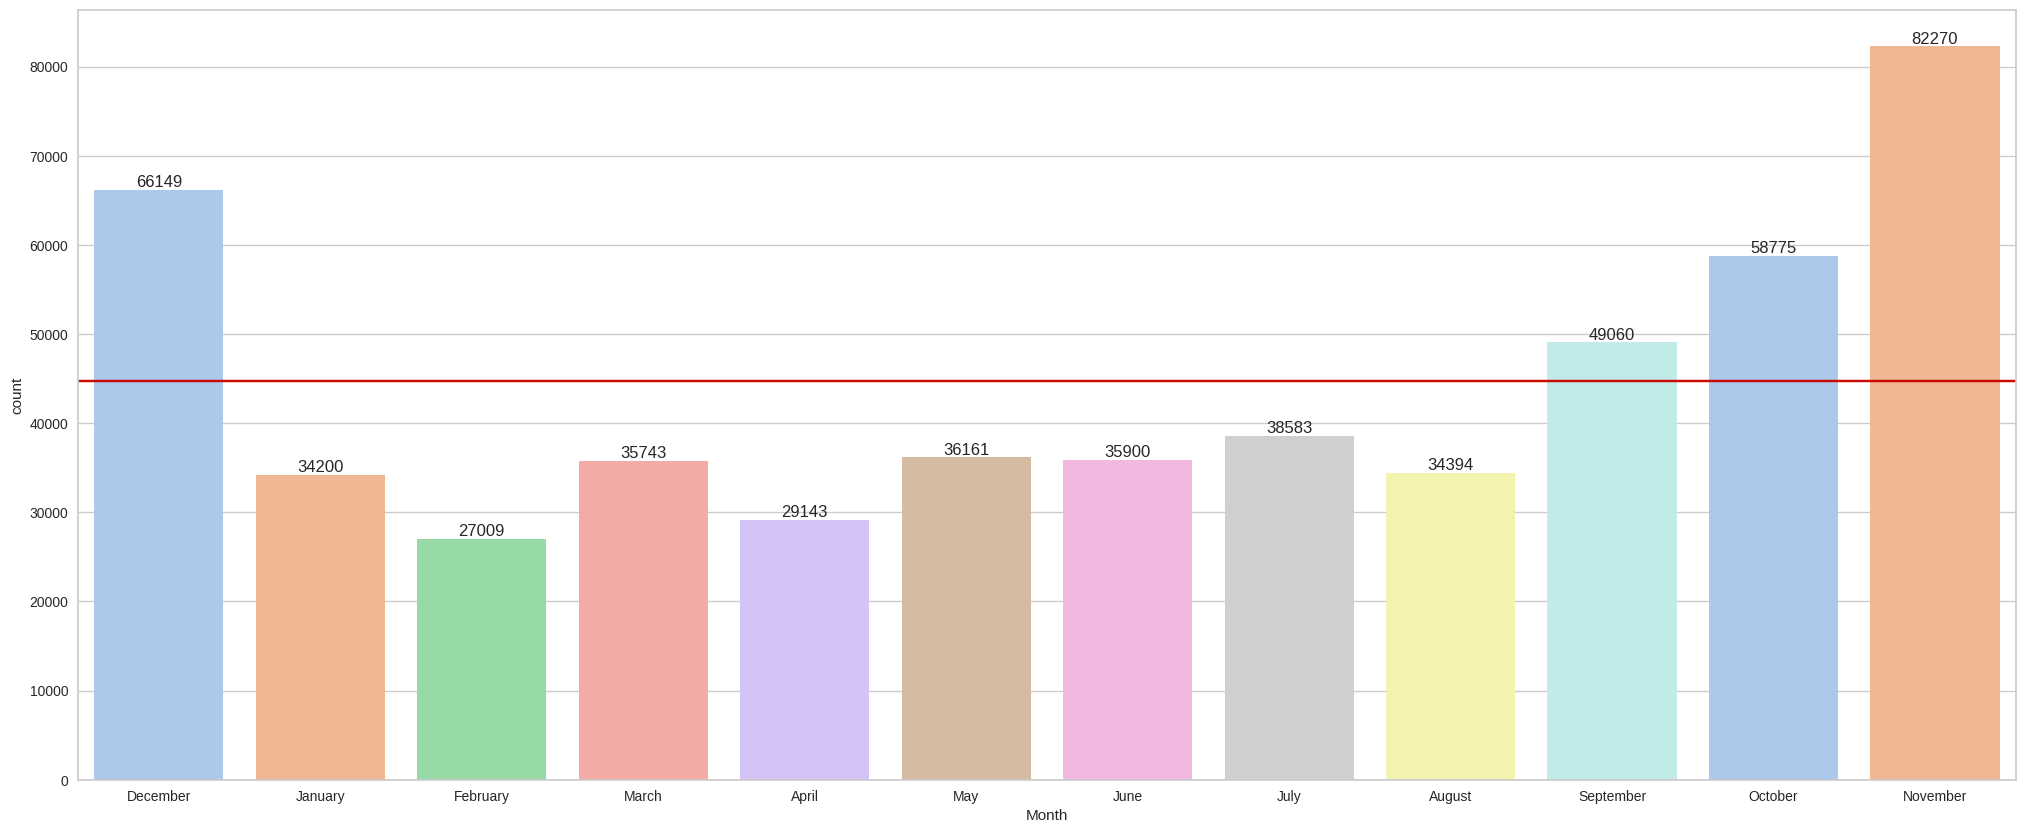

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.countplot(data=delivered_df, x='Month',  palette='pastel')
ax.bar_label(ax.containers[0])
plt.axhline(y = 536641/12, color = 'r', linestyle = '-')
plt.show()

##### 1. Why did you pick the specific chart?

We use the countplot to count the number of transactions that occurred for a particular month of the year.

##### 2. What is/are the insight(s) found from the chart?

Months of October, November and December have seen comparatively higher no. of transactions than rest of the year. In the UK, this period is the holiday and festive season and so it has more no. of transactions than rest of the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company will try to improve the supply chain and logistics in the festive season as it will get more no. of orders. It can plan on improving the sales for the rest of the year by focussing on marketing or product developement.

#### Chart 7 - Distribution of no. of transaction based on Day of the Week.

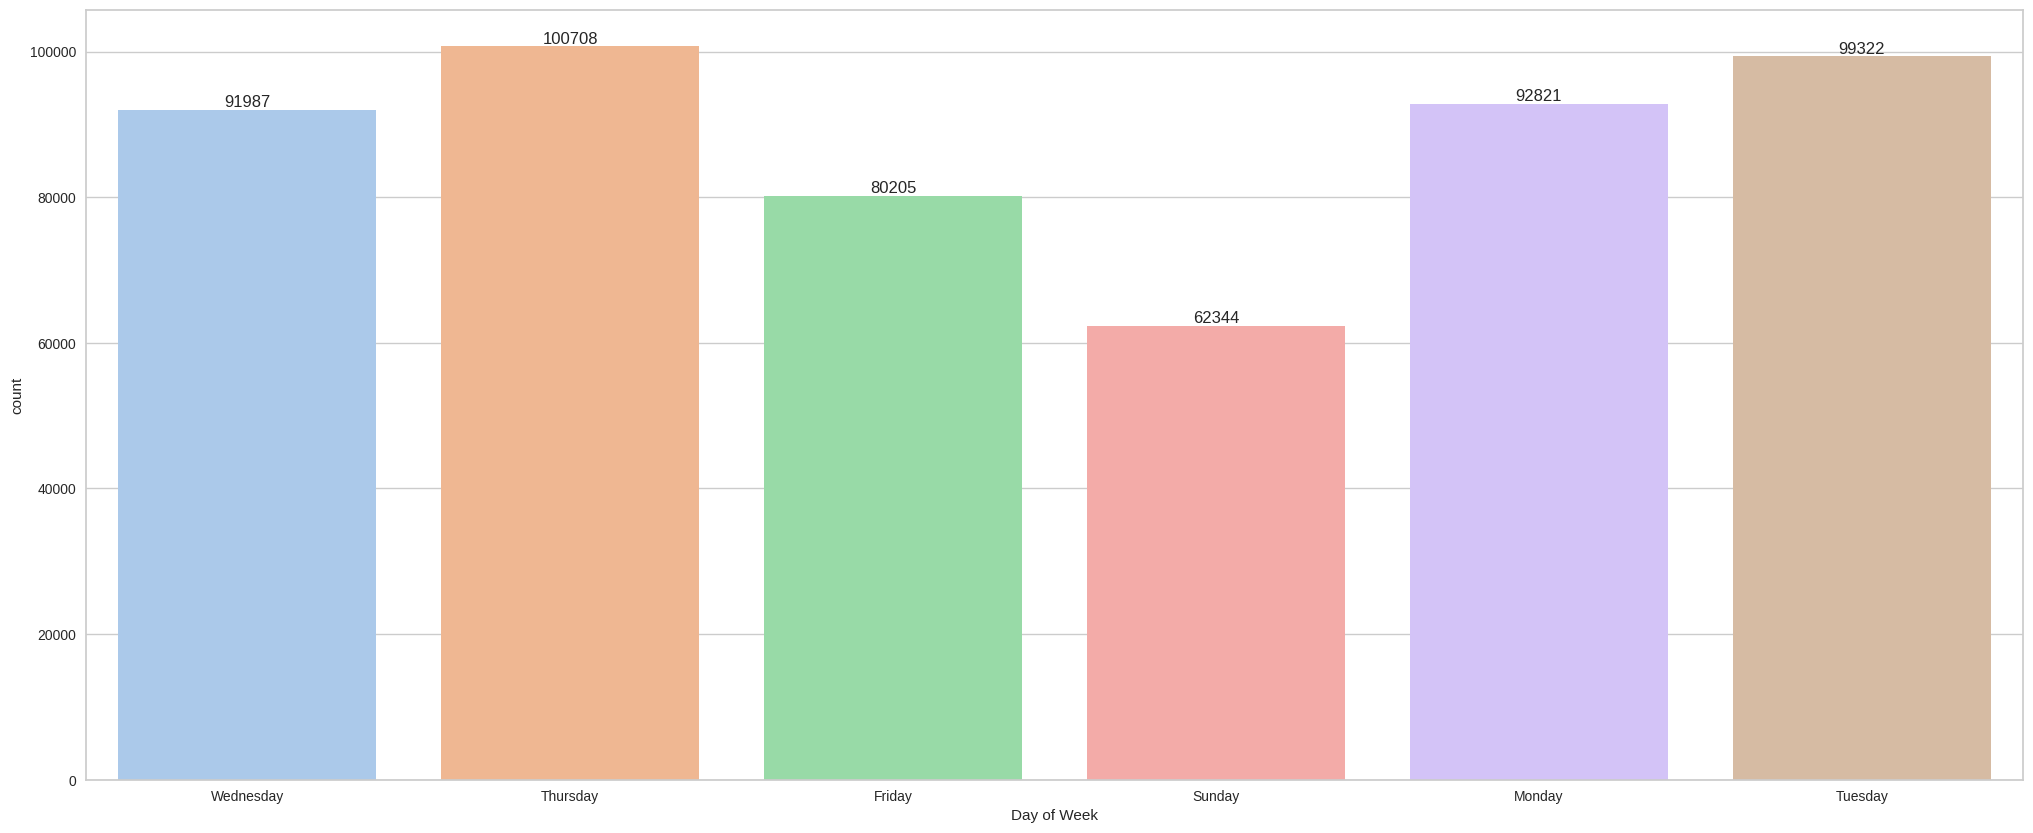

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.countplot(data=delivered_df, x='Day of Week',  palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

We use countplot to plot the no. of transactions occurring on a particular day of the week.

##### 2. What is/are the insight(s) found from the chart?

There are no transactions on Saturday meaning its a weekly off day. Other than Saturday, the other day of weekend i.e. Sunday sees less no. of transactions compared to the weekdays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can plan its weekly strategy by looking at this trend. They can either try to upsell on Sunday or can leave things as it is to prepare for the upcoming week.  

#### Chart 8 - Distribution of no. of transaction based on Hour of the day

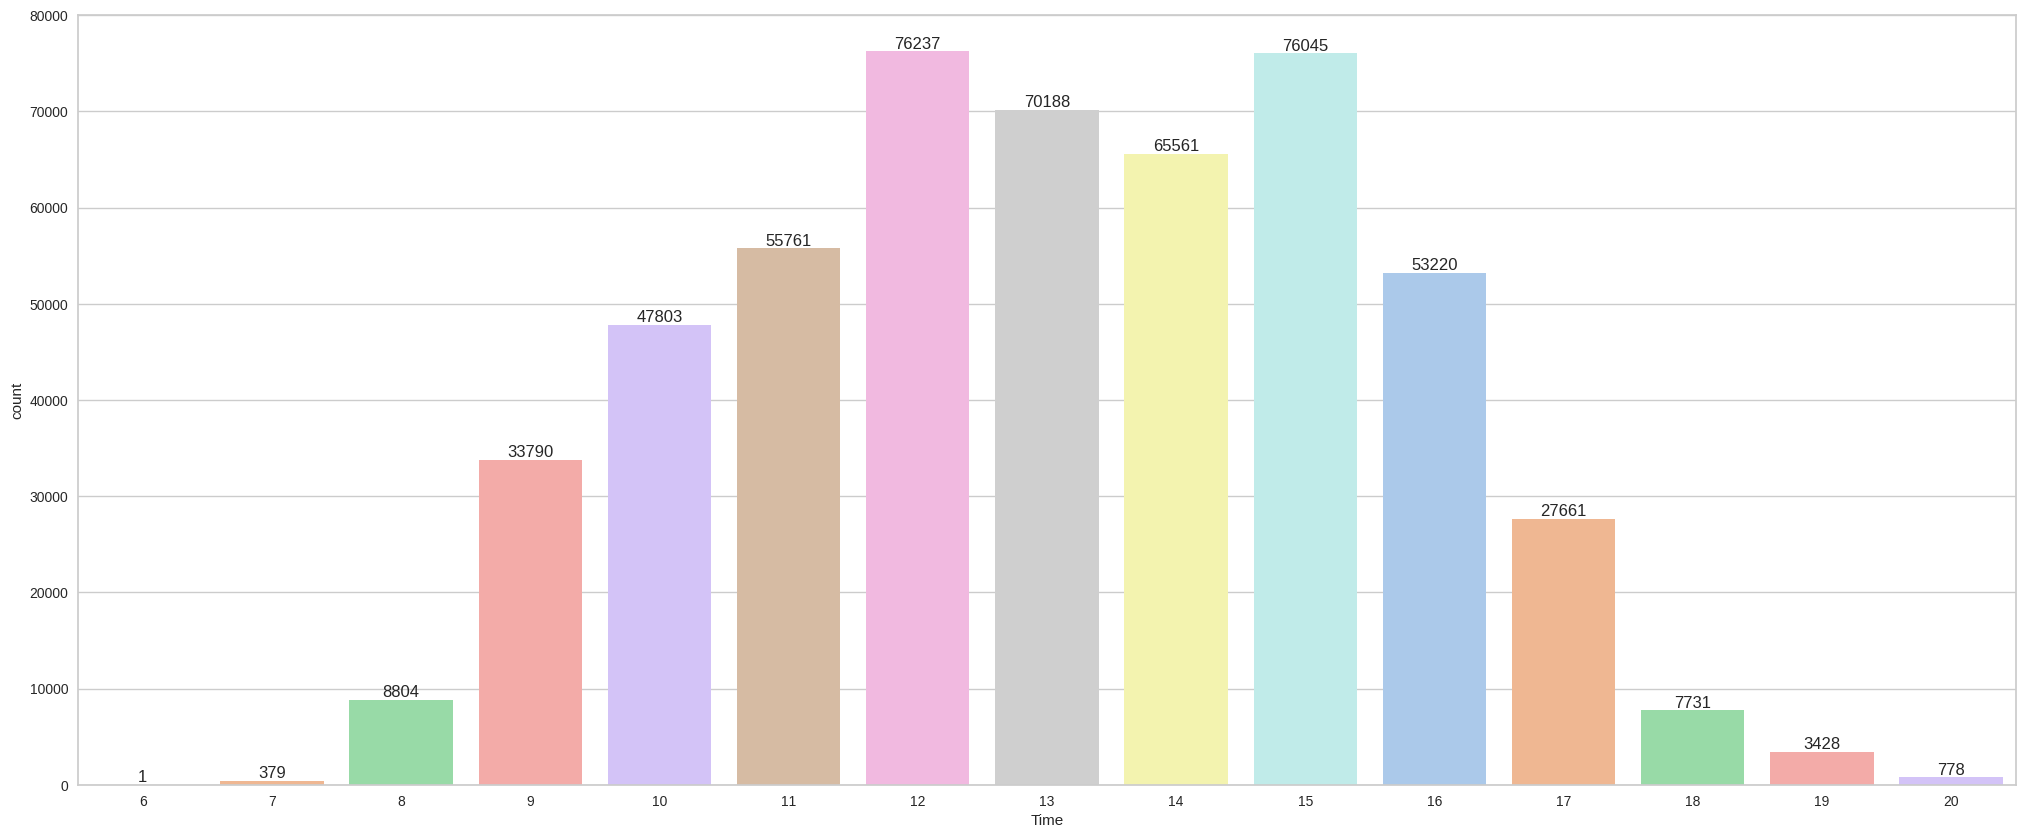

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.countplot(data=pd.DataFrame(delivered_df['Time'].apply(lambda x:x.hour)),x='Time', palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

We use the countplot to count the no. of transactions occurring in a particular hour of the day.

##### 2. What is/are the insight(s) found from the chart?

Most of the transactions occur in the day, between 9 AM to 6 PM particularly between 12 PM to 4 PM. The store opens at around 6 AM and goes upto 9 PM.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can know which time of the day is busiest and so can keep the efficiency of its services at high during this time.

#### Chart 9 - Timeseries plot for no. of transactions occurring in a day

In [ ]:
pd.DataFrame(delivered_df['InvoiceDate'].apply(lambda x:x.date())).value_counts().reset_index()


InvoiceDate     0
0    2011-12-05  5266
1    2011-12-08  4840
2    2011-11-29  4222
3    2011-11-16  4096
4    2011-11-11  4021
..          ...   ...
300  2011-08-07   522
301  2010-12-19   498
302  2011-05-01   446
303  2010-12-22   285
304  2011-02-06   273

[305 rows x 2 columns]

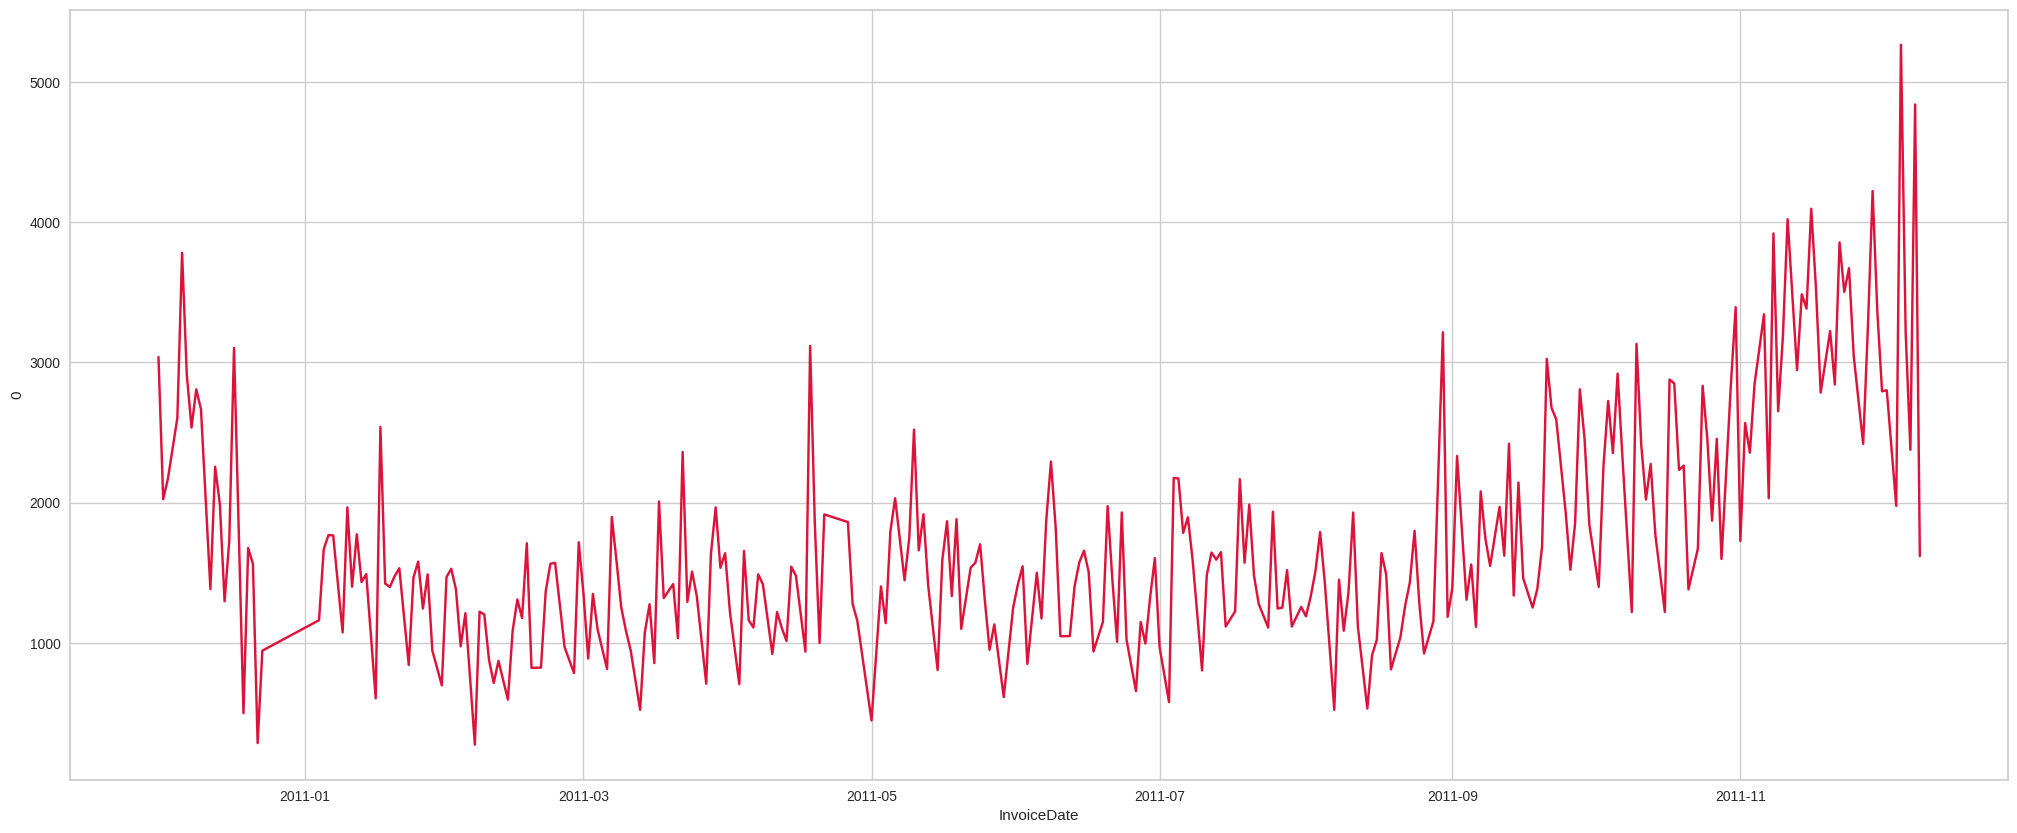

In [ ]:
datedf = pd.DataFrame(delivered_df['InvoiceDate'].apply(lambda x:x.date())).value_counts().reset_index()
plt.figure(figsize= (25,10))
ax=sns.lineplot(data=datedf,x='InvoiceDate',y=0,color='crimson')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line graph, is a common type of visualization used to display trends and patterns in data. It consists of a series of data points connected by straight lines, with the x-axis representing the independent variable (such as time or a numerical category) and the y-axis representing the dependent variable (such as a measurement or quantity). Line plots are particularly useful when examining the relationship between two continuous variables or tracking changes over time.

We use the lineplot to plot the no. of transactions ocurring in a day for every day in the given timespan of the dataset.  

##### 2. What is/are the insight(s) found from the chart?

In the short term, the data fluctutates as inferred from the weekly plot where different days of the week had different count. Over the long term, the count is higher for the month of October, November and December which was also inferred previously.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this plot were already gained from other graphs previously.

#### Chart 10 - Top 10 Bulk Orders

In [ ]:
itemdf = delivered_df.groupby(['StockCode','Description']).agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False).head(10).reset_index()
itemdf

StockCode                         Description  Quantity
0     23843         PAPER CRAFT , LITTLE BIRDIE     80995
1     23166      MEDIUM CERAMIC TOP STORAGE JAR     78033
2     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
3    85099B             JUMBO BAG RED RETROSPOT     48375
4    85123A  WHITE HANGING HEART T-LIGHT HOLDER     37584
5     22197                      POPCORN HOLDER     36749
6     21212     PACK OF 72 RETROSPOT CAKE CASES     36396
7     84879       ASSORTED COLOUR BIRD ORNAMENT     36362
8     23084                  RABBIT NIGHT LIGHT     30739
9     22492             MINI PAINT SET VINTAGE      26633

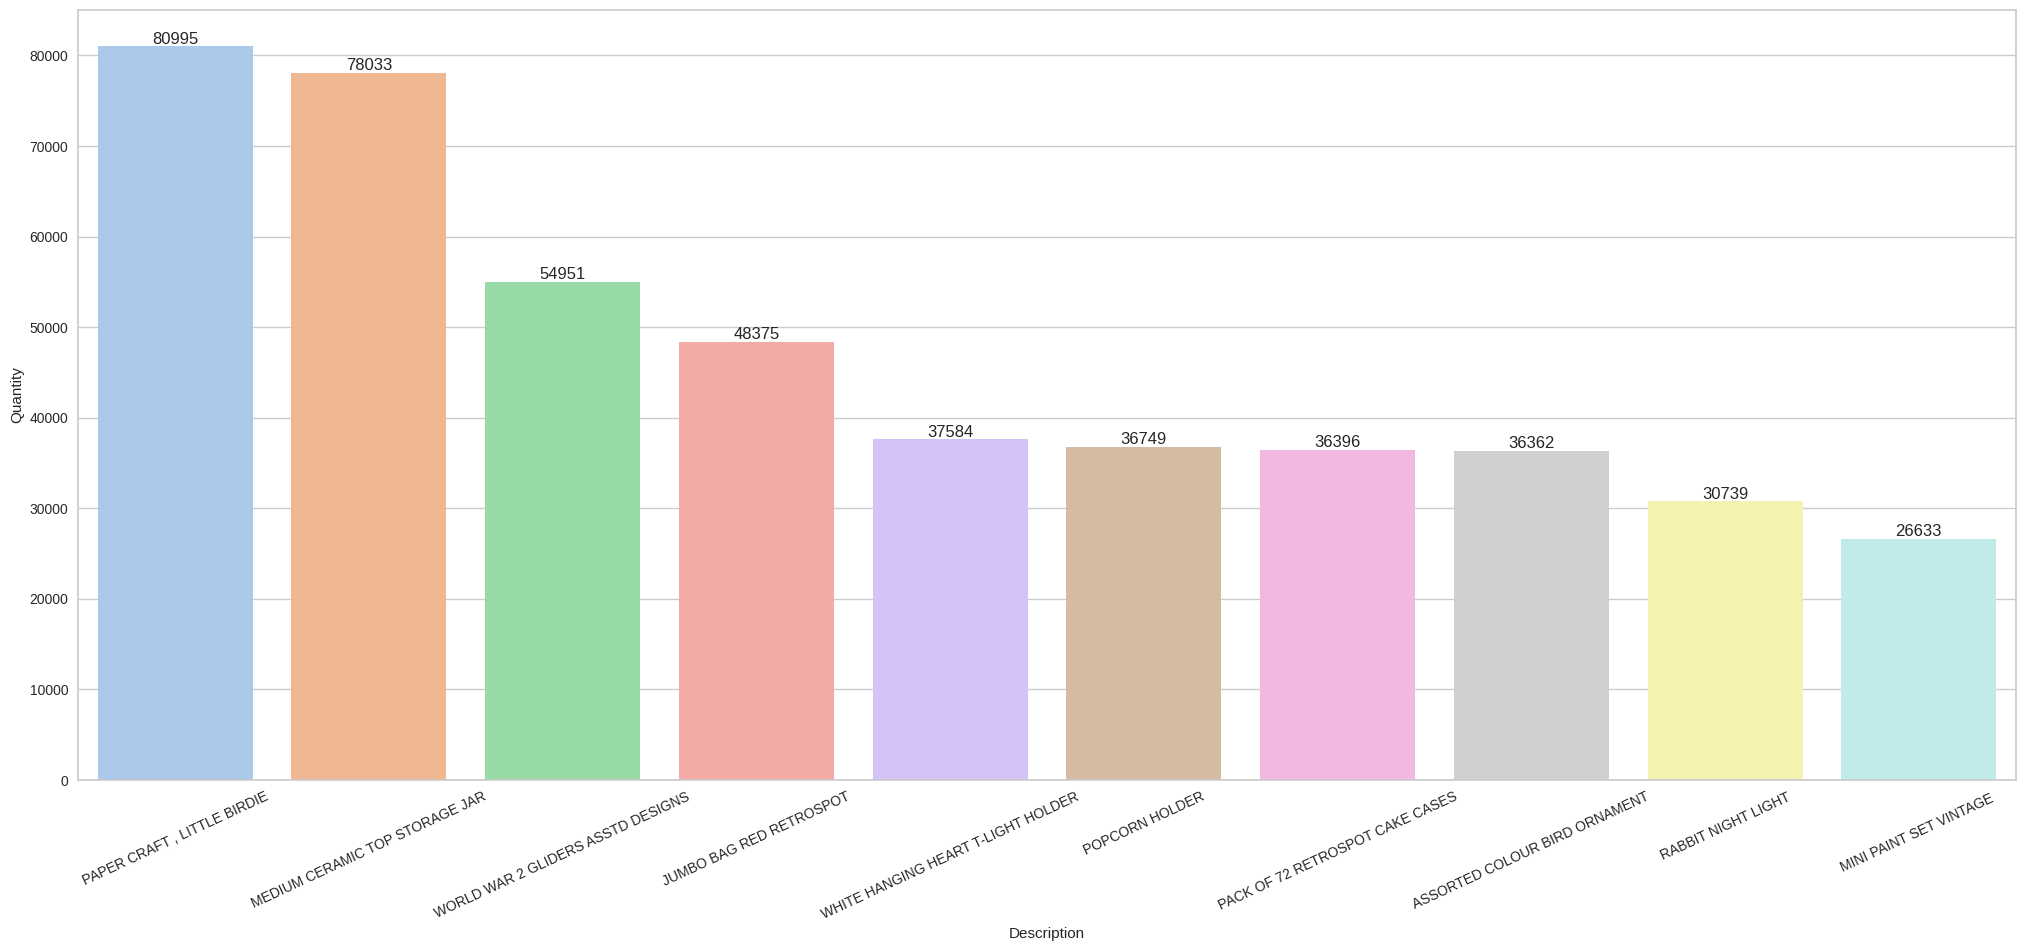

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=itemdf,x='Description',y='Quantity', palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 25)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot, also known as a bar chart, is a visual representation of categorical data using rectangular bars. It is commonly used to compare and display the frequency, count, or proportion of different categories or groups. In a bar plot, each category or group is represented by a bar, with the length or height of the bar corresponding to the magnitude of the data being represented.

We use the bar plot here to plot the items having highest bulk quantity sold in a single transaction.

##### 2. What is/are the insight(s) found from the chart?

PAPER CRAFT , LITTLE BIRDIE	is the item that has been sold with max quantity of 80995 in a single transaction followed by MEDIUM CERAMIC TOP STORAGE JAR with 78033 quantities in a single transaction. There are quite a few items that have been sold with more than 30000 in number in single transaction.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company gets to know that these are the products that were ordered in bulk once. So they need to prepare for possibility of such bulk orders for these products in the future too.

#### Chart 11 - Top 10 Products with highest revenue generated

In [ ]:
itemdf = delivered_df.groupby(['StockCode','Description']).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10).reset_index()
itemdf

StockCode                         Description     Amount
0       DOT                      DOTCOM POSTAGE  206248.77
1     22423            REGENCY CAKESTAND 3 TIER  174156.54
2     23843         PAPER CRAFT , LITTLE BIRDIE  168469.60
3    85123A  WHITE HANGING HEART T-LIGHT HOLDER  104284.24
4     47566                       PARTY BUNTING   99445.23
5    85099B             JUMBO BAG RED RETROSPOT   94159.81
6     23166      MEDIUM CERAMIC TOP STORAGE JAR   81700.92
7      POST                             POSTAGE   78101.88
8         M                              Manual   77752.82
9     23084                  RABBIT NIGHT LIGHT   66870.03

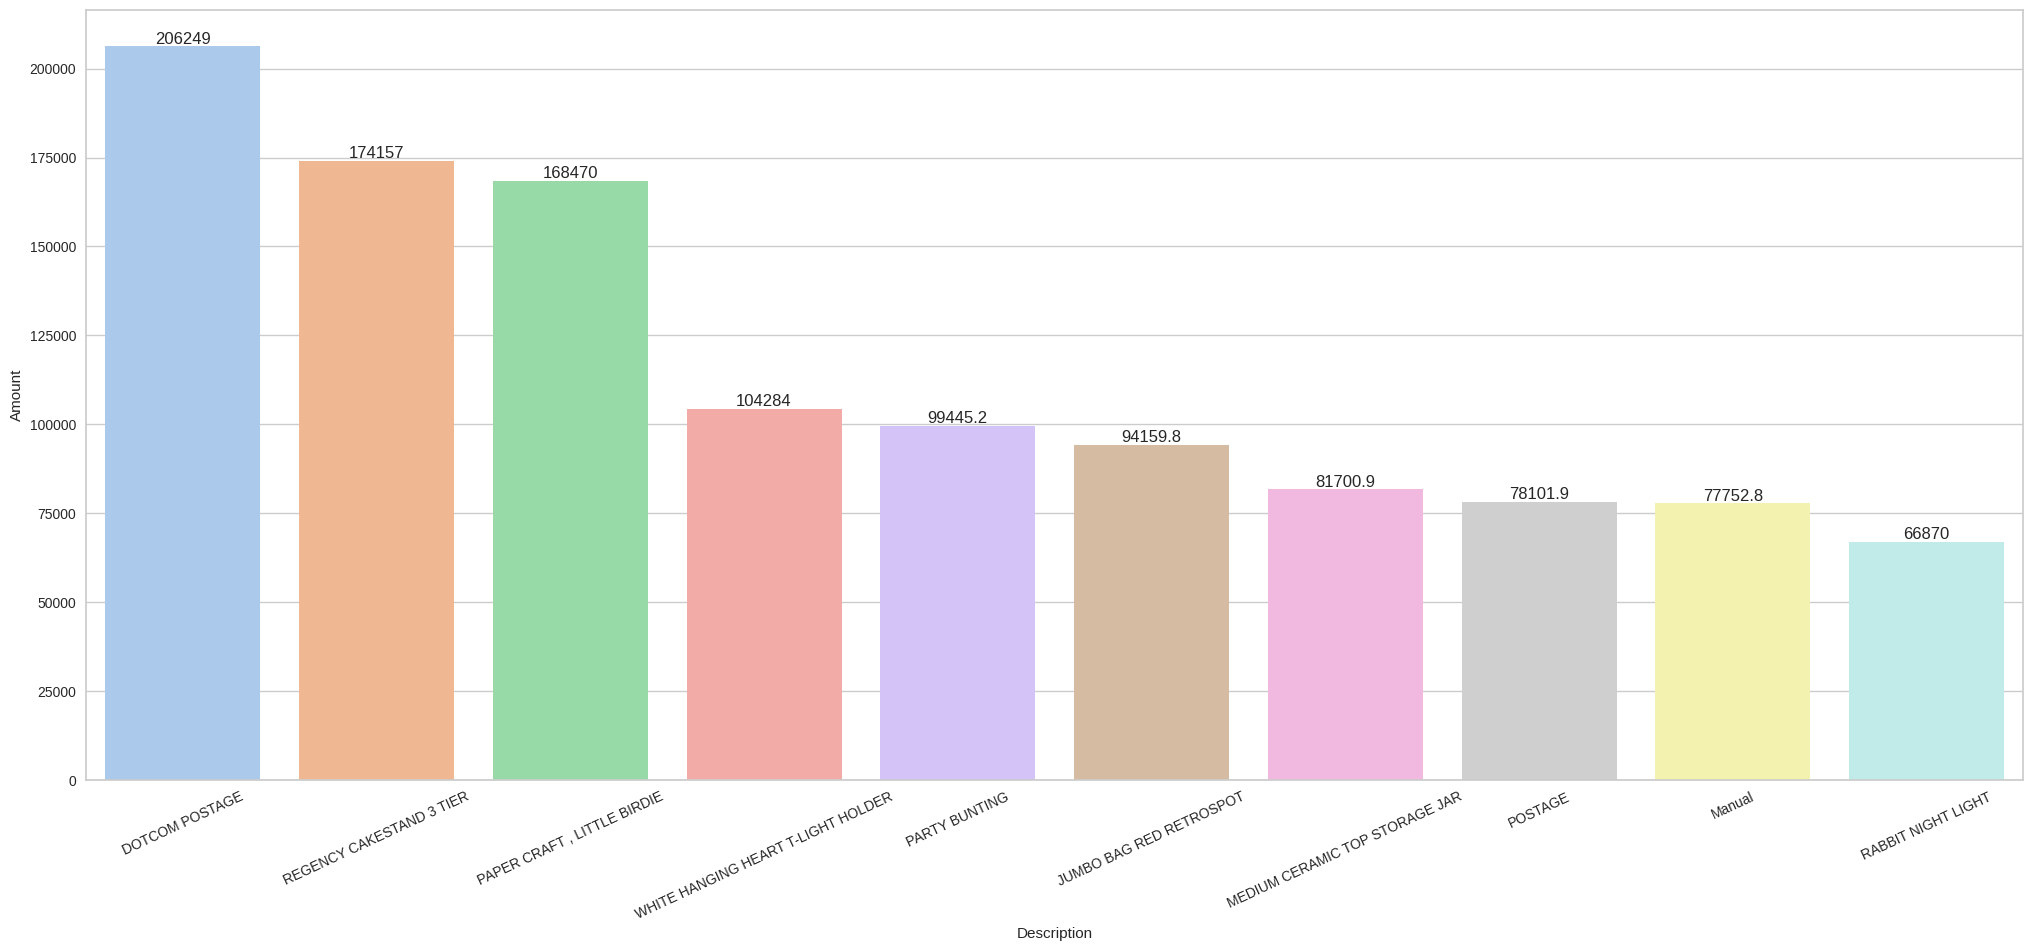

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=itemdf,x='Description',y='Amount', palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 25)
plt.show()

##### 1. Why did you pick the specific chart?

We use the barplot to plot the top 10 products that have generated the highest revenue for the company.

##### 2. What is/are the insight(s) found from the chart?

Postage charges occur at the top so we ignore that. REGENCY CAKESTAND 3 TIER is the product that has generated highest revenue with £ 174,157 followed by PAPER CRAFT, LITTLE BIRDIE with £ 168,470. Other products follow with around £ 100,000.

 ##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company gets to know about its most revenue generating product. They can make it their star product with some marketing and better supply chain management can bring in more revenue.

#### Chart 12 - Top 10 Products sold most no. of times

In [ ]:
itemdf = pd.DataFrame(delivered_df.groupby(['StockCode','Description']).size()).sort_values(by=0,ascending=False).head(10).reset_index()
itemdf

StockCode                         Description     0
0    85123A  WHITE HANGING HEART T-LIGHT HOLDER  2248
1    85099B             JUMBO BAG RED RETROSPOT  2112
2     22423            REGENCY CAKESTAND 3 TIER  2009
3     47566                       PARTY BUNTING  1700
4     20725             LUNCH BAG RED RETROSPOT  1581
5     84879       ASSORTED COLOUR BIRD ORNAMENT  1476
6     22720   SET OF 3 CAKE TINS PANTRY DESIGN   1392
7     21212     PACK OF 72 RETROSPOT CAKE CASES  1352
8     20727             LUNCH BAG  BLACK SKULL.  1301
9     22457     NATURAL SLATE HEART CHALKBOARD   1255

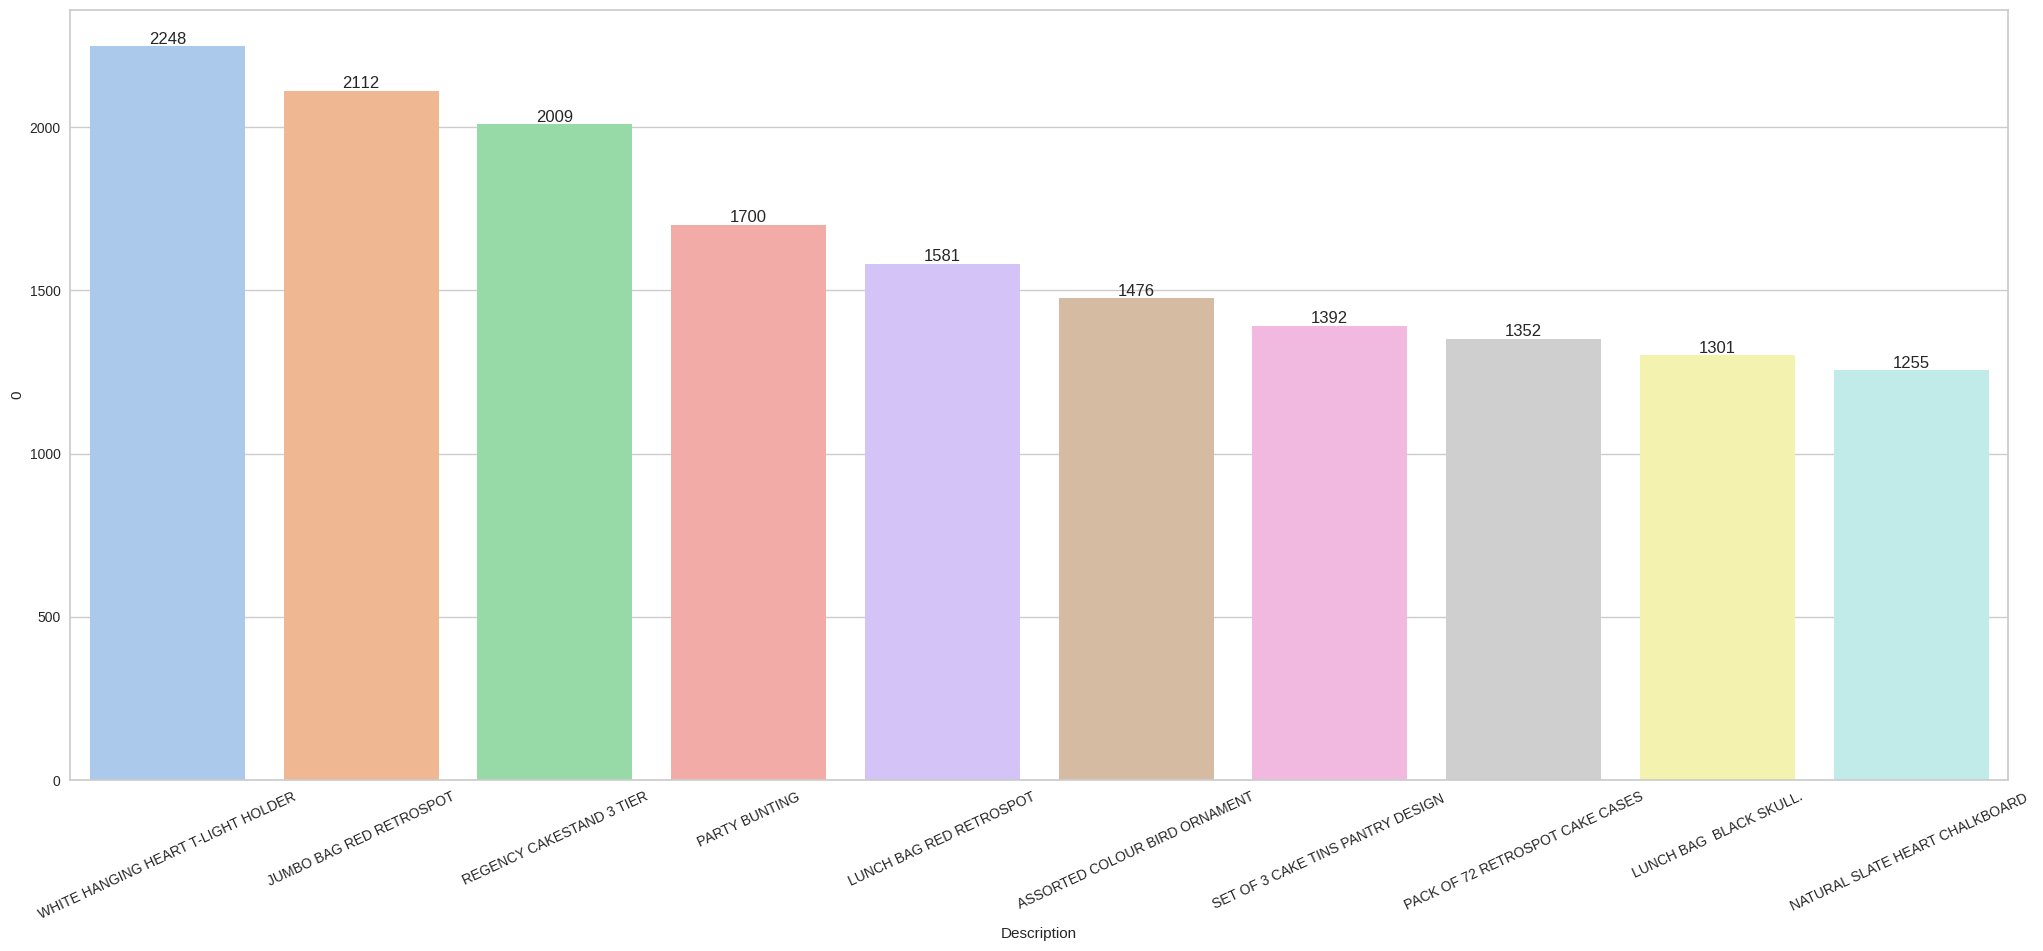

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=itemdf,x='Description',y=0, palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 25)
plt.show()

##### 1. Why did you pick the specific chart?

We use the bar plot to plot the top 10 products are sold most no. of times.

##### 2. What is/are the insight(s) found from the chart?

WHITE HANGING HEART T-LIGHT HOLDER is the product that has been sold most no. of times (2248 times) followed by JUMBO BAG RED RETROSPORT and REGENCY CAKESTAND 3 TIER. Only these 3 products have managed to be sold more than 2000 times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since these products are ordered ans sold most no. of times, the company needs to keep the availability of these product and so better inventory and better supply chain management is required for these products. 

#### Chart 13 - Top 10 Products with highest Unit price

In [ ]:
itemdf = delivered_df.groupby(['StockCode','Description']).agg({'UnitPrice':'mean'}).sort_values(by='UnitPrice',ascending=False).head(10).reset_index()
itemdf

StockCode                         Description    UnitPrice
0  AMAZONFEE                          AMAZON FEE  6880.545000
1      22502      PICNIC BASKET WICKER 60 PIECES   649.500000
2        DOT                      DOTCOM POSTAGE   291.311822
3          M                              Manual   229.415728
4      22827  RUSTIC  SEVENTEEN DRAWER SIDEBOARD   158.076923
5      22828        REGENCY MIRROR WITH SHUTTERS   156.428571
6      22656        VINTAGE BLUE KITCHEN CABINET   146.750000
7      22655         VINTAGE RED KITCHEN CABINET   143.421053
8      22823       CHEST NATURAL WOOD 20 DRAWERS   118.076923
9      22826       LOVE SEAT ANTIQUE WHITE METAL   114.024390

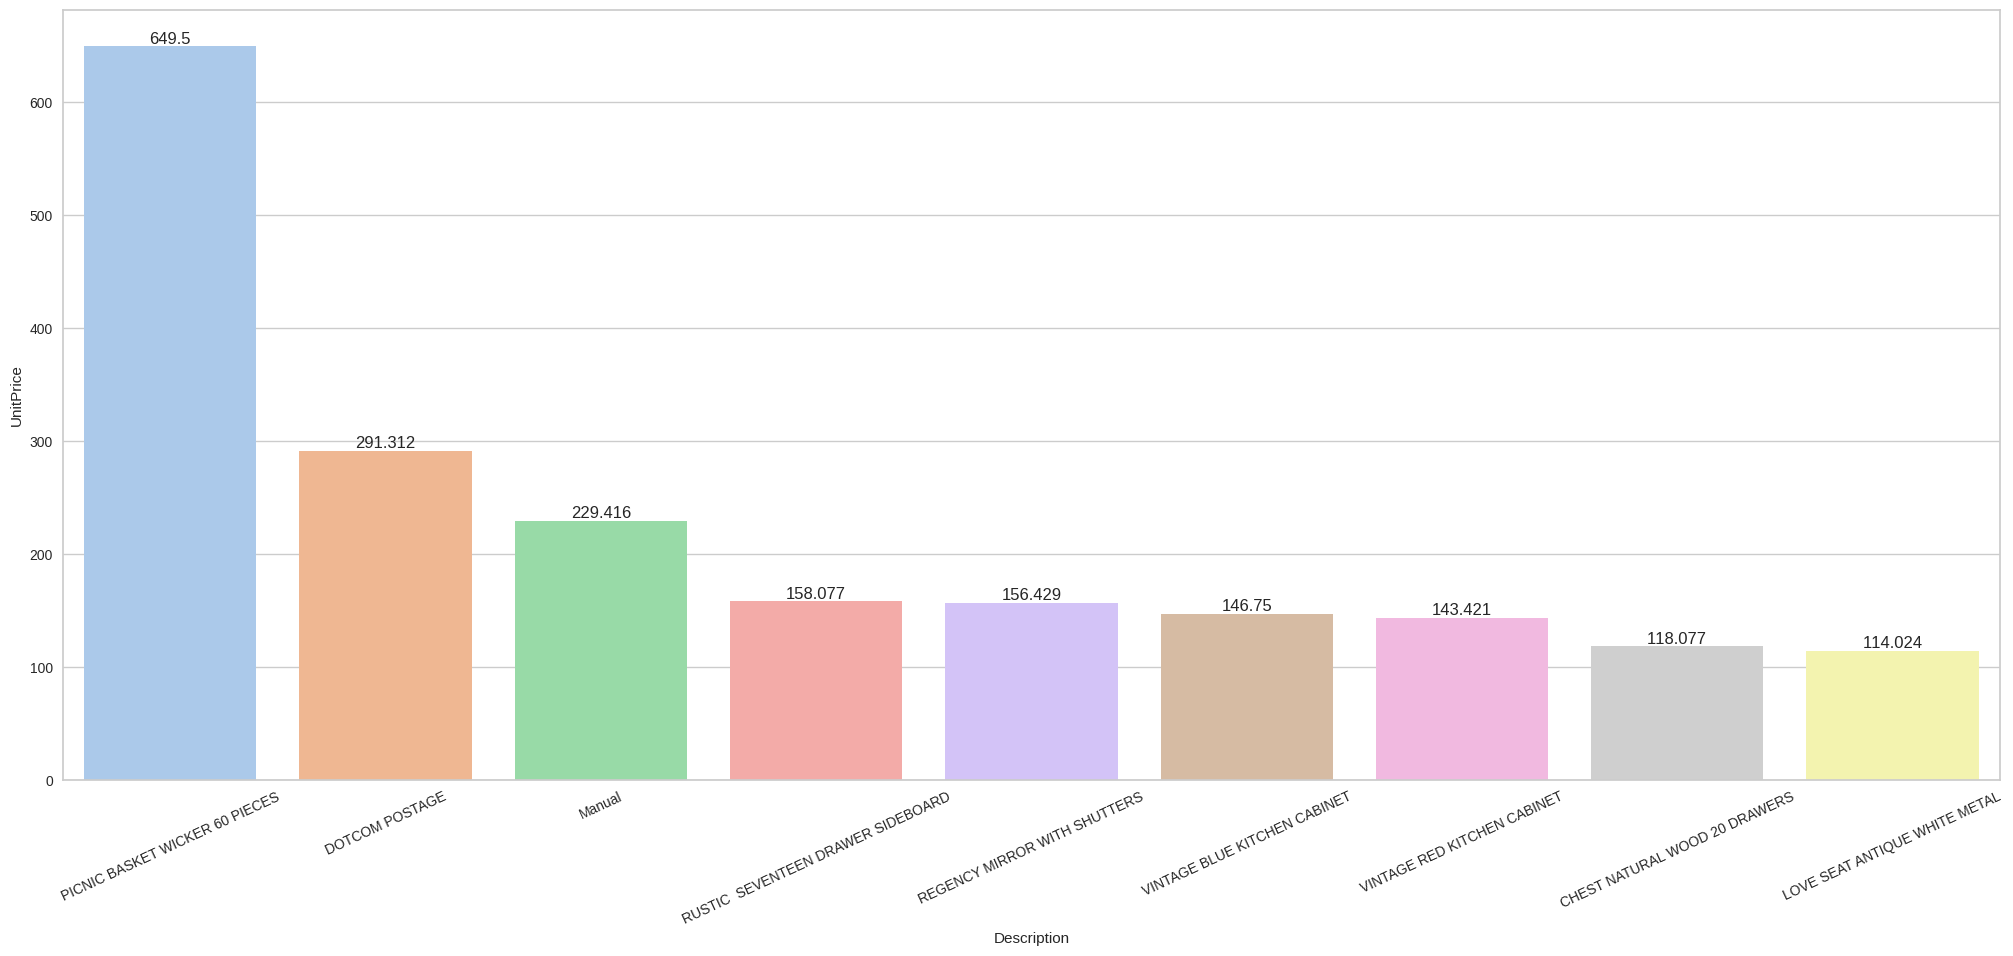

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=itemdf.iloc[1:,:],x='Description',y='UnitPrice', palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 25)
plt.show()

##### 1. Why did you pick the specific chart?

We use the bar plot to plot the top 10 products with highest Unit Price i.e. to plot the top 10 expensive products.

##### 2. What is/are the insight(s) found from the chart?

Ignoring the Postage and Manual Records, PICNIC BASKET WICKER 60 PIECES is the most expensive product with price £ 649.50. Other products are relatively less expensive as the 2nd most expensive product RUSTIC SEVENTEEN DRAWER SIDEBOARD costs £ 158.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company gets to know about its most expensive products. Anyhow, the company must have these data before so this plot won't be helping much.

#### Chart 14 - Top 10 customers with highest revenue spent

In [ ]:
itemdf = delivered_df.groupby(['CustomerID']).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10).reset_index()
itemdf

CustomerID     Amount
0     14646.0  280206.02
1     18102.0  259657.30
2     17450.0  194390.79
3     16446.0  168472.50
4     14911.0  143711.17
5     12415.0  124914.53
6     14156.0  117210.08
7     17511.0   91062.38
8     16029.0   80850.84
9     12346.0   77183.60

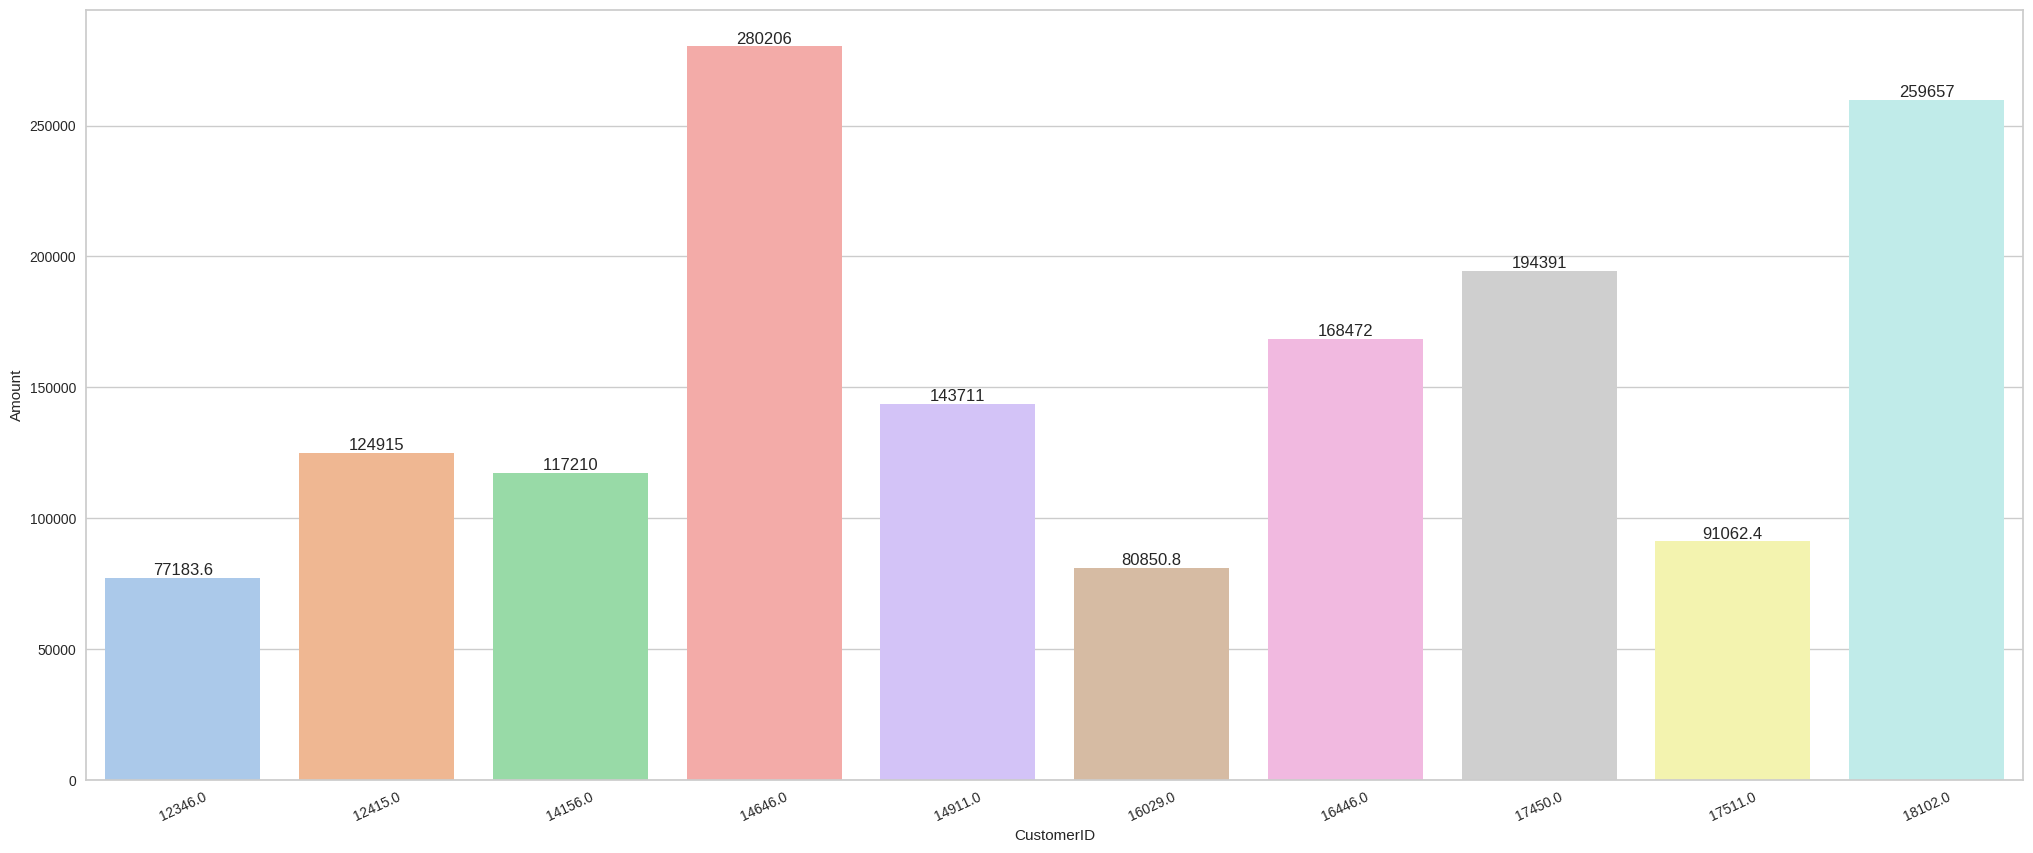

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=itemdf,x='CustomerID',y='Amount', palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 25)
plt.show()

##### 1. Why did you pick the specific chart?

We use the bar plot to plot the top 10 customers who have spent most amount in this period.

##### 2. What is/are the insight(s) found from the chart?

CustomerId 14646 has spent most amount (£ 280,206) and 2nd placed CustomerId 18102 has spent £ 259,657. Rest all customers have spent less than £ 200,000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since these are the customers who have spent most amount, they have the capacity to spend more amount in the future too. The company will treat these customers on top priority and should try to market these customers with more products.

#### Chart 15 - Top 10 customers with highest purchase frequency 

In [ ]:
itemdf = pd.DataFrame(cancel_df.groupby(['CustomerID']).size()).sort_values(by=0,ascending=False).head(10).reset_index()
itemdf

CustomerID    0
0     14911.0  226
1     17841.0  136
2     17511.0  113
3     15311.0  112
4     12607.0  101
5     14410.0   92
6     13798.0   89
7     14606.0   82
8     13113.0   79
9     12471.0   71

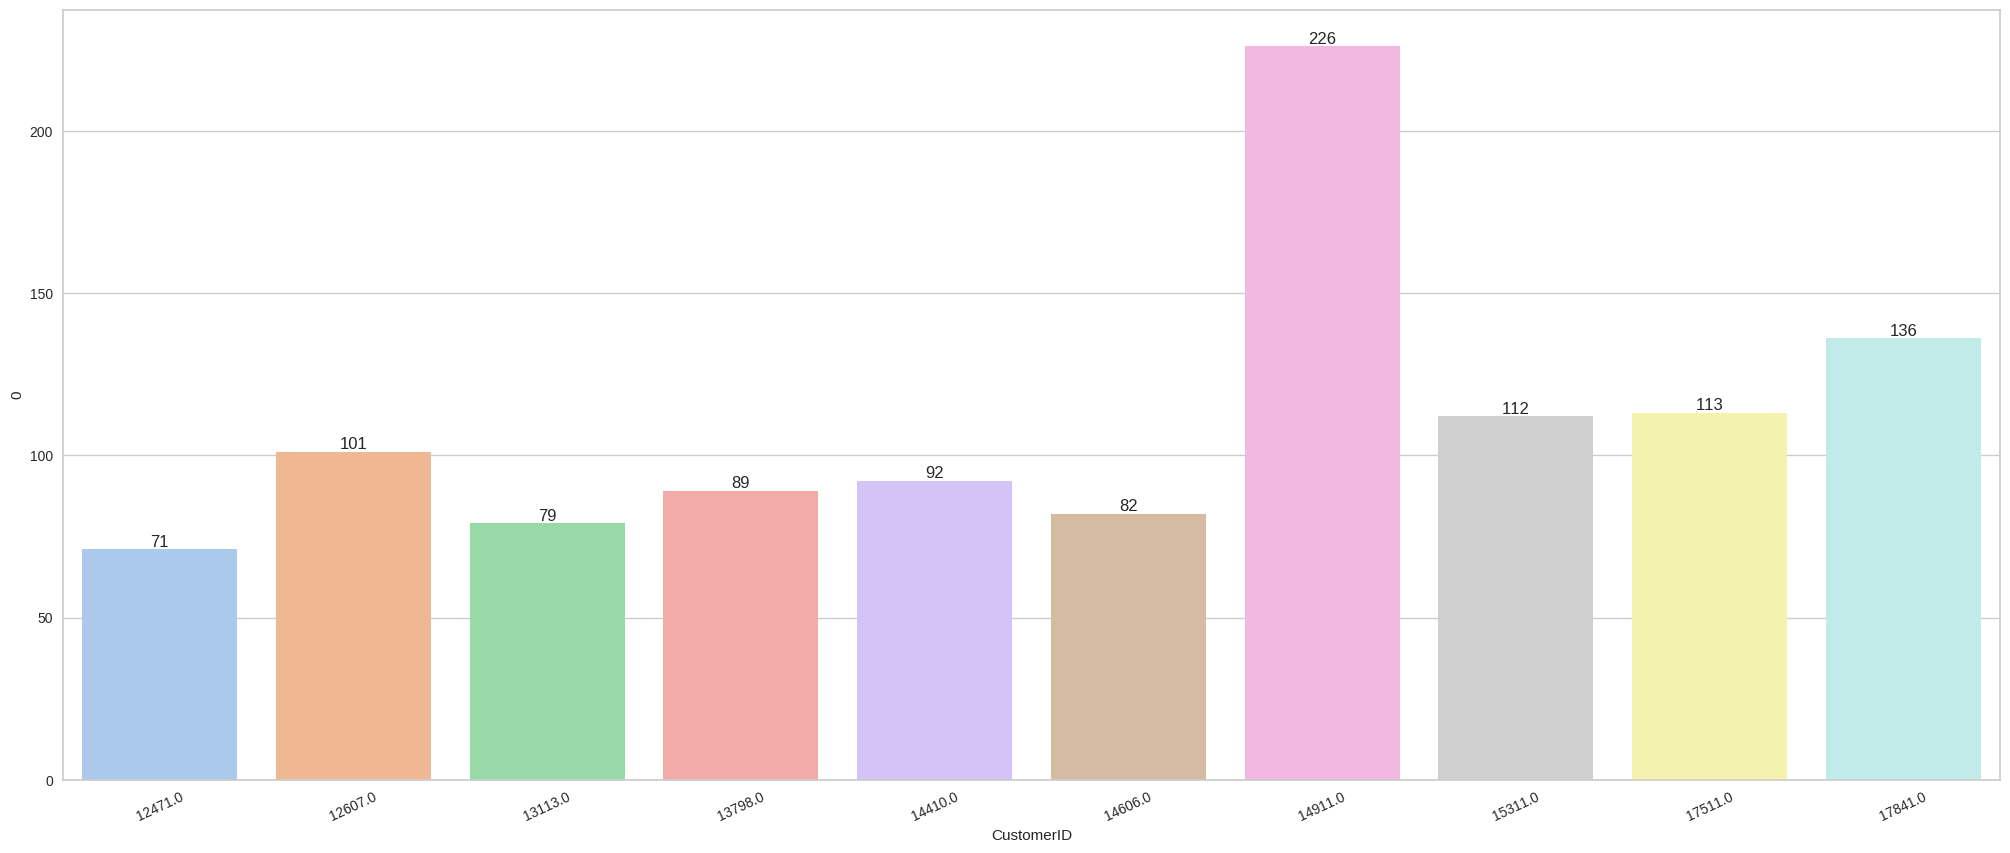

In [ ]:
plt.figure(figsize= (25,10))
ax=sns.barplot(data=itemdf,x='CustomerID',y=0, palette='pastel')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 25)
plt.show()

##### 1. Why did you pick the specific chart?

We use the bar plot to plot the top 10 customers who have purchased most no. of times.

##### 2. What is/are the insight(s) found from the chart?

CustomerID 14911 has made purchase 226 times which is way higher than 2nd placed CustomerID 17841 who has made purchase 136 times. Only 5 customers have made purchase for over 100 times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since these customers have purchased more often, frequent specialized discounts could be offered to them so that they make purchase again. However, this plot alone gives incomplete picture of the customers as this doesn't show how much money these customers have spent.

#### Chart 16 - Distribution of products with price more/less than £10

[]

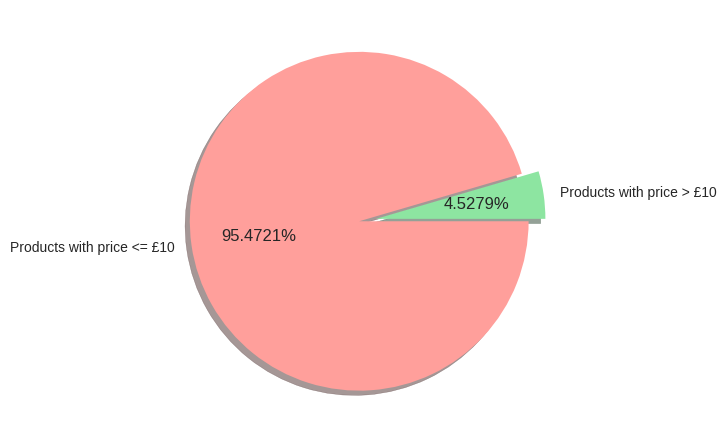

In [ ]:
plt.pie([delivered_df[delivered_df['UnitPrice']>10].shape[0],delivered_df[delivered_df['UnitPrice']<10].shape[0]], autopct='%.4f%%',
            colors=sns.color_palette('pastel')[2:4], labels=['Products with price > £10','Products with price <= £10'], shadow = True, explode=[0.1,0])
plt.plot()

##### 1. Why did you pick the specific chart?

A pie plot, also known as a pie chart, is a circular graph used to represent categorical data as slices of a pie. The entire circle represents the total or 100% of the data. Each slice of the pie is drawn with an angle proportional to the category's value or frequency. The larger the value or proportion, the larger the corresponding slice will be.

We use the pie chart to visualize the count of two groups: one with products of price more than £ 10 and another with products of price less than £ 10.

##### 2. What is/are the insight(s) found from the chart?

Less than 5% of the products sold have price more than £ 10. That means the company mainly deals with less expensive products.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can strategize whether to improve the selling of more than £ 10 products which could require an upfront cost of marketing and customer acquisition cost for those products or stick with the current plan of selling less expensive products and improve the sales of those products.

#### Chart 17 - Percentage of orders cancelled

[]

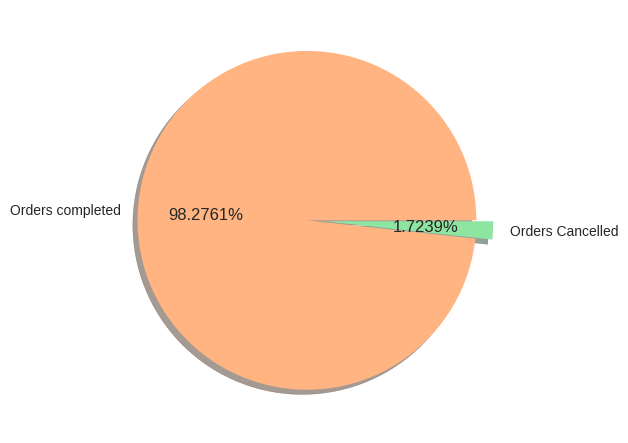

In [ ]:
plt.pie([delivered_df.shape[0],cancel_df.shape[0]], autopct='%.4f%%',
            colors=sns.color_palette('pastel')[1:3], labels=['Orders completed','Orders Cancelled'], shadow = True, explode=[0.1,0])
plt.plot()

##### 1. Why did you pick the specific chart?

We use the pie chart to plot the distribution of cancelled orders and delivered orders.

##### 2. What is/are the insight(s) found from the chart?

1.7239% of total orders have been cancelled which comes around 9000 orders that have been cancelled.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1.7239% may not seem a big number. However if the cancellations increase over the time, then it will be a cause of worry for the stakeholders. The company can implement taking the reason of cancellations from the customers and so would get the idea to reduce the cancellations.

#### Chart 18 - Boxplot for numeric values

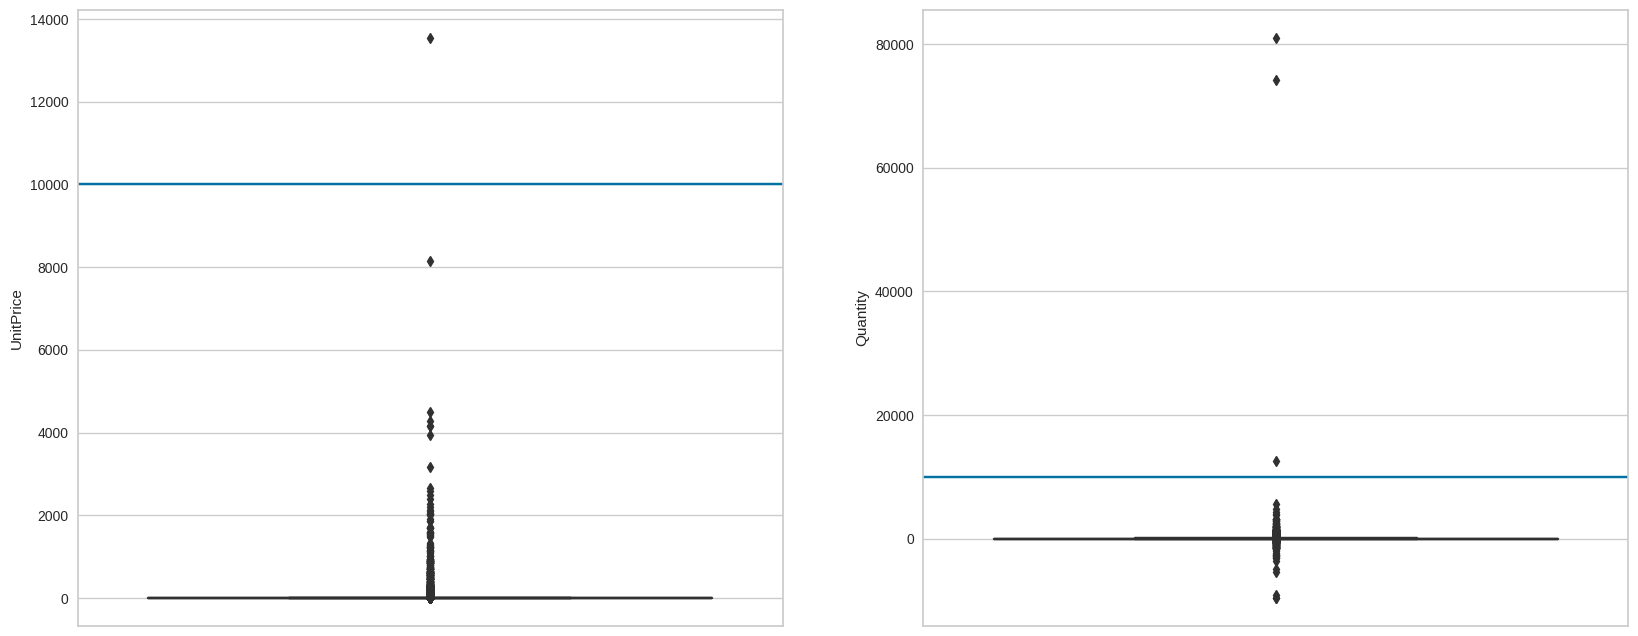

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(y="UnitPrice", data=delivered_df)
plt.axhline(y=10000)
plt.subplot(122)
sns.boxplot(y="Quantity", data=delivered_df)
plt.axhline(y=10000)
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is a standardized way of displaying the distribution of numerical data based on the five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. The boxplot visualizes the data by placing a box between the first and third quartiles, with a vertical line at the median. The whiskers extend from the box to the minimum and maximum values, with outliers plotted as individual points.

We use the boxplot to find the outliers in the numeric variables of the dataset namely Quantity and Unit Price. 

##### 2. What is/are the insight(s) found from the chart?

The first and third quartiles are at the same point for both variables meaning the data is highly concentrated. The points away from 3rd quartile shown are technically outliers but most of them are not spread so far. So we consider points more than 10000 as outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company gets to know about the outlier points in the numeric variables. They can plan to investigate into these transactions as these are anomalies in the dataset and high value transactions in the real world generally attracts negative attentions from the authorities.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

[Null Values were handled in Data Wrangling section](#scrollTo=q979Af4oaJzh&line=1&uniqifier=1)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have imputated the null values in the CustomerID column using all unique values. We calculated all the unique values using the index as a reference. First we found the max value of available CustomerID. Then we added the index of row to max value to create a unique value for CustomerID. Replacing null values with unique index-based identifiers helps to maintain the integrity of the dataset, as it ensures that no two records share the same identifier. Additionally, this approach allows for consistent data handling and avoids the loss of information associated with null values.

### 2. Handling Outliers

In [ ]:
delivered_df[delivered_df['Quantity']>10000]

InvoiceNo StockCode                     Description  Quantity  \
61006     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
497394    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   
535160    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country    Amount  \
61006  2011-01-18 10:01:00       1.04     12346.0  United Kingdom   77183.6   
497394 2011-11-25 15:57:00       0.00     13256.0  United Kingdom       0.0   
535160 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  168469.6   

           Month Day of Week      Time  
61006    January     Tuesday  10:01:00  
497394  November      Friday  15:57:00  
535160  December      Friday  09:15:00

In [ ]:
delivered_df[delivered_df['UnitPrice']>10000]

InvoiceNo  StockCode Description  Quantity         InvoiceDate  \
14757    537632  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:08:00   

       UnitPrice  CustomerID         Country    Amount     Month Day of Week  \
14757   13541.33     18394.0  United Kingdom  13541.33  December     Tuesday   

           Time  
14757  15:08:00

In [ ]:
delivered_df = delivered_df[delivered_df['Quantity']<10000]
delivered_df = delivered_df[delivered_df['UnitPrice']<10000]
delivered_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
536636    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
536637    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
536638    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
536639    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
536640    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Amount  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
...                    ...        ...         ...             ...     ...   
536636 2011-12-09 12:50:00       0.85     12680.0          France   10.20   
536637 2011-12-09 12:50:00       2.10     12680.0          France   12.60   
536638 2011-12-09 12:50:00       4.15     12680.0          France   16.60   
536639 2011-12-09 12:50:00       4.15     12680.0          France   16.60   
536640 2011-12-09 12:50:00       4.95     12680.0          France   14.85   

           Month Day of Week      Time  
0       December   Wednesday  08:26:00  
1       December   Wednesday  08:26:00  
2       December   Wednesday  08:26:00  
3       December   Wednesday  08:26:00  
4       December   Wednesday  08:26:00  
...          ...         ...       ...  
536636  December      Friday  12:50:00  
536637  December      Friday  12:50:00  
536638  December      Friday  12:50:00  
536639  December      Friday  12:50:00  
536640  December      Friday  12:50:00  

[527383 rows x 12 columns]

##### What all outlier treatment techniques have you used and why did you use those techniques?

In Data Visualization Section, we saw the distribution of numeric variables of Quantity and UnitPrice using boxplot and decided to consider values above 10000 as outliers. We check here these transactions and found 1 item AMAZON FEE as outlier in UnitPrice variable. Since this is not a product and most probably the Fees paid to Amazon for hosting the products on its platform, we remove the row. In Quantity variable, we find 3 rowsa having value more than 10000, so we remove these rows.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since we would be creating a new dataframe from our data using the RFM (Recency, Frequency and Monetary) analysis and use that to cluster the customers, there is no need for categorical encoding

### 4. Feature Manipulation & Selection

In this section, we would be manipulating the features and variables of dataset to create a new dataset by RFM analysis and use that dataframe for clustering using the unsupervised learning algorithms.

### *** Recency Frequency Monetary (RFM) Analysis***

RFM analysis is a marketing strategy that helps businesses segment their customers based on their Recency, Frequency, and Monetary Value (RFM) scores.

Recency refers to how recently a customer has made a purchase. Customers who have made a purchase recently are more likely to be interested in making another purchase in the near future.

Frequency refers to how often a customer makes a purchase. Customers who make purchases more often are more likely to be loyal to a brand.

Monetary value refers to how much money a customer spends on a brand. Customers who spend more money are more valuable to a brand.

RFM scores are calculated by assigning a value to each customer based on their purchase history.

Recency: This is the number of days since the customer's last purchase.

Frequency: This is the number of times the customer has purchased from the business in a given period of time.

Monetary Value: This is the total amount of money the customer has spent with the business in a given period of time.

In [ ]:
# Calculate Recency, Frequency, and Monetary values for each customer
today = pd.to_datetime("2011-12-10")  # Set the reference date as one day after the last transaction date
rfm_data = delivered_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (today - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "Amount": "sum"  # Monetary
})

# Rename the columns
rfm_data.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "Amount": "Monetary"
}, inplace=True)

# Print the RFM data
rfm_data

Recency  Frequency  Monetary
CustomerID                              
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          18          1   1757.55
12350.0         310          1    334.40
12352.0          36          8   2506.04
...             ...        ...       ...
21993.0           1          1      3.35
21994.0           1          1   6637.59
21995.0           0          1   7689.23
21996.0           0          1   3217.20
21997.0           0          1   5664.89

[7861 rows x 3 columns]

In [ ]:
rfm_data.describe()

Recency    Frequency       Monetary
count  7861.000000  7861.000000    7861.000000
mean    131.955604     2.805877    1319.406464
std     113.391197     5.951263    6504.238864
min       0.000000     1.000000       0.000000
25%      29.000000     1.000000       0.000000
50%      95.000000     1.000000     321.920000
75%     226.000000     3.000000    1143.600000
max     373.000000   210.000000  280206.020000

In [ ]:
# checking the quantiles to create segments
rfm_quant = rfm_data.quantile(q=[0.25,0.5,0.75],interpolation='nearest')
rfm_quant

Recency  Frequency  Monetary
0.25       29          1      0.00
0.50       95          1    321.92
0.75      226          3   1143.60

In [ ]:
# deciding the criteria for creating segments
rfm_criteria = {
    "Recency": [rfm_data['Recency'].min(),56, 162, 289,rfm_data['Recency'].max()],
    "Frequency": [0,1,rfm_data['Frequency'].max()],
    "Monetary": [rfm_data['Monetary'].min(),2.49, 4.96, 11.58,rfm_data['Monetary'].max()]
}

# Create the RFM segments
rfm_segments = pd.DataFrame()
rfm_segments['Recency_score'] = pd.cut(rfm_data['Recency'], bins=rfm_criteria['Recency'], labels=[4,3,2,1],include_lowest=True)
rfm_segments['Frequency_score'] = pd.cut(rfm_data['Frequency'], bins=rfm_criteria['Frequency'], labels=[1,2],include_lowest=True)
rfm_segments['Monetary_score'] = pd.cut(rfm_data['Monetary'], bins=rfm_criteria['Monetary'], labels=[1,2,3,4],include_lowest=True)

# Concatenate the RFM segments to the original RFM data
rfm_data = pd.concat([rfm_data, rfm_segments], axis=1)
rfm_data

Recency  Frequency  Monetary Recency_score Frequency_score  \
CustomerID                                                               
12347.0           2          7   4310.00             4               2   
12348.0          75          4   1797.24             3               2   
12349.0          18          1   1757.55             4               1   
12350.0         310          1    334.40             1               1   
12352.0          36          8   2506.04             4               2   
...             ...        ...       ...           ...             ...   
21993.0           1          1      3.35             4               1   
21994.0           1          1   6637.59             4               1   
21995.0           0          1   7689.23             4               1   
21996.0           0          1   3217.20             4               1   
21997.0           0          1   5664.89             4               1   

           Monetary_score  
CustomerID                 
12347.0                 4  
12348.0                 4  
12349.0                 4  
12350.0                 4  
12352.0                 4  
...                   ...  
21993.0                 2  
21994.0                 4  
21995.0                 4  
21996.0                 4  
21997.0                 4  

[7861 rows x 6 columns]

If Monetary value is high, means customer has spend more. So higher the monetary value, better/higher the segmentation class.

If Frequency value is high, means customer has made purchase frequently. So higher the Frequency value, better/higher the segmentation class.

If Recency value is high, means customer has made purchase long ago. So higher the Recency value, better the segmentation class. 

We calculate RFM scores on a scale of 1 to 4, with 1 being the lowest value and 4 being the highest value based on the 4 segments created.

In [ ]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7861 entries, 12347.0 to 21997.0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          7861 non-null   int64   
 1   Frequency        7861 non-null   int64   
 2   Monetary         7861 non-null   float64 
 3   Recency_score    7861 non-null   category
 4   Frequency_score  7861 non-null   category
 5   Monetary_score   7861 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 269.2 KB


The combined RFM score is obtained by combining the three scores. We use the weighted scoring system to calculate the combined RFM score, where we assign different levels of importance to each variable. Weights can be applied equally or we can provide specific weights for each parameter based on domain knowledge or business inputs. Here we are giving more importance to Frequency and Monetary. We assign 0.2 weight to Recency, 0.5 weight to Frequency and 0.5 weight to Monetary.

In [ ]:
rfm_data['RFM Score'] = (rfm_data['Recency_score']).astype('float')*0.2 + (rfm_data['Frequency_score']).astype('float')*0.3 + (rfm_data['Monetary_score']).astype('float')*0.5
rfm_data['RFM Group'] = (rfm_data['Recency_score']).astype('string') + (rfm_data['Frequency_score']).astype('string') + (rfm_data['Monetary_score']).astype('string')
rfm_data

Recency  Frequency  Monetary Recency_score Frequency_score  \
CustomerID                                                               
12347.0           2          7   4310.00             4               2   
12348.0          75          4   1797.24             3               2   
12349.0          18          1   1757.55             4               1   
12350.0         310          1    334.40             1               1   
12352.0          36          8   2506.04             4               2   
...             ...        ...       ...           ...             ...   
21993.0           1          1      3.35             4               1   
21994.0           1          1   6637.59             4               1   
21995.0           0          1   7689.23             4               1   
21996.0           0          1   3217.20             4               1   
21997.0           0          1   5664.89             4               1   

           Monetary_score  RFM Score RFM Group  
CustomerID                                      
12347.0                 4        3.4       424  
12348.0                 4        3.2       324  
12349.0                 4        3.1       414  
12350.0                 4        2.5       114  
12352.0                 4        3.4       424  
...                   ...        ...       ...  
21993.0                 2        2.1       412  
21994.0                 4        3.1       414  
21995.0                 4        3.1       414  
21996.0                 4        3.1       414  
21997.0                 4        3.1       414  

[7861 rows x 8 columns]

In [ ]:
rfm_data['RFM Group'].unique()

<StringArray>
['424', '324', '414', '114', '214', '124', '314', '224', '313', '212', '423',
 '112', '111', '113', '211', '213', '311', '312', '411', '412', '413']
Length: 21, dtype: string

In [ ]:
rfm_data['RFM Score'].unique()

array([3.4, 3.2, 3.1, 2.5, 2.7, 2.8, 2.9, 3. , 2.4, 1.7, 2.9, 1.5, 1. ,
       2. , 1.2, 2.2, 1.4, 1.9, 1.6, 2.1, 2.6])

In [ ]:
pd.DataFrame(rfm_data['RFM Group'].value_counts()).sort_index()

RFM Group
111        347
112         23
113         36
114        520
124         46
211        807
212         28
213         45
214        844
224        249
311        561
312         15
313         36
314        698
324        666
411        435
412         14
413         33
414        575
423          1
424       1882

Based on the RFM scores we can separate the customers into different no. of segments. We create 3 segments of customers here:

High-value customers: These are customers who have recently purchased from the business, have purchased frequently, and have spent a lot of money.

Medium-value customers: These are customers who have not purchased recently, but have purchased frequently and have spent good amount of money.

Low-value customers: These are customers who have not purchased recently, have not purchased frequently, and have not spent a lot of money.

In [ ]:
# Create three clusters
rfm_data["RFM_cluster"] = pd.qcut(rfm_data["RFM Score"], 3, labels=["Low", "Medium", "High"])

# Print the results
pd.DataFrame(rfm_data['RFM_cluster'].value_counts()).sort_index()

RFM_cluster
Low            2867
Medium         2446
High           2548

All 3 segments have around the same no. of customers, with Low segment having a little more than other segments. However this is just a preliminary clustering. Later we would be using Unsupervised learning models for clustering on same RFM data.

##### What all feature selection methods have you used  and why?

We have performed the RFM analysis to create the RFM data and we would use this data to train out clustering algorithms.

If we wanted to segment customers based on other factors, such as their demographics or interests, then we would have trained the clustering algorithm with the raw data. However, most of the data is from the UK and there is not much data in the dataset apart from the purchase history. So we use RFM data to train our model.

#### Outlier removal

The RFM data is the dataset that will be used for fitting the model and it will be having outliers so we remove them using boxplot.

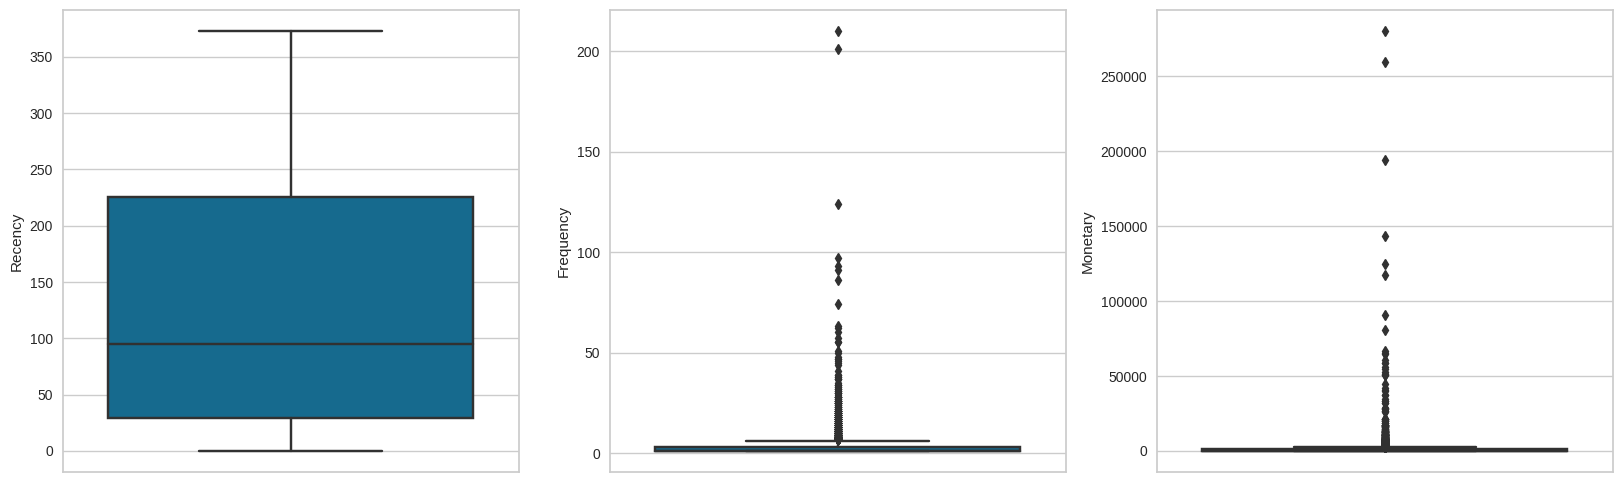

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.boxplot(data = rfm_data,y='Recency')
plt.subplot(132)
sns.boxplot(data = rfm_data,y='Frequency')
plt.subplot(133)
sns.boxplot(data = rfm_data,y='Monetary')
plt.show()

In [ ]:
rfm_data = rfm_data[rfm_data['Frequency']<100]
rfm_data = rfm_data[rfm_data['Monetary']<10000]

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Feature transformation refers to the process of transforming the original features or variables of a dataset into a new set of features that may be more suitable for analysis or modeling. The goal of feature transformation is to improve the quality and relevance of the features used in modeling, while preserving the underlying information in the original data.

Some situations in which data transformation may be beneficial include:
1. When the data is highly skewed
2. When the data has outliers
3. When the relationship between the variables is non-linear


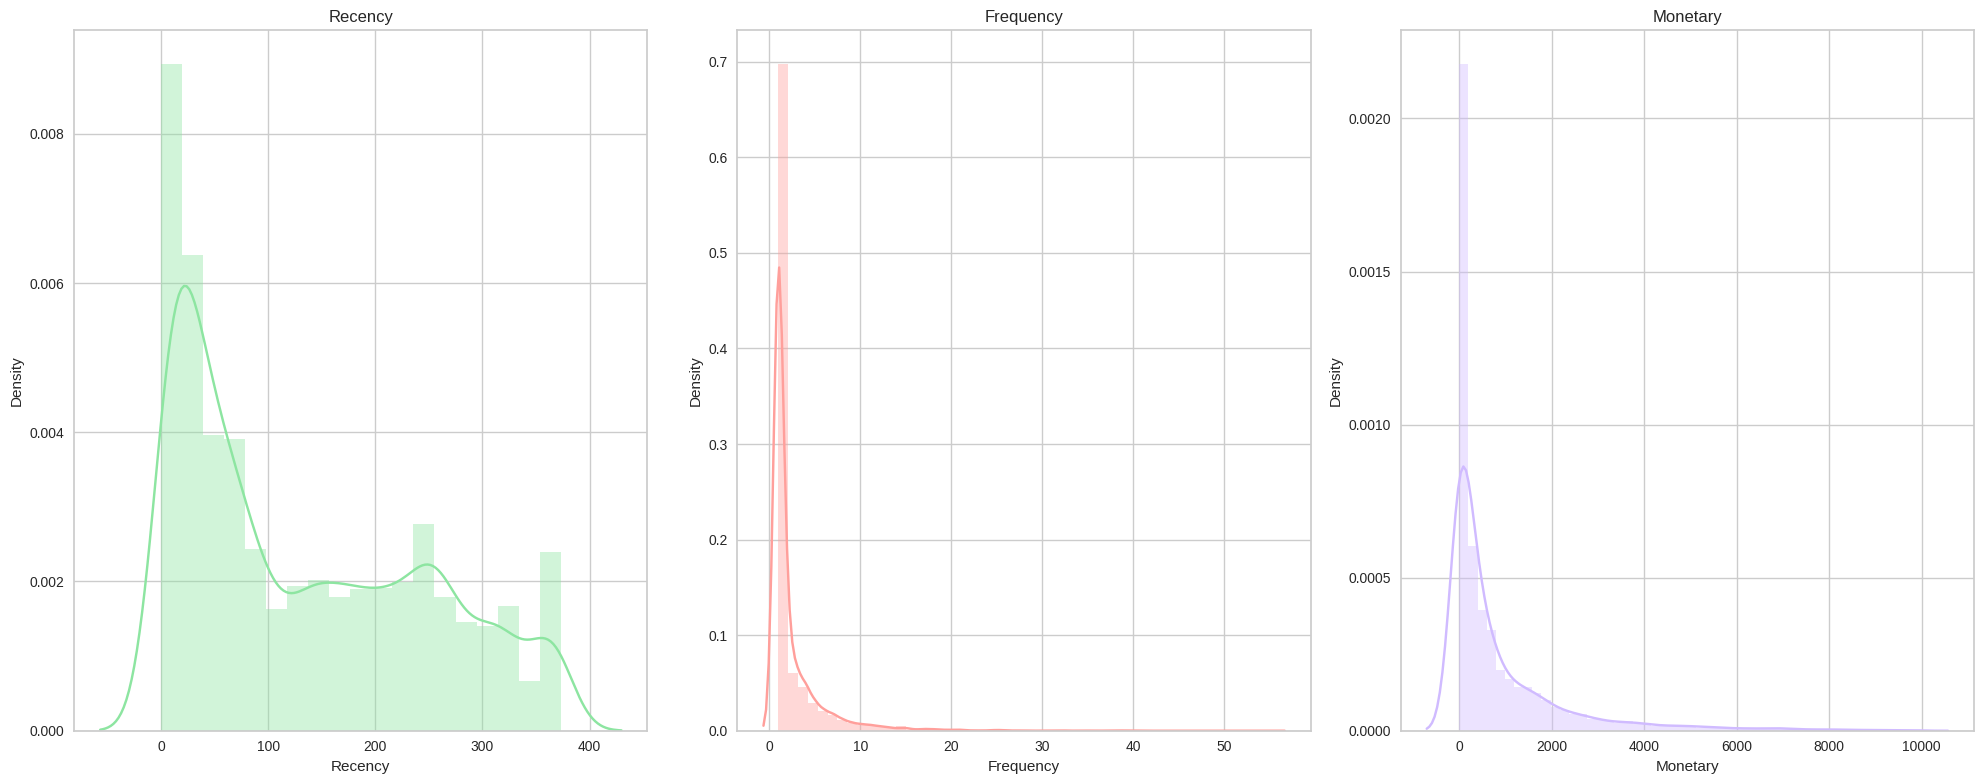

In [ ]:
#Columns to analyse distribution
cols = ['Recency', 'Frequency',	'Monetary']

plt.figure(figsize=(20,8))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_data[col], color = sns.color_palette('pastel')[n+2])
  plt.title(col.title())
  plt.tight_layout()

In the distribution of Recency, Frequency and Monetary scores, we can see the Recency distribution is right skewed and Frequency and Monetary distributions are too much concentrated around a single point. So to reduce right skewness we use log transformation on Recency distribution and to spread the data and reduce concentration at one point, we use Power transformation on Frequency and Monetary distribution.

A log transformation can often help to make skewed data more symmetrical. By applying a logarithmic function, the values of extreme outliers or large data points are compressed, resulting in a more symmetric distribution.

Power transformation can help to increase the spread of the data by adjusting the distribution of data by compressing or expanding the values based on the chosen power.

In [ ]:
rfm_data['TF_Recency']   = rfm_data['Recency'].apply(np.log1p)
rfm_data['TF_Frequency'] = rfm_data['Frequency']**0.5
rfm_data['TF_Monetary']  = rfm_data['Monetary']**0.5

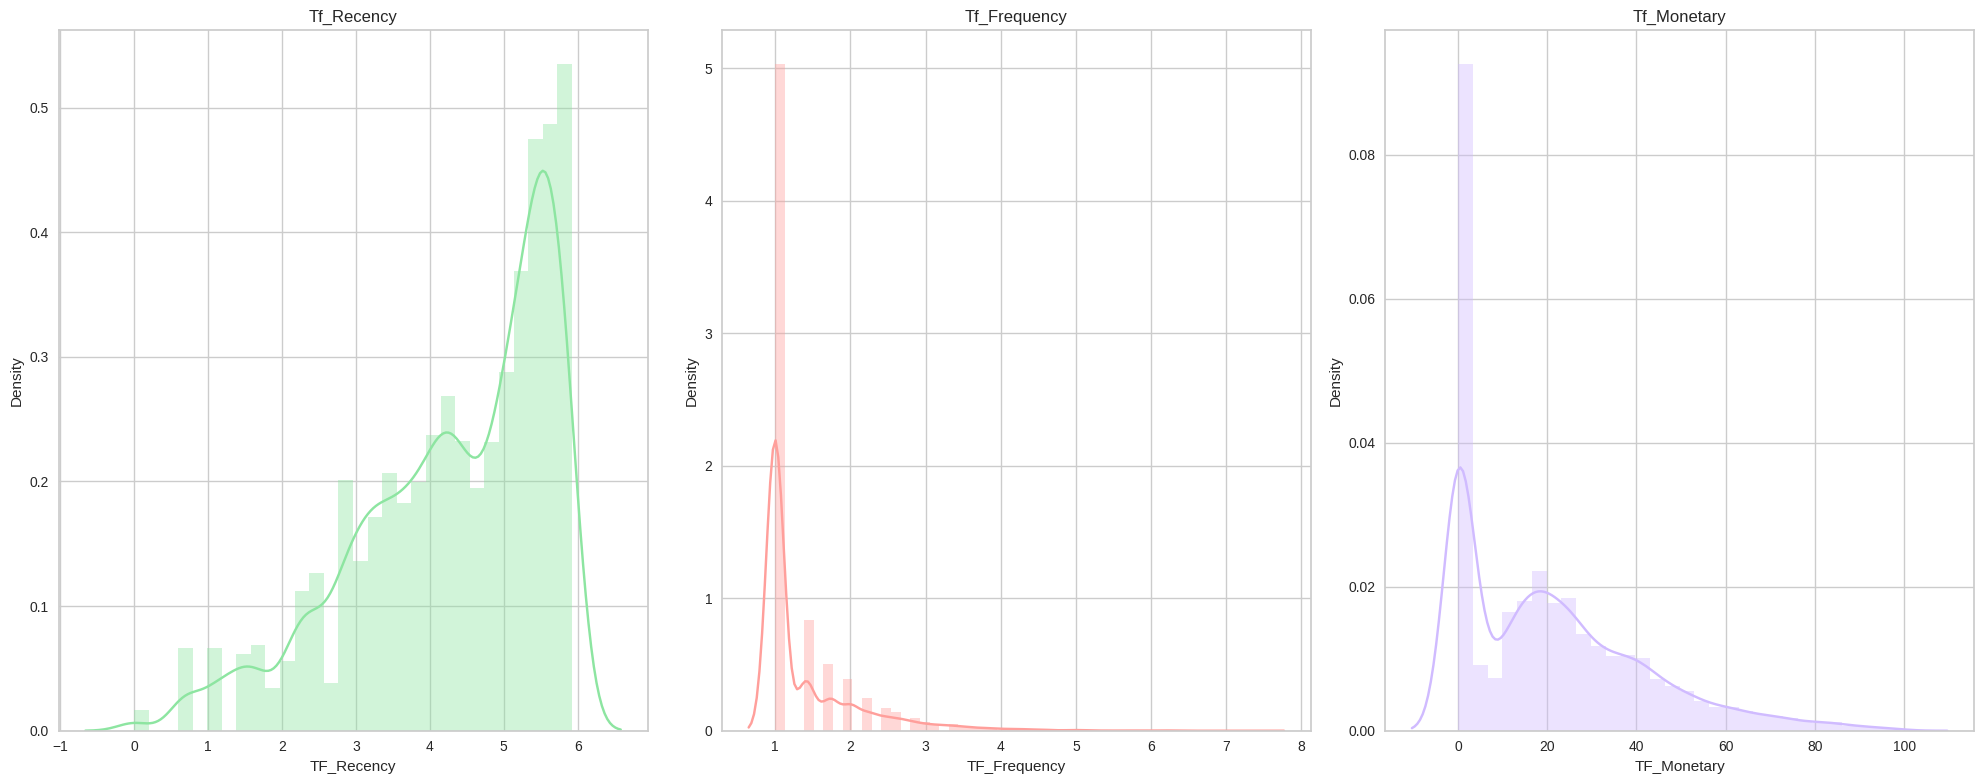

In [ ]:
cols = ['TF_Recency', 'TF_Frequency',	'TF_Monetary']

plt.figure(figsize=(20,8))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_data[col], color = sns.color_palette('pastel')[n+2])
  plt.title(col.title())
  plt.tight_layout()

The log transformation on Recency distribution introduced left skewness so we use power transformation again to reduce the skewness.

In [ ]:
rfm_data['TF_Recency'] = np.power(rfm_data['TF_Recency'],1/3)

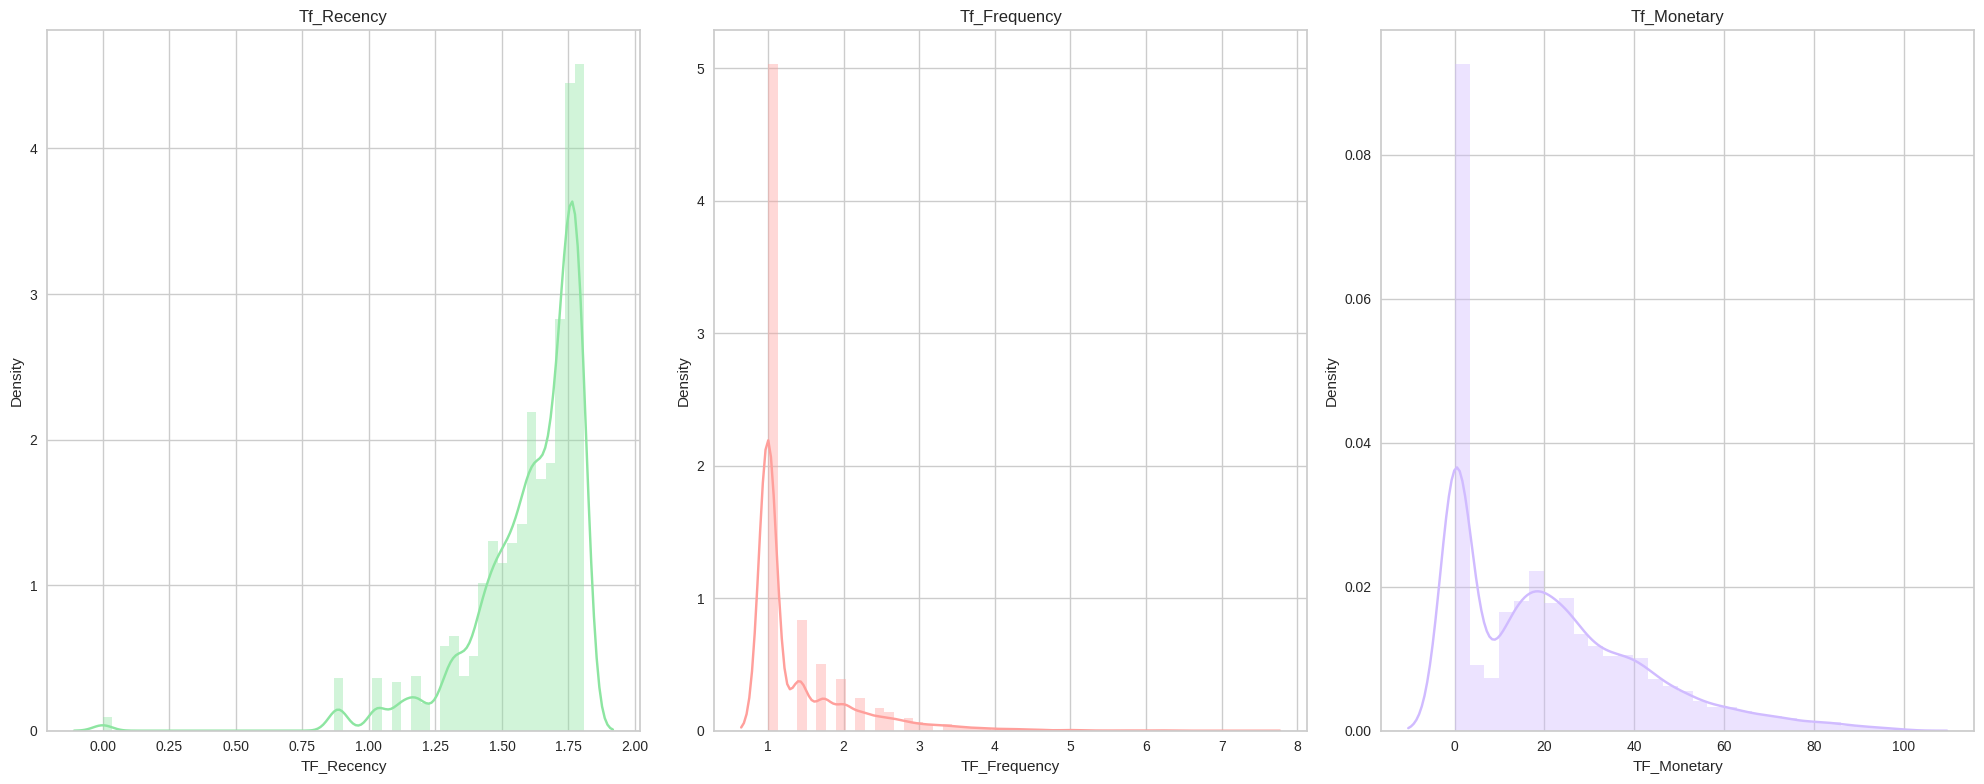

In [ ]:
cols = ['TF_Recency', 'TF_Frequency',	'TF_Monetary']

plt.figure(figsize=(20,8))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_data[col], color = sns.color_palette('pastel')[n+2])
  plt.title(col.title())
  plt.tight_layout()

Now the data distribution for all 3 variables look better and not skewed.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

At first, we found out the RFM scores, then calculated the combined RFM score and also the RFM group. Then we transformed the RFM scores to make it closer to normal distribution. So other than the transformed scores, we won't be needing any other variables which we can remove.

In [ ]:
rfm_data

Recency  Frequency  Monetary Recency_score Frequency_score  \
CustomerID                                                               
12347.0           2          7   4310.00             4               2   
12348.0          75          4   1797.24             3               2   
12349.0          18          1   1757.55             4               1   
12350.0         310          1    334.40             1               1   
12352.0          36          8   2506.04             4               2   
...             ...        ...       ...           ...             ...   
21993.0           1          1      3.35             4               1   
21994.0           1          1   6637.59             4               1   
21995.0           0          1   7689.23             4               1   
21996.0           0          1   3217.20             4               1   
21997.0           0          1   5664.89             4               1   

           Monetary_score  RFM Score RFM Group RFM_cluster  TF_Recency  \
CustomerID                                                               
12347.0                 4        3.4       424        High    1.031846   
12348.0                 4        3.2       324        High    1.629998   
12349.0                 4        3.1       414      Medium    1.433290   
12350.0                 4        2.5       114         Low    1.790463   
12352.0                 4        3.4       424        High    1.534167   
...                   ...        ...       ...         ...         ...   
21993.0                 2        2.1       412         Low    0.884997   
21994.0                 4        3.1       414      Medium    0.884997   
21995.0                 4        3.1       414      Medium    0.000000   
21996.0                 4        3.1       414      Medium    0.000000   
21997.0                 4        3.1       414      Medium    0.000000   

            TF_Frequency  TF_Monetary  
CustomerID                             
12347.0         2.645751    65.650590  
12348.0         2.000000    42.393867  
12349.0         1.000000    41.923144  
12350.0         1.000000    18.286607  
12352.0         2.828427    50.060364  
...                  ...          ...  
21993.0         1.000000     1.830301  
21994.0         1.000000    81.471406  
21995.0         1.000000    87.688255  
21996.0         1.000000    56.720367  
21997.0         1.000000    75.265464  

[7749 rows x 12 columns]

In [ ]:
rfm_data2 = rfm_data[["TF_Recency",'TF_Frequency','TF_Monetary']]
rfm_data2.reset_index(inplace=True)
rfm_data2

CustomerID  TF_Recency  TF_Frequency  TF_Monetary
0        12347.0    1.031846      2.645751    65.650590
1        12348.0    1.629998      2.000000    42.393867
2        12349.0    1.433290      1.000000    41.923144
3        12350.0    1.790463      1.000000    18.286607
4        12352.0    1.534167      2.828427    50.060364
...          ...         ...           ...          ...
7744     21993.0    0.884997      1.000000     1.830301
7745     21994.0    0.884997      1.000000    81.471406
7746     21995.0    0.000000      1.000000    87.688255
7747     21996.0    0.000000      1.000000    56.720367
7748     21997.0    0.000000      1.000000    75.265464

[7749 rows x 4 columns]

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have already done feature manipulation and feature selection in RFM Analysis section. So we would be using the transformed 3 variables of Recency, Frequency and Monetary. So we drop all other columns of RFM groups and RFM scores. There is no complex dimensionality techniques used here.

### 7. Data Scaling

In [ ]:
# Scaling our data using standard scaling
sc = StandardScaler()
X = sc.fit_transform(rfm_data2[['TF_Recency','TF_Frequency','TF_Monetary']])
X

array([[-2.65839759,  1.77918345,  2.15811679],
       [ 0.12955938,  0.86265809,  1.03289688],
       [-0.78728578, -0.55665822,  1.01012207],
       ...,
       [-7.46777658, -0.55665822,  3.22435553],
       [-7.46777658, -0.55665822,  1.72604967],
       [-7.46777658, -0.55665822,  2.62330902]])

In [ ]:
# creating X which will be the data to which our model fits
X = pd.DataFrame(X,columns=['Recency_std','Frequency_std','Monetary_std'])
X['CustomerID'] = rfm_data2['CustomerID']
X

Recency_std  Frequency_std  Monetary_std  CustomerID
0       -2.658398       1.779183      2.158117     12347.0
1        0.129559       0.862658      1.032897     12348.0
2       -0.787286      -0.556658      1.010122     12349.0
3        0.877478      -0.556658     -0.133474     12350.0
4       -0.317107       2.038458      1.403822     12352.0
...           ...            ...           ...         ...
7744    -3.342852      -0.556658     -0.929673     21993.0
7745    -3.342852      -0.556658      2.923568     21994.0
7746    -7.467777      -0.556658      3.224356     21995.0
7747    -7.467777      -0.556658      1.726050     21996.0
7748    -7.467777      -0.556658      2.623309     21997.0

[7749 rows x 4 columns]

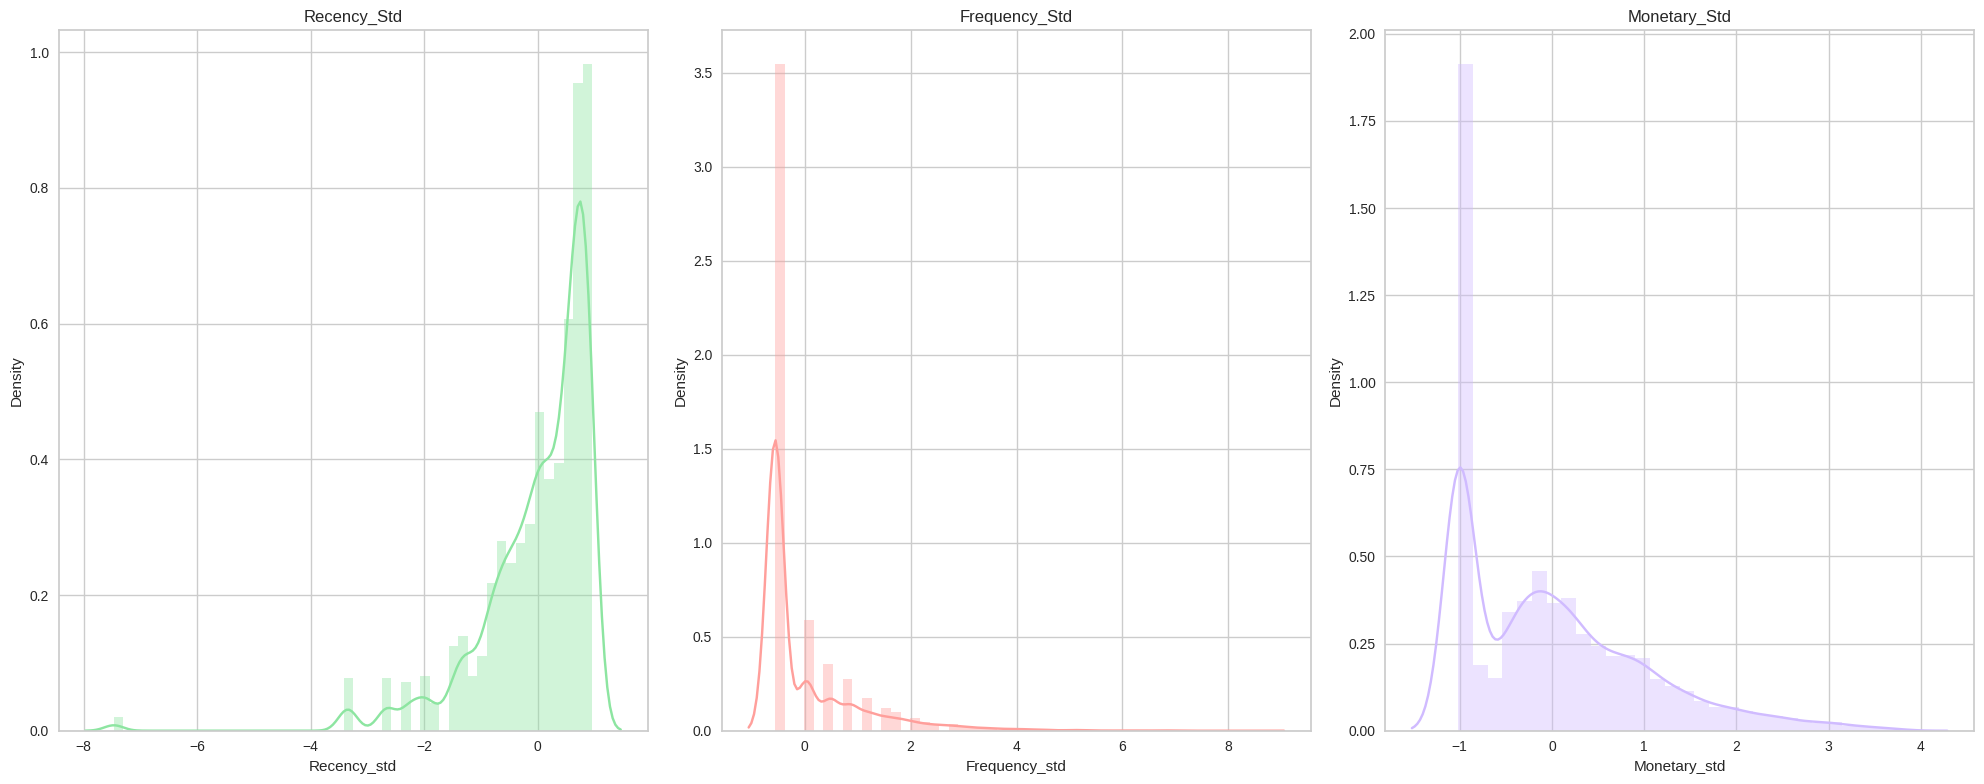

In [ ]:
cols = ['Recency_std','Frequency_std','Monetary_std']

plt.figure(figsize=(20,8))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(X[col], color = sns.color_palette('pastel')[n+2])
  plt.title(col.title())
  plt.tight_layout()

##### Which method have you used to scale you data and why?

We have used standard scaling to scale our data. Standard scaling is used in machine learning to transform features so that they have a mean of 0 and a standard deviation of 1. 

Since many machine learning algorithms are sensitive to the scale of the features and when features have different scales, it can be difficult to compare them. Standard scaling can help to equalize the range of values for all features, which can lead to improved performance of machine learning algorithms and make features more comparable by transforming them to a common scale.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Data splitting is not required for unsupervised learning algorithms. In fact, it is not possible to split data in the traditional sense for unsupervised learning, because there are no labels to distinguish between training and testing data.

Unsupervised learning algorithms are typically trained on the entire dataset. This is because the goal of unsupervised learning is to find patterns in the data, and the more data the algorithm has to work with, the better it will be able to find these patterns.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced datasets are typically not considered a problem in unsupervised learning because unsupervised learning techniques do not rely on class labels or target variables. Unsupervised learning focuses on finding patterns, structures, or relationships within the data without the need for predefined classes or labels.

In [ ]:
# Handling Imbalanced Dataset (If needed)

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is a significant difference in average monetary value spent by customer based in the United Kingdom and in other countries.

2. The daily average sale during the holiday season (October, November and December) is more than the daily average sale for the rest of the year.

3. There is no significant difference in average recency (days since last purchase) for customers who have purchased once and average recency for customers who have purchased more than once.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** There is no significant difference in average monetary value spent by customer based in the United Kingdom and in other countries.

**Alternative hypothesis (H1):** There is a significant difference in average monetary value spent by customer based in the United Kingdom and in other countries.

**Test Type:** 2-sample 2-Tailed Z-Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
category_UK = delivered_df[delivered_df['Country']=='United Kingdom']['Amount']
category_Rest = delivered_df[delivered_df['Country']!='United Kingdom']['Amount']

In [ ]:
# Perform Statistical Test to obtain P-Value
z_value,p_value=ztest(category_UK, category_Rest, value=0) 

print('Test statistic is %f'%float("{:.6f}".format(z_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is -42.373936
p-value for two tailed test is 0.000000


In [ ]:
category_UK.mean(),category_Rest.mean()

(18.09739737021008, 36.52483155574358)

##### Which statistical test have you done to obtain P-Value?

Here we have performed 2-sample 2-tailed z-test as the statistical testing to obtain P-Value, and considering threshold value as 0.05, p-value is less than the threshold value, so we reject the null hypothesis. That means there is a significant difference in average monetary value spent by customer based in the United Kingdom and in other countries. We can also see that UK customers have spent around £18 and customers from other countries have spent around £36 which is double than that of UK based customers.

##### Why did you choose the specific statistical test?

Z-test is performed when the population standard variance is known and t-test is performed when population standard variance is not known or when sample size is less than 30. Here, since the data we have is the whole population and sample size is above 30, we perform the Z-test.

We had to compare the means of 2 data groups of amount spent by customers in UK and from the Rest of the countries. So we use the 2-sample test.

Since we are comparing whether the means are equal or not, we use 2-tailed test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The average daily sale during the holiday season is more than the average daily sale outside the holiday season.

**Alternative hypothesis (H1):** The daily average sale during the holiday season is less than daily average sale outside the holiday season.

**Test Type:** 2-sample 1-Tailed Z-Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-value
delivered_df['InvoiceDateOnly'] = delivered_df['InvoiceDate'].apply(lambda x: x.date())
avg_daily_sale = delivered_df.groupby('InvoiceDateOnly').agg({'Amount':'count','Month':'unique'}).reset_index()
category_holiday = avg_daily_sale[(avg_daily_sale['Month']=='October')|(avg_daily_sale['Month']=='November')|(avg_daily_sale['Month']=='December')]
category_rest = avg_daily_sale.drop(category_holiday.index, axis=0)

In [ ]:
# Perform Statistical Test to obtain P-Value
z_value,p_value=ztest(category_holiday['Amount'], category_rest['Amount'], value=0,alternative = 'smaller') 
# checking if holiday season amount less than non-holiday season
print('Test statistic is %f'%float("{:.6f}".format(z_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is 14.312590
p-value for two tailed test is 1.000000


In [ ]:
category_holiday['Amount'].mean(),category_rest['Amount'].mean()

(2589.8875, 1423.0755555555556)

##### Which statistical test have you done to obtain P-Value?

Here we have performed 2-sample 1-tailed z-test as the statistical testing to obtain P-Value, and considering threshold value as 0.05, p-value is more than the threshold value, so we fail to reject the null hypothesis. Which means the daily average sale during the holiday season is more than daily average sale outside the holiday season. We can also find that mean of sales in holiday season is around £2590 and in non-holiday season is £1423. This was also evident in the Data Visualization section.

##### Why did you choose the specific statistical test?

Here, since the data we have is the whole population and sample size is above 30, we perform the Z-test.

We had to compare the means of 2 data groups of daily average sale during holiday season and non-holiday season. So we use the 2-sample test.

Since we are comparing whether the mean of holiday season data is higher than the mean of non-holiday data, we use 1-tailed test as we need to test in one-direction.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** There is no significant difference in average recency (days since last purchase) for customers who have purchased once and average recency for customers who have purchased more than once.

**Alternative hypothesis (H1):** There is a significant difference in average recency (days since last purchase) for customers who have purchased once and average recency for customers who have purchased more than once.

**Test Type:** 2-sample 2-Tailed Z-Test

#### 2. Perform an appropriate statistical test.


In [ ]:
# creating 2 groups of frquency 1 and not 1
category_1 = rfm_data[rfm_data['Frequency']==1]
category_not1 = rfm_data[rfm_data['Frequency']!=1]

In [ ]:
# Perform Statistical Test to obtain P-Value
z_value,p_value=ztest(category_1['Recency'], category_not1['Recency'], value=0) 

print('Test statistic is %f'%float("{:.6f}".format(z_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is 48.124153
p-value for two tailed test is 0.000000


In [ ]:
category_1['Recency'].mean(), category_not1['Recency'].mean()

(173.53864589574596, 59.99525893508388)

##### Which statistical test have you done to obtain P-Value?

Here we have performed 2-sample 2-tailed z-test as the statistical testing to obtain P-Value, and considering threshold value as 0.05, p-value is less than the threshold value, so we reject the null hypothesis. Which means there is a significant difference in average recency for customers who have purchased once and average recency for customers who have purchased more than once. 

Meaning customers who have purchased frequently have also made the purchase more recently than customers who have purchased only once. We can find that average recency for customers with one purchases is around 173 compared to 58 for customers with more than one purchases.

##### Why did you choose the specific statistical test?

Here, since the data we have is the whole population and sample size is above 30, we perform the Z-test.

We had to compare the means of 2 data groups of customers with frequency 1 and frequency not 1. So we use the 2-sample test.

Since we are comparing whether the means are equal or not, we use 2-tailed test.

## ***7. ML Model Implementation***

We perform 2 clustering algorithms here: K-means clustering and Hierarchical clustering.

### ML Model 1 - K-Means Clustering

K-means clustering is an unsupervised learning algorithm that partitions a dataset into k distinct clusters based on similarity between data points. The value of k is given as input to the k-means model. 'k' is a hyperparameter that needs to be specified by the user before applying the k-means algorithm. Selecting the optimal value of k is a crucial step in k-means clustering, as it directly affects the quality and interpretability of the resulting clusters.

The elbow method is a technique used to determine the optimal number of clusters in k-means clustering.  The elbow method helps in selecting the value of k that balances the trade-off between clustering accuracy and complexity.

The elbow method involves the following steps:

1. **Vary the number of clusters (k):** Start by selecting a range of values for k, typically from 1 to a reasonably high number based on the dataset and domain knowledge.

2. **Apply k-means clustering:** For each value of k, apply the k-means algorithm to the dataset and compute the sum of squared distances between each data point and its assigned centroid which is called WCSS(Within-Cluster Sum of Squares). The WCSS represents the overall within-cluster variability or compactness of the clusters.

3. **Plot the WCSS values:** Plot the WCSS values against the corresponding number of clusters (k) on a line graph. The x-axis represents the number of clusters, and the y-axis represents the WCSS.

4. **Identify the "elbow" point:** Examine the line graph and look for a point where the decrease in WCSS starts to level off. This point is known as the "elbow" of the graph. It indicates the value of k where the additional clustering accuracy gained by increasing k becomes marginal compared to the increase in complexity.

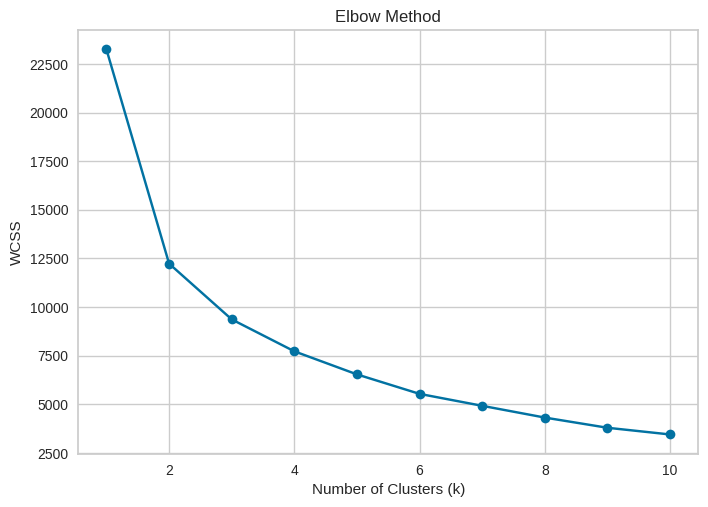

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[['Recency_std','Frequency_std','Monetary_std']])
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different k
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

From the WCSS plot, we find that k=3 is the elbow point. So now we will build k-means clustering algorithm with hyperparameter k set to 3.

In [ ]:
# model build
kmeans_model = KMeans(n_clusters = 3)
# fitting model to dataset
kmeans_model.fit(X[['Recency_std','Frequency_std','Monetary_std']])

KMeans(n_clusters=3)

In [ ]:
kmeans_model.labels_

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
X["kmeans_clusters"] = kmeans_model.labels_
X

Recency_std  Frequency_std  Monetary_std  CustomerID  kmeans_clusters
0       -2.658398       1.779183      2.158117     12347.0                2
1        0.129559       0.862658      1.032897     12348.0                0
2       -0.787286      -0.556658      1.010122     12349.0                0
3        0.877478      -0.556658     -0.133474     12350.0                1
4       -0.317107       2.038458      1.403822     12352.0                2
...           ...            ...           ...         ...              ...
7744    -3.342852      -0.556658     -0.929673     21993.0                0
7745    -3.342852      -0.556658      2.923568     21994.0                2
7746    -7.467777      -0.556658      3.224356     21995.0                2
7747    -7.467777      -0.556658      1.726050     21996.0                2
7748    -7.467777      -0.556658      2.623309     21997.0                2

[7749 rows x 5 columns]

In [ ]:
rfm_data['kmeans_clusters'] = kmeans_model.labels_
rfm_data

Recency  Frequency  Monetary Recency_score Frequency_score  \
CustomerID                                                               
12347.0           2          7   4310.00             4               2   
12348.0          75          4   1797.24             3               2   
12349.0          18          1   1757.55             4               1   
12350.0         310          1    334.40             1               1   
12352.0          36          8   2506.04             4               2   
...             ...        ...       ...           ...             ...   
21993.0           1          1      3.35             4               1   
21994.0           1          1   6637.59             4               1   
21995.0           0          1   7689.23             4               1   
21996.0           0          1   3217.20             4               1   
21997.0           0          1   5664.89             4               1   

           Monetary_score  RFM Score RFM Group RFM_cluster  TF_Recency  \
CustomerID                                                               
12347.0                 4        3.4       424        High    1.031846   
12348.0                 4        3.2       324        High    1.629998   
12349.0                 4        3.1       414      Medium    1.433290   
12350.0                 4        2.5       114         Low    1.790463   
12352.0                 4        3.4       424        High    1.534167   
...                   ...        ...       ...         ...         ...   
21993.0                 2        2.1       412         Low    0.884997   
21994.0                 4        3.1       414      Medium    0.884997   
21995.0                 4        3.1       414      Medium    0.000000   
21996.0                 4        3.1       414      Medium    0.000000   
21997.0                 4        3.1       414      Medium    0.000000   

            TF_Frequency  TF_Monetary  kmeans_clusters  
CustomerID                                              
12347.0         2.645751    65.650590                2  
12348.0         2.000000    42.393867                0  
12349.0         1.000000    41.923144                0  
12350.0         1.000000    18.286607                1  
12352.0         2.828427    50.060364                2  
...                  ...          ...              ...  
21993.0         1.000000     1.830301                0  
21994.0         1.000000    81.471406                2  
21995.0         1.000000    87.688255                2  
21996.0         1.000000    56.720367                2  
21997.0         1.000000    75.265464                2  

[7749 rows x 13 columns]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-means algorithm works by iteratively assigning data points to the cluster with the nearest mean, and then updating the cluster means based on the data points that have been assigned to them. This process continues until the cluster means no longer change significantly.

In [ ]:
# no. of customers in each cluster
rfm_data['kmeans_clusters'].value_counts()

1    4427
0    2494
2     828
Name: kmeans_clusters, dtype: int64

In [ ]:
# mean values of RFM scores for the 3 clusters
rfm_data.groupby('kmeans_clusters').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

Recency  Frequency     Monetary
kmeans_clusters                                    
0                 84.238573   2.517642  1332.825895
1                182.742489   1.057827   131.015665
2                 17.298309   9.545894  3427.909010

We see the 3 clusters and their mean Recency, Frequency and Monetary values.

Cluster 0 has high recency value (purchase made long ago), low Frequency value and low Monetary. This cluster can be called "Low class" having 4422 customers.

Cluster 1 has low recency value, high frequency value and high monetary value. This cluster can be called "High class" having 829 customers.

Cluster 2 has low recency value (purchase made recently), medium Frequency value and Medium Monetary value. This cluster can be called "Medium class" having 2498 customers.

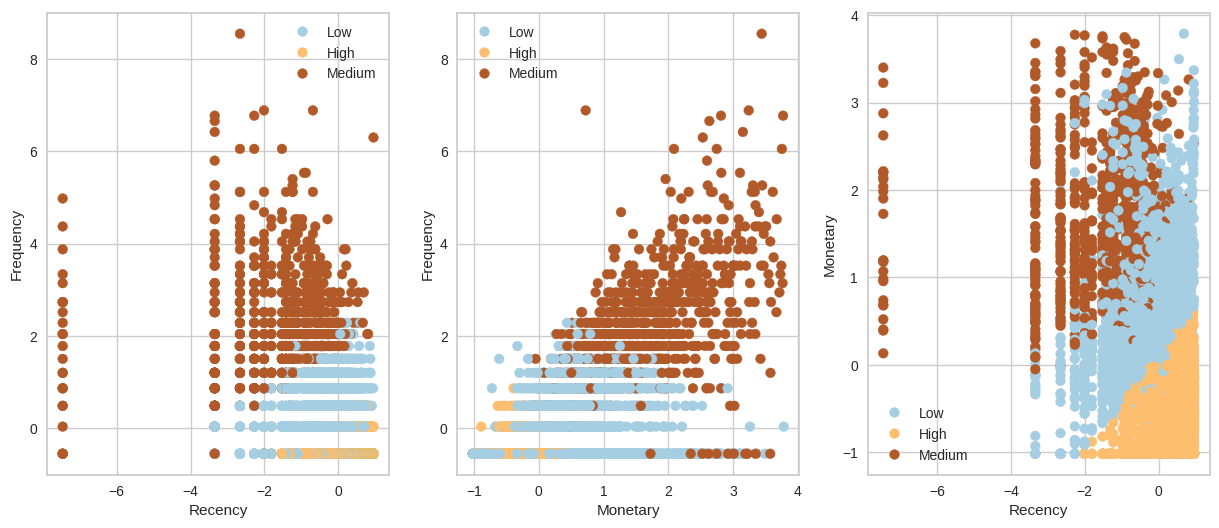

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax = plt.scatter(X["Recency_std"], X["Frequency_std"], c = X["kmeans_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Low','High','Medium'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(132)
ax = plt.scatter(X["Monetary_std"], X["Frequency_std"], c = X["kmeans_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Low','High','Medium'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.subplot(133)
ax = plt.scatter(X["Recency_std"], X["Monetary_std"], c = X["kmeans_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Low','High','Medium'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

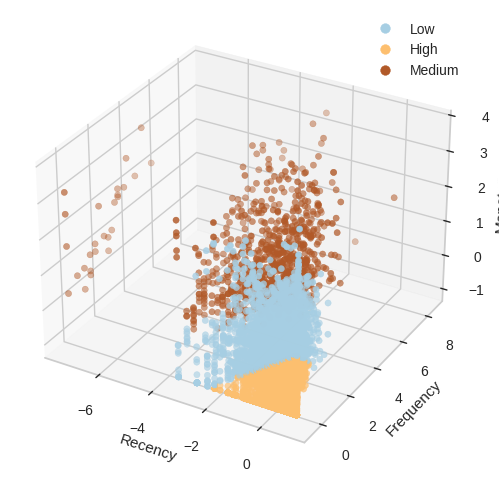

In [ ]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(X['Recency_std'],X['Frequency_std'],X['Monetary_std'],c=X['kmeans_clusters'], cmap='Paired')
plt.legend(handles=fg.legend_elements()[0], labels=['Low','High','Medium'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

We can see the 3D scatter plot where the datapoints represent every customer and their RFM data. The 2D scatter plot shows only 2 variables at time which is the projection of the 3D scatter plot. The bigger cluster has been divided from in between and the smaller cluster has points from both the cluster.

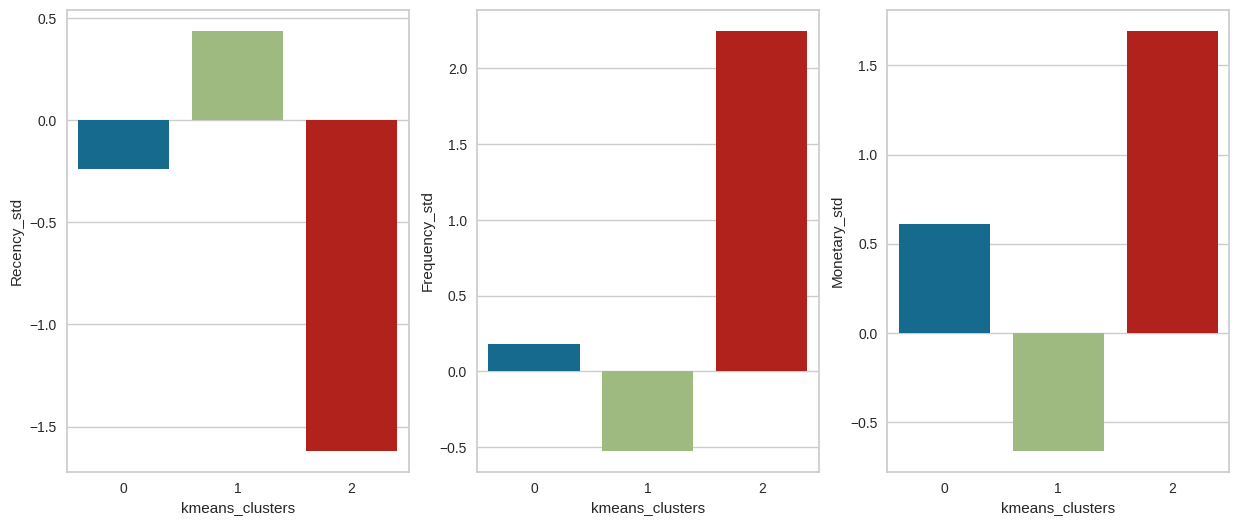

In [ ]:
avg_df = X.groupby(['kmeans_clusters'], as_index=False).mean()

plt.figure(figsize=(15,6))
plt.subplot(131)
sns.barplot(x='kmeans_clusters',y='Recency_std',data=avg_df)
plt.subplot(132)
sns.barplot(x='kmeans_clusters',y='Frequency_std',data=avg_df)
plt.subplot(133)
sns.barplot(x='kmeans_clusters',y='Monetary_std',data=avg_df)
plt.show()

This plot shows the RFM values for different clusters. 

Recency is lowest in cluster 2 (High class), medium in cluster 0 (Medium class) and highest in cluster 1 (Low class). 

Frequency is lowest in cluster 1 (Low class), medium in cluster 0 (Medium class) and highest in cluster 1 (Hiigh class).

Monetary is lowest in cluster 1 (Low class), medium in cluster 0 (Medium class) and highest in cluster 1 (Hiigh class).

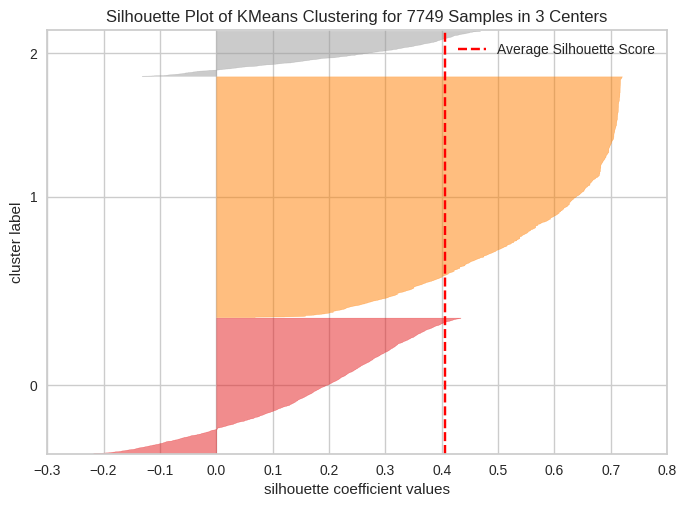

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7749 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_model, color = 'yellowbrick')
visualizer.fit(X[['Recency_std','Frequency_std','Monetary_std']])
visualizer.show()

In [ ]:
# Visualizing evaluation Metric Score chart
print(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], kmeans.labels_, metric='euclidean'))

0.3891940973419469


Silhouette score is a metric used to evaluate the quality of clustering. It is defined as the average of the silhouette coefficients of all data points. The silhouette coefficient of a data point is a measure of how well it fits into its own cluster compared to other clusters.


Silhouette Score = (b - a) / max(a, b)

where:

"a" represents the average distance between a data point and other data points within the same cluster.

"b" represents the average distance between a data point and data points in the nearest neighboring cluster.


The silhouette coefficient ranges from -1 to 1. A high silhouette score indicates that the clustering algorithm has done a good job of assigning data points to clusters. A low silhouette score indicates that the clustering algorithm could be improved. 0.38 is a decent score meaning the algorithm has done a reasonable job in clustering but can be improved.

#### 2. Cross- Validation & Hyperparameter Tuning

Previously, we used the elbow method to select the optimum k value hyperparameter. Now we plot the Silhoutte scores to select the k for which silhoutte score is maximum.

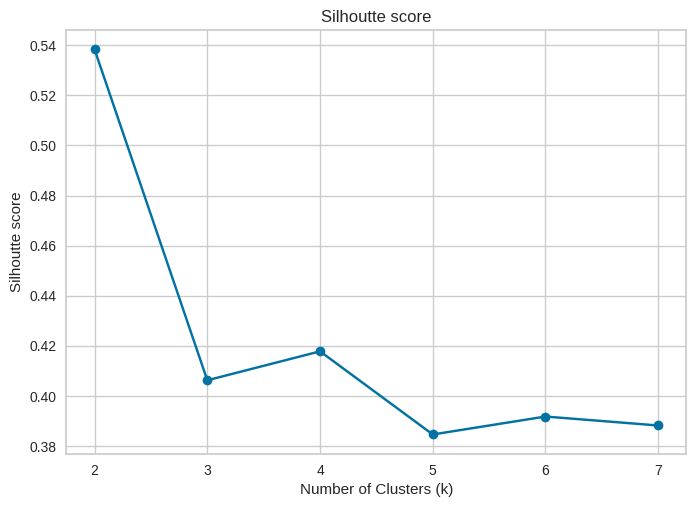

In [ ]:
ss = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[['Recency_std','Frequency_std','Monetary_std']])
    ss.append(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], kmeans.labels_))

# Plot the silhoutte scores for different k
plt.plot(range(2, 8), ss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte score')
plt.show()

The plot shows silhoutte score is maximum for k = 2. So we now fit k means model to data to cluster into 2 clusters.

In [ ]:
kmeans_model2 = KMeans(n_clusters = 2)
kmeans_model2.fit(X[['Recency_std','Frequency_std','Monetary_std']])

KMeans(n_clusters=2)

In [ ]:
X['tuned_kmeans_clusters'] = kmeans_model2.labels_
rfm_data['tuned_kmeans_clusters'] = kmeans_model2.labels_

In [ ]:
# no. of customers in each cluster
rfm_data['tuned_kmeans_clusters'].value_counts()

0    6068
1    1681
Name: tuned_kmeans_clusters, dtype: int64

In [ ]:
# mean values of RFM scores for the 3 clusters
rfm_data.groupby('tuned_kmeans_clusters').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

Recency  Frequency     Monetary
tuned_kmeans_clusters                                    
0                      162.214898   1.277192   386.230249
1                       29.205830   6.612731  2616.738632

We can see the average RFM scores when divided into 2 clusters.

Cluster 0 has high recency value, low frequency value and low monetary value. So it can be called "Inactive class" as they have made less purchases with less monetary value.

Cluster 1 has medium recency value, medium frequency value and high monetary value. So it can be called "Active class" where people remain as an active customers as their recency and frequency is average but monetary is good.

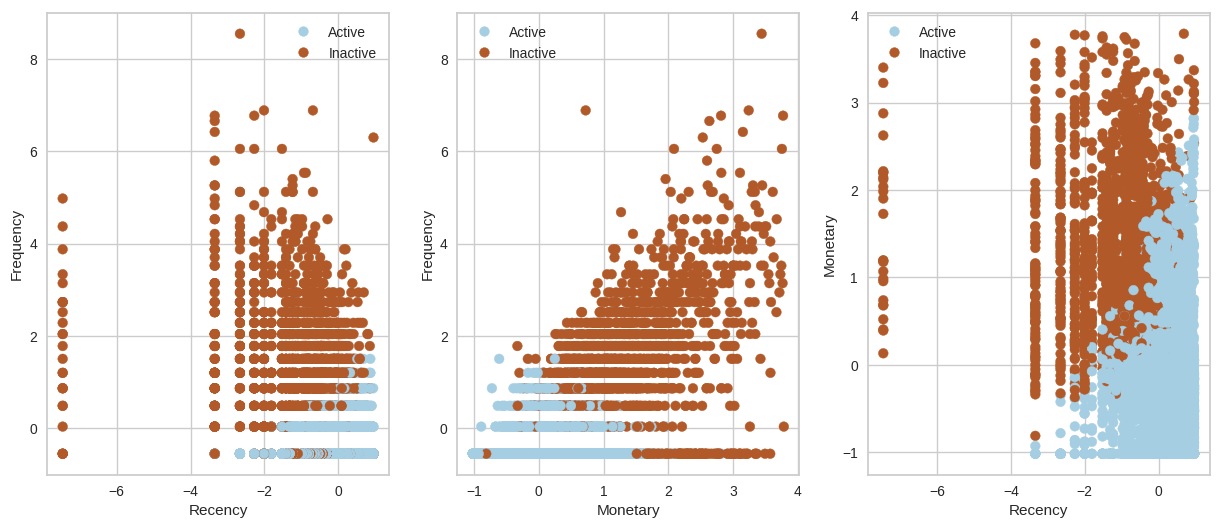

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax = plt.scatter(X["Recency_std"], X["Frequency_std"], c = X["tuned_kmeans_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Active','Inactive'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(132)
ax = plt.scatter(X["Monetary_std"], X["Frequency_std"], c = X["tuned_kmeans_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Active','Inactive'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.subplot(133)
ax = plt.scatter(X["Recency_std"], X["Monetary_std"], c = X["tuned_kmeans_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Active','Inactive'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

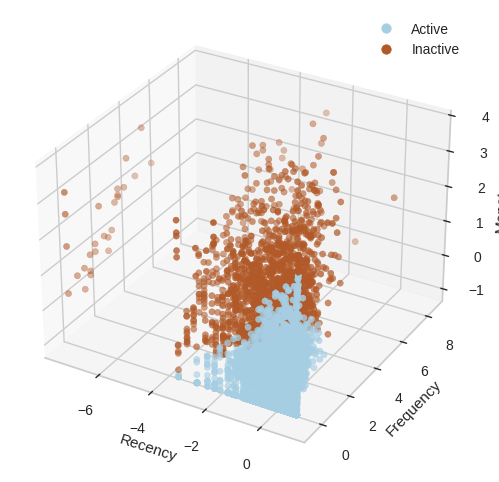

In [ ]:
plt.figure(figsize=(11,6))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(X['Recency_std'],X['Frequency_std'],X['Monetary_std'],c=X["tuned_kmeans_clusters"], cmap='Paired')
plt.legend(handles=fg.legend_elements()[0], labels=['Active','Inactive'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

The cluster boundary is made within the visible cluster and the far away points are not clustered separately but included in the 'Active' class.

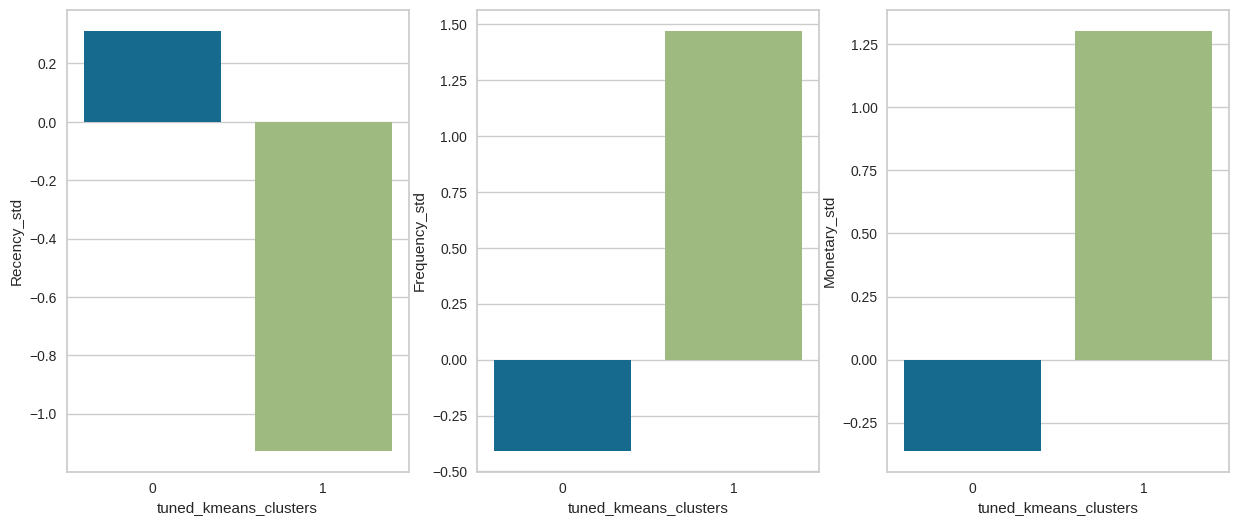

In [ ]:
avg_df = X.groupby(['tuned_kmeans_clusters'], as_index=False).mean()

plt.figure(figsize=(15,6))
plt.subplot(131)
sns.barplot(x='tuned_kmeans_clusters',y='Recency_std',data=avg_df)
plt.subplot(132)
sns.barplot(x='tuned_kmeans_clusters',y='Frequency_std',data=avg_df)
plt.subplot(133)
sns.barplot(x='tuned_kmeans_clusters',y='Monetary_std',data=avg_df)
plt.show()

The recency is less for active class and more for inactive class. Frequency is more for active class and less for inactive class. Monetary is more for active class and less for inactive class.

In [ ]:
print(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], X['tuned_kmeans_clusters']))

0.5373130963788675


##### Which hyperparameter optimization technique have you used and why?

We used the for loop to traverse through all possible values of hyperparameter 'k' and built the k-means model to fit the data and found the silhoutte score. It was observed that k=2 had the maximum silhoutte score. 

It can be said that we used Manual hyperparameter tuning, which involves manually specifying a range of values for each hyperparameter, and then training and evaluating the model for each combination of hyperparameter values, then best combination of hyperparameters is then selected based on a performance metric, such as accuracy or loss.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The silhoutte score increased from 0.38 for k=3 to 0.53 for k=2. However there is scope for improvement as we saw the clusters were separated midway and the faraway points were not made a separate cluster.

### ML Model 2 - Hierarchical Clustering

A dendrogram is a tree-like diagram that represents the hierarchical relationships between the clusters. The vertical axis of the dendrogram represents the distance between clusters, and the horizontal axis represents the order in which the clusters were merged.

Dendrogram is created by calculating the similarity between all pairs of data points. This can be done using a variety of metrics, such as the Euclidean distance or the Manhattan distance. After the similarity scores are calculated, clusters are merged together.

The most common way to merge clusters is to start with the two clusters that are most similar to each other. Then the similarity between the newly merged cluster and all of the remaining clusters is calculated. The cluster with the highest similarity score is then merged with the new cluster, and this process continues until there is only one cluster left.

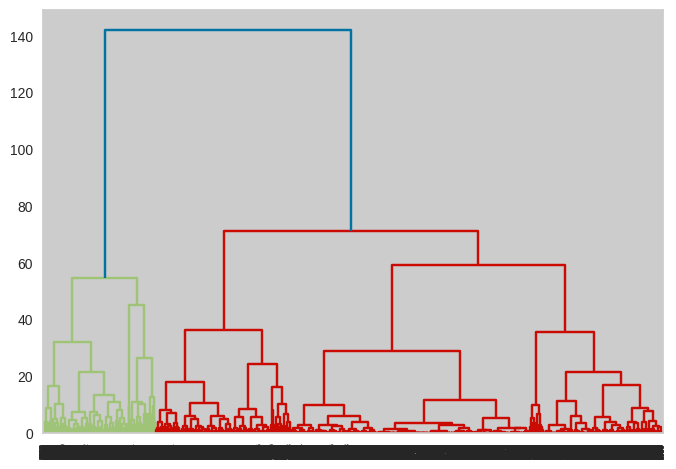

In [ ]:
# creating dednogram
linkage_data = linkage(X[['Recency_std','Frequency_std','Monetary_std']], method='ward')
dendrogram(linkage_data)
plt.show()

The dendrogram can be used to identify the different clusters in the data. The horizontal lines on the dendrogram represent the points at which clusters were merged together. The vertical distance between two horizontal lines represents the similarity between the two clusters that were merged at that point.

We look for the longest vertical lines without any horizontal lines intersecting them. These jumps or gaps indicate a significant increase in distance, suggesting a reasonable number of clusters. The number of clusters is determined by counting the number of vertical lines that don't intersect any horizontal lines. Here we can count the vertical lines to be 2, so we use 2 clusters for model building.

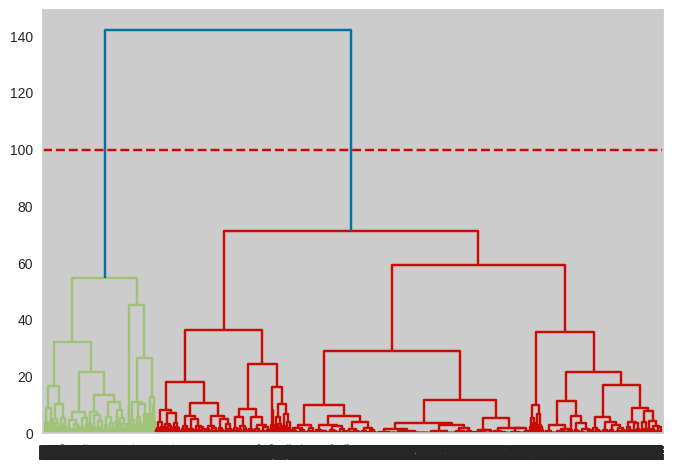

In [ ]:
linkage_data = linkage(X[['Recency_std','Frequency_std','Monetary_std']], method='ward')
dendrogram(linkage_data)
plt.axhline(y=100, color='r', linestyle='--')
plt.show()

In [ ]:
# building hierarchical model with 3 clusters and ward linkage
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
# fitting the model to data
labels = hierarchical_cluster.fit_predict(X[['Recency_std','Frequency_std','Monetary_std']])

In [ ]:
X["hierarchical_clusters"] = labels
X

Recency_std  Frequency_std  Monetary_std  CustomerID  kmeans_clusters  \
0       -2.658398       1.779183      2.158117     12347.0                2   
1        0.129559       0.862658      1.032897     12348.0                0   
2       -0.787286      -0.556658      1.010122     12349.0                0   
3        0.877478      -0.556658     -0.133474     12350.0                1   
4       -0.317107       2.038458      1.403822     12352.0                2   
...           ...            ...           ...         ...              ...   
7744    -3.342852      -0.556658     -0.929673     21993.0                0   
7745    -3.342852      -0.556658      2.923568     21994.0                2   
7746    -7.467777      -0.556658      3.224356     21995.0                2   
7747    -7.467777      -0.556658      1.726050     21996.0                2   
7748    -7.467777      -0.556658      2.623309     21997.0                2   

      tuned_kmeans_clusters  hierarchical_clusters  
0                         1                      1  
1                         1                      0  
2                         0                      1  
3                         0                      0  
4                         1                      1  
...                     ...                    ...  
7744                      0                      0  
7745                      1                      0  
7746                      1                      1  
7747                      1                      1  
7748                      1                      1  

[7749 rows x 7 columns]

In [ ]:
rfm_data['Hierarchical_clusters'] = labels
rfm_data

Recency  Frequency  Monetary Recency_score Frequency_score  \
CustomerID                                                               
12347.0           2          7   4310.00             4               2   
12348.0          75          4   1797.24             3               2   
12349.0          18          1   1757.55             4               1   
12350.0         310          1    334.40             1               1   
12352.0          36          8   2506.04             4               2   
...             ...        ...       ...           ...             ...   
21993.0           1          1      3.35             4               1   
21994.0           1          1   6637.59             4               1   
21995.0           0          1   7689.23             4               1   
21996.0           0          1   3217.20             4               1   
21997.0           0          1   5664.89             4               1   

           Monetary_score  RFM Score RFM Group RFM_cluster  TF_Recency  \
CustomerID                                                               
12347.0                 4        3.4       424        High    1.031846   
12348.0                 4        3.2       324        High    1.629998   
12349.0                 4        3.1       414      Medium    1.433290   
12350.0                 4        2.5       114         Low    1.790463   
12352.0                 4        3.4       424        High    1.534167   
...                   ...        ...       ...         ...         ...   
21993.0                 2        2.1       412         Low    0.884997   
21994.0                 4        3.1       414      Medium    0.884997   
21995.0                 4        3.1       414      Medium    0.000000   
21996.0                 4        3.1       414      Medium    0.000000   
21997.0                 4        3.1       414      Medium    0.000000   

            TF_Frequency  TF_Monetary  kmeans_clusters  tuned_kmeans_clusters  \
CustomerID                                                                      
12347.0         2.645751    65.650590                2                      1   
12348.0         2.000000    42.393867                0                      1   
12349.0         1.000000    41.923144                0                      0   
12350.0         1.000000    18.286607                1                      0   
12352.0         2.828427    50.060364                2                      1   
...                  ...          ...              ...                    ...   
21993.0         1.000000     1.830301                0                      0   
21994.0         1.000000    81.471406                2                      1   
21995.0         1.000000    87.688255                2                      1   
21996.0         1.000000    56.720367                2                      1   
21997.0         1.000000    75.265464                2                      1   

            Hierarchical_clusters  
CustomerID                         
12347.0                         1  
12348.0                         0  
12349.0                         1  
12350.0                         0  
12352.0                         1  
...                           ...  
21993.0                         0  
21994.0                         0  
21995.0                         1  
21996.0                         1  
21997.0                         1  

[7749 rows x 15 columns]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Hierarchical clustering is a type of unsupervised learning algorithm that groups data points together based on their similarity. It is a bottom-up approach, meaning that each data point starts in its own cluster and is then merged with other similar data points until all of the data points are in a single cluster.

We have used the Agglomerative clustering which starts with each data point as its own cluster and then merges the two most similar clusters together at each step until there is only one cluster left. Dendogram is the visual representation of this process.

In [ ]:
# no. of customers in each cluster
rfm_data['Hierarchical_clusters'].value_counts()

0    6338
1    1411
Name: Hierarchical_clusters, dtype: int64

In [ ]:
rfm_data.groupby('Hierarchical_clusters').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

Recency  Frequency    Monetary
Hierarchical_clusters                                   
0                      158.156832   1.349637   498.63941
1                       21.982282   7.308292  2538.62949

We see the 2 clusters and their mean Recency, Frequency and Monetary values.

Cluster 0 has high recency value (purchase made long ago), low Frequency value and low Monetary. This cluster can be called "Low class" having 6338 customers.

Cluster 1 has low recency value, high frequency value and high monetary value. This cluster can be called "High class" having 1411 customers.

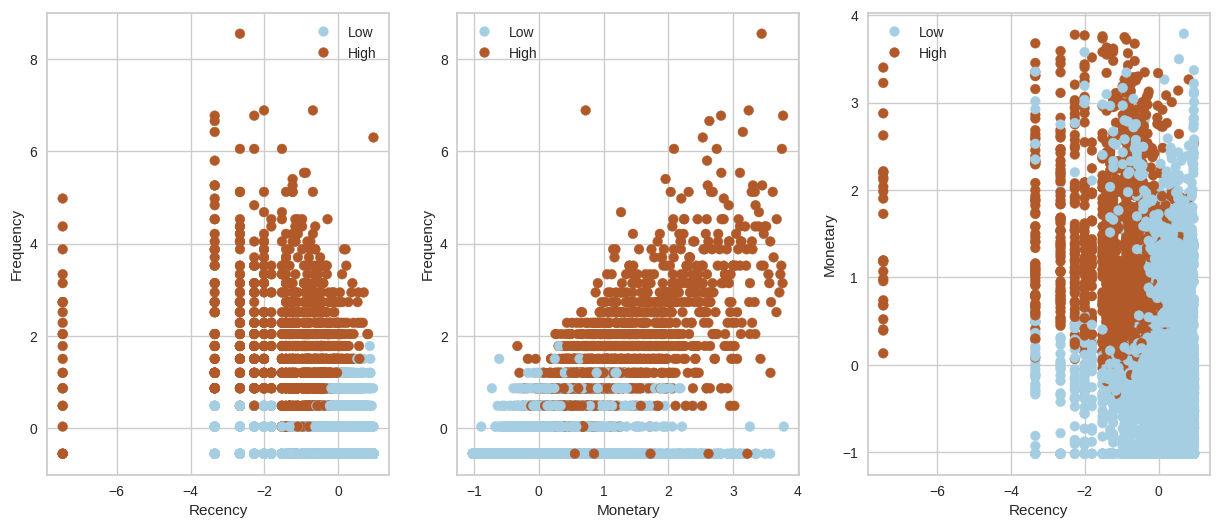

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax = plt.scatter(X["Recency_std"], X["Frequency_std"], c = X["hierarchical_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Low','High'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(132)
ax = plt.scatter(X["Monetary_std"], X["Frequency_std"], c = X["hierarchical_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Low','High'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.subplot(133)
ax = plt.scatter(X["Recency_std"], X["Monetary_std"], c = X["hierarchical_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Low','High'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

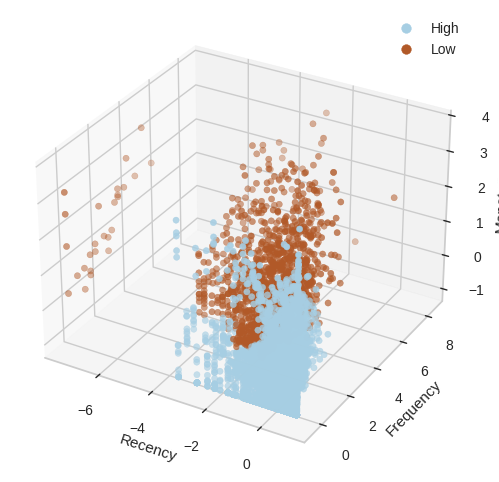

In [ ]:
plt.figure(figsize=(11,6))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(X['Recency_std'],X['Frequency_std'],X['Monetary_std'],c=X['hierarchical_clusters'], cmap='Paired')
plt.legend(handles=fg.legend_elements()[0], labels=['High','Low','Medium'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

Here also we can see that the bigger datapoint cluster is divided into 3 clusters and the faraway points are not made a separate cluster.

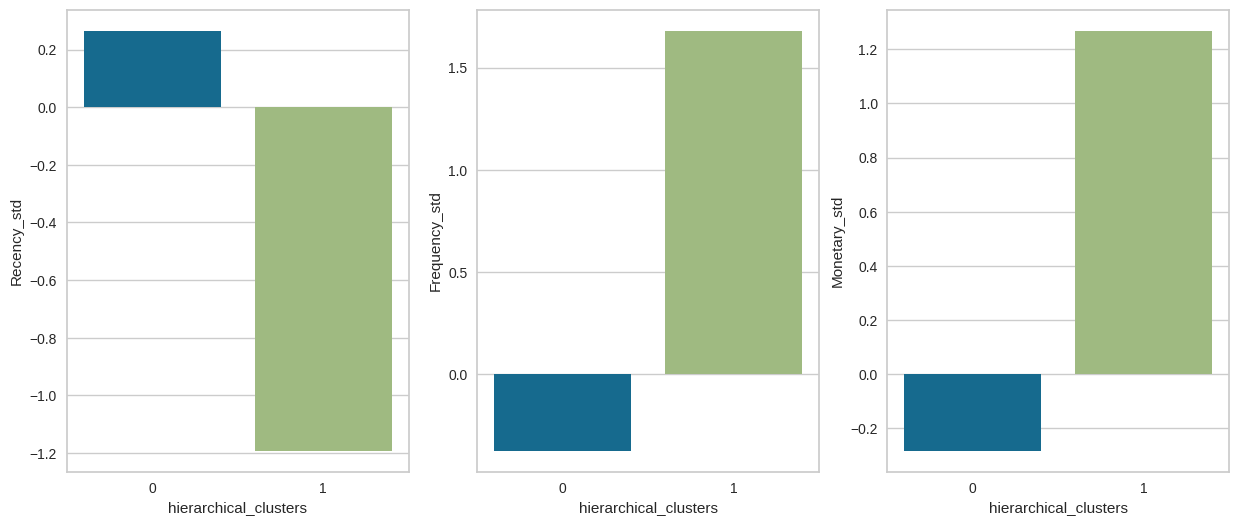

In [ ]:
avg_df = X.groupby(['hierarchical_clusters'], as_index=False).mean()

plt.figure(figsize=(15,6))
plt.subplot(131)
sns.barplot(x='hierarchical_clusters',y='Recency_std',data=avg_df)
plt.subplot(132)
sns.barplot(x='hierarchical_clusters',y='Frequency_std',data=avg_df)
plt.subplot(133)
sns.barplot(x='hierarchical_clusters',y='Monetary_std',data=avg_df)
plt.show()

Recency is lowest for High class, highest for Low class and medium for Medium class. Frequency is highest for High class, lowest for Low class and medium for medium class. Monetary is highest for High class, lowest for Low class and medium for medium class.

In [ ]:
# Visualizing evaluation Metric Score chart
print(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], X['hierarchical_clusters']))

0.5196350060899375


Hierarchical clustering with no. of clusters 2 and ward linkage has the silhoutte score of around 0.52 meaning there is still scope for improvement.

#### 2. Cross- Validation & Hyperparameter Tuning



Hierarchical clustering algorithm has no. of clusters and linkage type as hyperparameters. So we build the model for different combinations of no. of clusters from 2 to 9 and linkage type of 'ward', 'complete', 'average' and 'single' and will choose the one with best silhoutte score.

In [ ]:
ss = pd.DataFrame(columns=['ward', 'complete', 'average', 'single'])
sscol = []
for link in ss.columns:
  for k in range(2, 10):
    hierarchical_cluster2 = AgglomerativeClustering(n_clusters=k, linkage=link)
    labels = hierarchical_cluster2.fit_predict(X[['Recency_std','Frequency_std','Monetary_std']])
    sscol.append(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], labels))

In [ ]:
ss['ward'] = sscol[:8]
ss['complete'] = sscol[8:16]
ss['average'] = sscol[16:24]
ss['single'] = sscol[24:]
ss.index = ss.index+2
ss.index.name='k'
ss

ward  complete   average    single
k                                        
2  0.519635  0.659563  0.730606  0.748210
3  0.333015  0.665081  0.700957  0.695181
4  0.332756  0.421721  0.538746  0.693529
5  0.338176  0.369883  0.538008  0.693541
6  0.342908  0.323173  0.537001  0.691481
7  0.348380  0.322746  0.466497  0.690740
8  0.350050  0.320979  0.466012  0.690636
9  0.353693  0.333003  0.433715  0.689741

The best silhoutte score is around 0.75 for single linkage and no. of clusters 2. Average linkage and no. of clusters 2 has 0.73 which is also a high. So we build hierarchical clustering model with single linkage and no. of clusters 2.

In [ ]:
# model build and fitting
hierarchical_cluster2 = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = hierarchical_cluster2.fit_predict(X[['Recency_std','Frequency_std','Monetary_std']])

In [ ]:
X['tuned_hierarchichal_clusters'] = labels

In [ ]:
X['tuned_hierarchichal_clusters'].value_counts()

0    7723
1      26
Name: tuned_hierarchichal_clusters, dtype: int64

In [ ]:
rfm_data['Hierarchical_clusters_2'] = labels
rfm_data.groupby('Hierarchical_clusters_2').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

Recency  Frequency     Monetary
Hierarchical_clusters_2                                    
0                        133.810048   2.416548   862.254817
1                          0.000000   7.807692  3199.570769

Cluster 0 has high recency (purchase made long ago), low frequency and medium monetary. Cluster 1 has low recency (purchase made recently), high frequency and high monetary. So we can classify Cluster 0 as 'standard class' having most of the customers (7723) and Cluster 1 as 'Premium class' having very less no. of customers (26). We also decide this based on no. of customers in the cluster. 

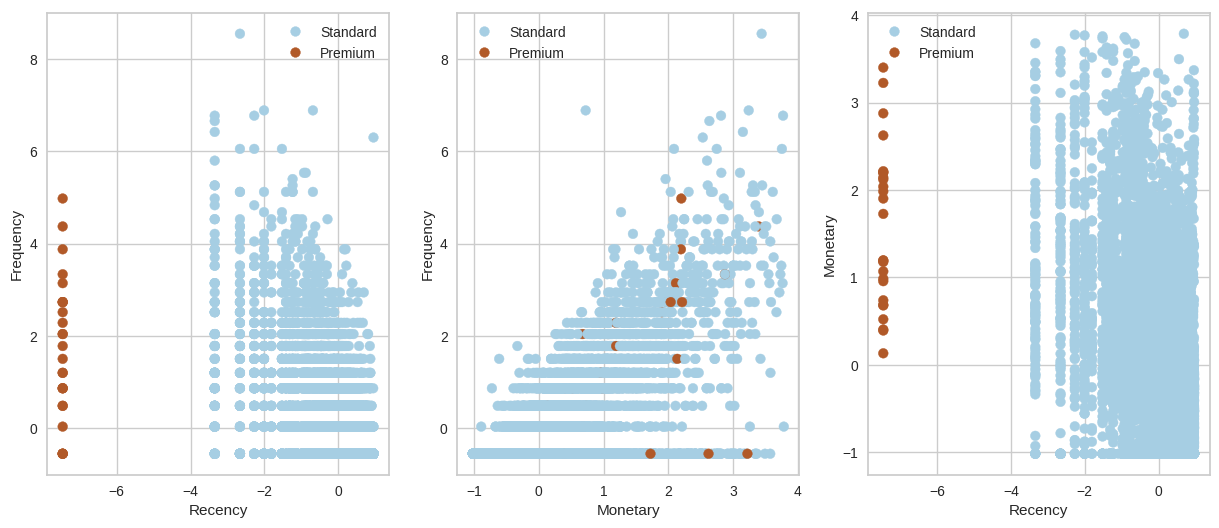

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax= plt.scatter(X["Recency_std"], X["Frequency_std"], c = X["tuned_hierarchichal_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Standard','Premium'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(132)
ax = plt.scatter(X["Monetary_std"], X["Frequency_std"], c = X["tuned_hierarchichal_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Standard','Premium'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.subplot(133)
ax = plt.scatter(X["Recency_std"], X["Monetary_std"], c = X["tuned_hierarchichal_clusters"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Standard','Premium'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

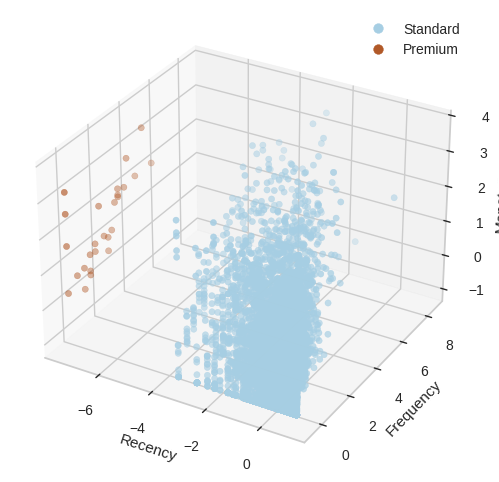

In [ ]:
plt.figure(figsize=(11,6))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(X['Recency_std'],X['Frequency_std'],X['Monetary_std'],c=labels, cmap='Paired')
plt.legend(handles=fg.legend_elements()[0], labels=['Standard','Premium'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

The hierarchical model with no. of clusters 2 and single linkage has done a good job, separating the far away points as separate cluster.

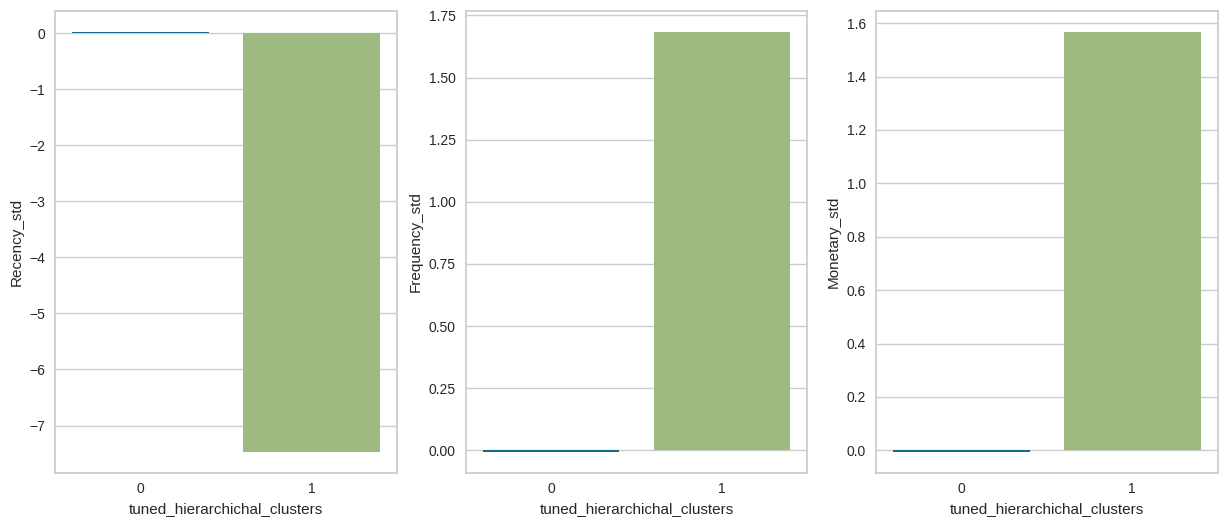

In [ ]:
avg_df = X.groupby(['tuned_hierarchichal_clusters'], as_index=False).mean()

plt.figure(figsize=(15,6))
plt.subplot(131)
sns.barplot(x='tuned_hierarchichal_clusters',y='Recency_std',data=avg_df)
plt.subplot(132)
sns.barplot(x='tuned_hierarchichal_clusters',y='Frequency_std',data=avg_df)
plt.subplot(133)
sns.barplot(x='tuned_hierarchichal_clusters',y='Monetary_std',data=avg_df)
plt.show()

Recency is low for Premium and high for standard.
Frequency is high for Premium and low for standard.
Monetary is high for Premium and low for standard.



In [ ]:
print(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], X['tuned_hierarchichal_clusters']))

0.7482101949191451


#### Creating another model

Even though the above model did a good job of separating the clusters, the 'Standard' cluster has lots of points. So we introduce another cluster and see the distribution of points. We select average linkage and no. of clusters 3 which had slihoutte score of 0.7.

In [ ]:
# model build and fitting
hierarchical_cluster3 = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = hierarchical_cluster3.fit_predict(X[['Recency_std','Frequency_std','Monetary_std']])

In [ ]:
X['tuned_hierarchichal_clusters2'] = labels

In [ ]:
X['tuned_hierarchichal_clusters2'].value_counts()

0    7699
2      26
1      24
Name: tuned_hierarchichal_clusters2, dtype: int64

In [ ]:
rfm_data['Hierarchical_clusters_3'] = labels
rfm_data.groupby('Hierarchical_clusters_3').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})

Recency  Frequency     Monetary
Hierarchical_clusters_3                                    
0                        134.170412   2.331602   843.159884
1                         18.208333  29.666667  6987.750417
2                          0.000000   7.807692  3199.570769

Cluster 0 has high Recency, low Frequency and low Monetary, but most of the customers belong to this cluster so we call them 'Standard customers'.

Cluster 1 has medium recency, high frequency and high monetary, so we call them 'Premium Customers'.

Cluster 2 is a group who have very low recency, with medium frequency and medium monetary, so we call them 'Recent Shoppers'.

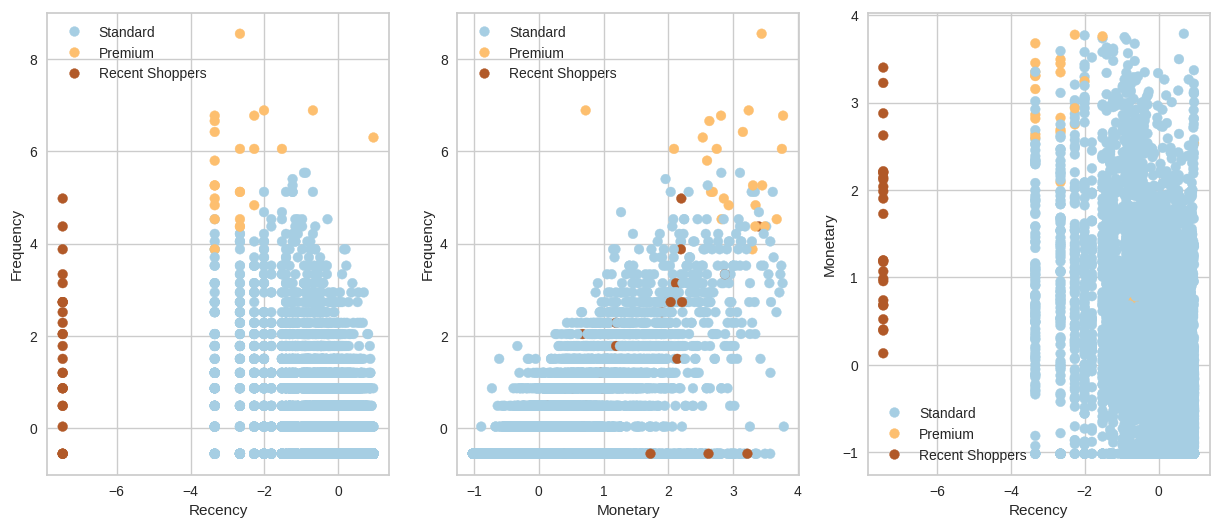

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax= plt.scatter(X["Recency_std"], X["Frequency_std"], c = X["tuned_hierarchichal_clusters2"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Standard','Premium','Recent Shoppers'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(132)
ax = plt.scatter(X["Monetary_std"], X["Frequency_std"], c = X["tuned_hierarchichal_clusters2"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Standard','Premium','Recent Shoppers'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.subplot(133)
ax = plt.scatter(X["Recency_std"], X["Monetary_std"], c = X["tuned_hierarchichal_clusters2"], cmap='Paired')
plt.legend(handles=ax.legend_elements()[0], labels=['Standard','Premium','Recent Shoppers'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

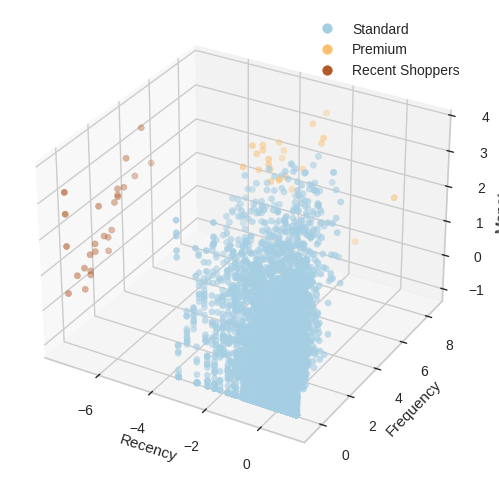

In [ ]:
plt.figure(figsize=(11,6))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(X['Recency_std'],X['Frequency_std'],X['Monetary_std'],c=labels, cmap='Paired')
plt.legend(handles=fg.legend_elements()[0], labels=['Standard','Premium','Recent Shoppers'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

A separate cluster with higher monetary value is created. Even though the no. of customers in standard category still remains high, this is reasonably better clustering distribution than the previous one as we get to know about those few premium customers who spend more money than anyone else and also about those customers who very recently have made a purchase.

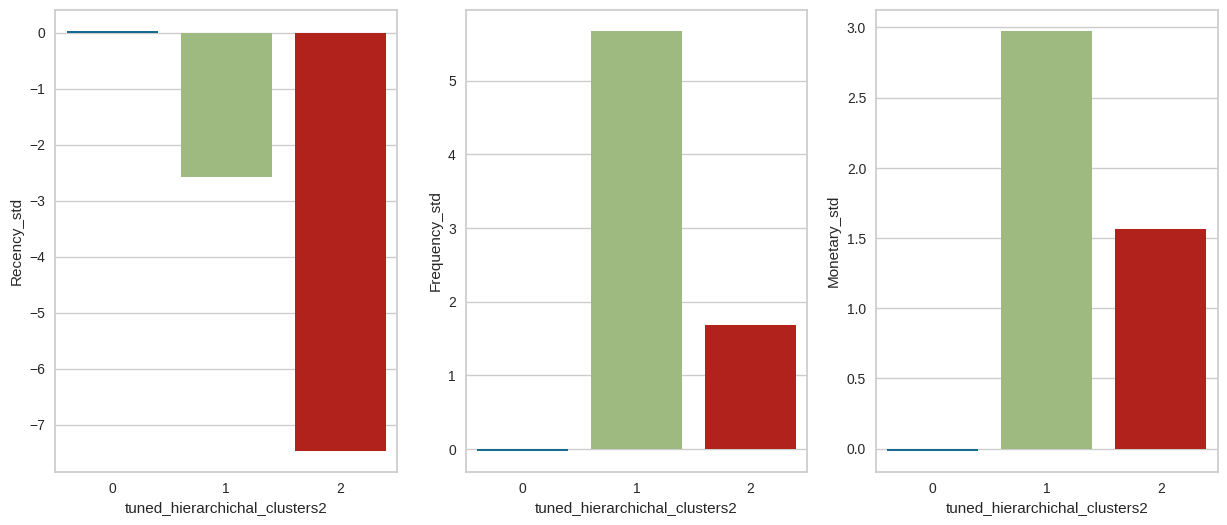

In [ ]:
avg_df = X.groupby(['tuned_hierarchichal_clusters2'], as_index=False).mean()

plt.figure(figsize=(15,6))
plt.subplot(131)
sns.barplot(x='tuned_hierarchichal_clusters2',y='Recency_std',data=avg_df)
plt.subplot(132)
sns.barplot(x='tuned_hierarchichal_clusters2',y='Frequency_std',data=avg_df)
plt.subplot(133)
sns.barplot(x='tuned_hierarchichal_clusters2',y='Monetary_std',data=avg_df)
plt.show()

Recency is lowest in Recent Shoppers, medium in Premium customers and highest in Standard customers.
Frequency is lowest in Standard customers, highest in Premium customers and medium in Recent shopper.
Monetary is lowest in Standard customers, highest in Premium customers and medium in Recent shopper.

In [ ]:
print(silhouette_score(X[['Recency_std','Frequency_std','Monetary_std']], X['tuned_hierarchichal_clusters2']))

0.7009571940532369


##### Which hyperparameter optimization technique have you used and why?

We have used the for loop to loop through the possible hyperparameters of linkage type and no. of clusters manually and used the silhoutte score measure as evaluation metric to select the best hyperparameters for the algorithm.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Our 1st hierarchical model had ward linkage with no. of clusters 2 which had a silhoutte score of 0.52. After hyperparameter tuning, we had hierarchical model with single linkage and no. of clusters 2 which had silhoutte score of around 0.75. However, we tune the parameters once again to select average linkage with no. of clusters 3 and even though the silhoutte score decreased to 0.7, it was more reasonable and rational to use 3 clusters after observing the distribution of points on 3D plot and clusters are logically separated.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used the silhoutte score as our primary evaluation metric. The silhouette score holds great importance in a business context when it comes to clustering analysis.

Firstly, the silhouette score helps evaluate the quality of clusters within a dataset. By measuring the similarity of data points within clusters and their dissimilarity to points in other clusters, it provides a quantitative assessment of cluster coherence. A higher silhouette score indicates well-defined and distinct clusters, which can be advantageous for businesses.

Secondly, the silhouette score assists in determining the optimal number of clusters. By calculating the silhouette score for different cluster numbers, businesses can identify the number that yields the highest score. This informs decisions regarding customer segmentation, enabling the identification of meaningful and homogeneous segments of customers.

Effective customer segmentation is vital for businesses, and this is where the silhouette score comes into play. By leveraging clustering algorithms and evaluating silhouette scores, businesses can identify customer segments with similar behaviors, preferences, or characteristics. This understanding allows for tailored marketing strategies and personalized campaigns, resulting in improved customer engagement and higher conversion rates.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have chosen the hierarchical clustering model with average linkage and no. of clusters 3 as our final prediction model. The decision was taken based on combination of factors like silhoutte score measure, the clustering distribution and mean RFM values of clusters. The silhoutte score for the chosen model was 0.7 which was higher than most of the other models. The clusters made which were visualized through the 3D scatter plot made more sense in having 3 clusters and were well separated than other models. The RFM values of the clusters were perfect to be described by names and one can differentiate between the clusters by looking at the 3D plot and the RFM means values.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***